In [121]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
import warnings
import itertools
plt.style.use("fivethirtyeight")

In [122]:
# Data import 
impo_data_breakbulk = pd.read_csv("impo_hist_breakbulk.csv")
impo_data_breakbulk

,X,OPERACION,VIA_TRAN,NOMBRE_VIA_TRANSPORTE,GNOM_CIA_T,ZONA_GEOGRAFICA_EMB,PAIS_EMB,NOMBRE_PUERTO_EMB,TIPO_PUERTO_EMB,ZONA_GEOGRAFICA_DESEM,...,TOT_PESO,NOMBRE_ALMACEN,ALMACEN,SIGLA_CLAUSULA,VALEXFAB,MONEDA,FOB,FLETE,CIF,mes_operación
0,99,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",B Y M AGENCIA MARITI,Asia,Singapur,OTROS PUERTOS ASIÁTICOS NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,2000000.0,NaN,NaN,CFR,0.0,13,783600.00,93400.00,879295.99,November
1,122,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",B Y M AGENCIA MARITI,América del Sur,Argentina,OTROS PUERTOS DE ARGENTINA NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,700000.0,NaN,NaN,CIF,0.0,13,150248.00,24150.00,174748.00,November
2,2103,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,MONTEVIDEO,Puerto marítimo,América del Sur,...,880000.0,NaN,NaN,CFR,0.0,200,219984.91,26400.00,246595.62,December
3,2104,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,OTROS PUERTOS DE URUGUAY NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,5300000.0,NaN,NaN,CFR,0.0,200,1321804.60,159000.00,1482096.14,December
4,2105,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,MONTEVIDEO,Puerto marítimo,América del Sur,...,3649550.0,NaN,NaN,CFR,0.0,200,916273.11,109486.50,1026648.96,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29845,3366415,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",TOPSAIL CHARTERING &,América del Sur,Argentina,OTROS PUERTOS DE ARGENTINA NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,72650.0,NaN,NaN,CFR,0.0,13,24987.24,2794.12,27808.89,December
29846,3366416,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",TOPSAIL CHARTERING &,América del Sur,Argentina,OTROS PUERTOS DE ARGENTINA NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,93150.0,NaN,NaN,CFR,0.0,13,15854.13,2987.32,18860.12,December
29847,3367779,Importación,7,CARRETERO / TERRESTRE,ANGEL ALBERTO VELASC,América del Sur,Argentina,OTROS PUERTOS DE ARGENTINA NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,27760.0,NaN,NaN,INDIQUE LA SIGLA DE LA CLAUSULA DE COMPRAVENTA...,0.0,13,3886.40,2627.29,6538.48,November
29848,3367990,Importación,7,CARRETERO / TERRESTRE,ESTANCIAS CASAS VIEJ,América del Sur,Argentina,MENDOZA,Puerto marítimo,América del Sur,...,112260.0,NaN,NaN,INDIQUE LA SIGLA DE LA CLAUSULA DE COMPRAVENTA...,0.0,13,21104.88,6735.60,28262.58,December


In [123]:
#Value Counts
impo_data_breakbulk.NOMBRE_VIA_TRANSPORTE.value_counts()

NOMBRE_VIA_TRANSPORTE
CARRETERO / TERRESTRE           17458
MARÍTIMA, FLUVIAL Y LACUSTRE    12371
FERROVIARIO                        14
OTRA                                6
OLEODUCTOS, GASODUCTOS              1
Name: count, dtype: int64

In [5]:
# We only are going to work with  Maritime Imports ("MARÍTIMA, FLUVIAL Y LACUSTRE")
impo_data_breakbulk_mar = impo_data_breakbulk[impo_data_breakbulk["NOMBRE_VIA_TRANSPORTE"] == "MARÍTIMA, FLUVIAL Y LACUSTRE"]

In [6]:
impo_data_breakbulk_mar.columns #Name of the columns

Index(['X', 'OPERACION', 'VIA_TRAN', 'NOMBRE_VIA_TRANSPORTE', 'GNOM_CIA_T',
       'ZONA_GEOGRAFICA_EMB', 'PAIS_EMB', 'NOMBRE_PUERTO_EMB',
       'TIPO_PUERTO_EMB', 'ZONA_GEOGRAFICA_DESEM', 'PAIS_DESEM',
       'NOMBRE_PUERTO_DESEM', 'TIPO_PUERTO_DESEM', 'FECVENCI', 'FEC_ALMAC',
       'FECRETIRO', 'FEC_MANIF', 'FEC_CONOC', 'NOMBRE_TIPO_CARGA', 'CANT_MERC',
       'UNIDAD_MEDIDA', 'NOMBRE_UNIDAD_MEDIDA', 'TOT_BULTOS', 'TOT_PESO',
       'NOMBRE_ALMACEN', 'ALMACEN', 'SIGLA_CLAUSULA', 'VALEXFAB', 'MONEDA',
       'FOB', 'FLETE', 'CIF', 'mes_operación'],
      dtype='object')

In [7]:
impo_data_breakbulk_mar.head() #General visualization of the data

,X,OPERACION,VIA_TRAN,NOMBRE_VIA_TRANSPORTE,GNOM_CIA_T,ZONA_GEOGRAFICA_EMB,PAIS_EMB,NOMBRE_PUERTO_EMB,TIPO_PUERTO_EMB,ZONA_GEOGRAFICA_DESEM,...,TOT_PESO,NOMBRE_ALMACEN,ALMACEN,SIGLA_CLAUSULA,VALEXFAB,MONEDA,FOB,FLETE,CIF,mes_operación
0,99,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",B Y M AGENCIA MARITI,Asia,Singapur,OTROS PUERTOS ASIÁTICOS NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,2000000.0,NaN,NaN,CFR,0.0,13,783600.00,93400.0,879295.99,November
1,122,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",B Y M AGENCIA MARITI,América del Sur,Argentina,OTROS PUERTOS DE ARGENTINA NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,700000.0,NaN,NaN,CIF,0.0,13,150248.00,24150.0,174748.00,November
2,2103,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,MONTEVIDEO,Puerto marítimo,América del Sur,...,880000.0,NaN,NaN,CFR,0.0,200,219984.91,26400.0,246595.62,December
3,2104,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,OTROS PUERTOS DE URUGUAY NO ESPECIFICADOS,Puerto marítimo,América del Sur,...,5300000.0,NaN,NaN,CFR,0.0,200,1321804.60,159000.0,1482096.14,December
4,2105,Importación,1,"MARÍTIMA, FLUVIAL Y LACUSTRE",ULTRAMAR AGENCIA MAR,América del Sur,Uruguay,MONTEVIDEO,Puerto marítimo,América del Sur,...,3649550.0,NaN,NaN,CFR,0.0,200,916273.11,109486.5,1026648.96,December


In [8]:
### WE only will need the Date ("FEC_CONOC"), the Destination Port and the Tons per services and the amount of services

data_ts_daily = impo_data_breakbulk_mar.loc[:,["FEC_CONOC","NOMBRE_PUERTO_DESEM","TOT_PESO"]]
data_ts_daily


,FEC_CONOC,NOMBRE_PUERTO_DESEM,TOT_PESO
0,2023-11-20,PUERTO MONTT,2000000.0
1,2023-11-27,PUERTO MONTT,700000.0
2,2023-12-08,SAN ANTONIO,880000.0
3,2023-12-04,SAN ANTONIO,5300000.0
4,2023-12-08,SAN ANTONIO,3649550.0
...,...,...,...
29841,2018-11-06,VENTANAS,1000000.0
29843,2018-10-11,PUERTO MONTT,4000000.0
29845,2018-12-03,SAN ANTONIO,72650.0
29846,2018-12-03,SAN ANTONIO,93150.0


In [9]:
data_ts_daily.info() #Understanding the datatypes 

<class 'pandas.core.frame.DataFrame'>
Index: 12371 entries, 0 to 29849
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FEC_CONOC            12371 non-null  object 
 1   NOMBRE_PUERTO_DESEM  12007 non-null  object 
 2   TOT_PESO             12371 non-null  float64
dtypes: float64(1), object(2)
memory usage: 386.6+ KB


In [10]:
#Converting dates attributes to Datetype
data_ts_daily["FEC_CONOC"] = pd.to_datetime(data_ts_daily["FEC_CONOC"])

In [11]:
#Rename the attribute datetype to "Date"
data_ts_daily.rename(columns={"FEC_CONOC":"Date"}, inplace= True)
data_ts_daily

,Date,NOMBRE_PUERTO_DESEM,TOT_PESO
0,2023-11-20,PUERTO MONTT,2000000.0
1,2023-11-27,PUERTO MONTT,700000.0
2,2023-12-08,SAN ANTONIO,880000.0
3,2023-12-04,SAN ANTONIO,5300000.0
4,2023-12-08,SAN ANTONIO,3649550.0
...,...,...,...
29841,2018-11-06,VENTANAS,1000000.0
29843,2018-10-11,PUERTO MONTT,4000000.0
29845,2018-12-03,SAN ANTONIO,72650.0
29846,2018-12-03,SAN ANTONIO,93150.0


In [12]:
data_ts_daily = data_ts_daily.set_index("Date") #Setting Index

In [13]:
data_ts_daily.head()

,NOMBRE_PUERTO_DESEM,TOT_PESO
Date,,
2023-11-20,PUERTO MONTT,2000000.0
2023-11-27,PUERTO MONTT,700000.0
2023-12-08,SAN ANTONIO,880000.0
2023-12-04,SAN ANTONIO,5300000.0
2023-12-08,SAN ANTONIO,3649550.0


In [120]:
#Generate a column with Million of Tons of breakbulk
data_ts_daily["MM_TON"] = data_ts_daily["TOT_PESO"]/1000000
data_ts_daily

KeyError: 'TOT_PESO'

In [117]:
data_ts_daily.reset_index() #Reset the index for manipulation

,Date,tot_MM_ton,tot_services
0,2012-06-17,3.000000,1
1,2017-07-24,0.011608,1
2,2017-09-26,3.444910,2
3,2017-09-29,5.064851,1
4,2017-09-30,1.494610,1
...,...,...,...
1625,2024-07-07,69.177600,1
1626,2024-07-08,12.200000,4
1627,2024-07-10,69.134400,1
1628,2024-07-11,34.200000,1


In [118]:
data_ts_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1630 entries, 2012-06-17 to 2024-07-16
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tot_MM_ton    1630 non-null   float64
 1   tot_services  1630 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 38.2 KB


In [119]:
#Grouping the days
data_ts_daily = data_ts_daily.groupby(["Date"]).agg(tot_MM_ton = ("MM_TON",np.sum),
                                                    tot_services = ("MM_TON","count")).reset_index()

KeyError: "Column(s) ['MM_TON'] do not exist"

In [17]:
data_ts_daily.head()

,Date,tot_MM_ton,tot_services
0,2012-06-17,3.000000,1
1,2017-07-24,0.011608,1
2,2017-09-26,3.444910,2
3,2017-09-29,5.064851,1
4,2017-09-30,1.494610,1


In [18]:
#Setting Date index to apply resample to monthly
data_ts_daily = data_ts_daily.set_index("Date")

In [72]:
data_ts_montly = data_ts_daily.tot_MM_ton.resample("M").sum() #Monthly time series dataframe
data_ts_montly

Date
2012-06-30       3.000000
2012-07-31       0.000000
2012-08-31       0.000000
2012-09-30       0.000000
2012-10-31       0.000000
                 ...     
2024-03-31    1033.060042
2024-04-30    1321.510570
2024-05-31    1307.406275
2024-06-30    1292.999772
2024-07-31     357.544490
Freq: M, Name: tot_MM_ton, Length: 146, dtype: float64

In [73]:
data_ts_montly = data_ts_montly.reset_index() #Reset index for data manipulation and cleaning

In [74]:
data_ts_montly["month"] = data_ts_montly["Date"].dt.month
data_ts_montly["year"] = data_ts_montly["Date"].dt.year
data_ts_montly

,Date,tot_MM_ton,month,year
0,2012-06-30,3.000000,6,2012
1,2012-07-31,0.000000,7,2012
2,2012-08-31,0.000000,8,2012
3,2012-09-30,0.000000,9,2012
4,2012-10-31,0.000000,10,2012
...,...,...,...,...
141,2024-03-31,1033.060042,3,2024
142,2024-04-30,1321.510570,4,2024
143,2024-05-31,1307.406275,5,2024
144,2024-06-30,1292.999772,6,2024


In [75]:
data_ts_montly.groupby("year").agg(mm_ton = ("tot_MM_ton",np.sum)) # We are going to consider only from the year 2018

/var/folders/_q/3n647vcn3tsggq0t3f9tpg6w0000gn/T/ipykernel_90527/114735699.py:1: FutureWarning: The provided callable <function sum at 0x1077f2980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_ts_montly.groupby("year").agg(mm_ton = ("tot_MM_ton",np.sum)) # We are going to consider only from the year 2018


,mm_ton
year,
2012,3.000000
2013,0.000000
2014,0.000000
2015,0.000000
2016,0.000000
2017,574.793166
2018,14581.488475
2019,10032.883773
2020,13306.817485


In [76]:
data_ts_montly = data_ts_montly[data_ts_montly["year"]>= 2018]

In [77]:
data_ts_montly = data_ts_montly.set_index("Date") #Setting again index for time series analysis

<Axes: xlabel='Date'>

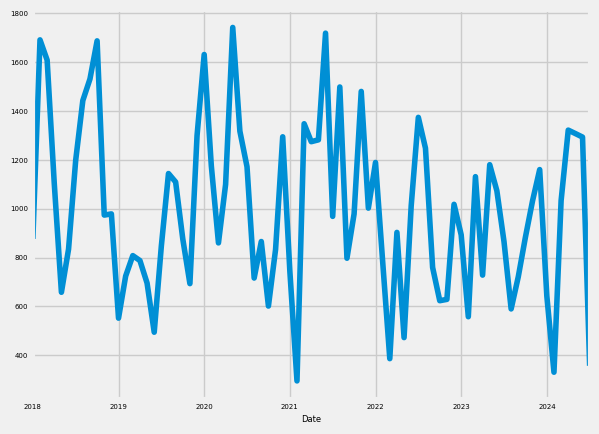

In [78]:
### Ploting the Monthly Values of MM_Tons and Total_Services
data_ts_montly.tot_MM_ton.plot()

In [79]:
data_ts_montly = data_ts_montly["tot_MM_ton"]

In [80]:
### Now we have ready our data de Decomposition of Trend, Reminder and Seasonality and then training our Time_Series_Models
components = sm.tsa.seasonal_decompose(data_ts_montly)

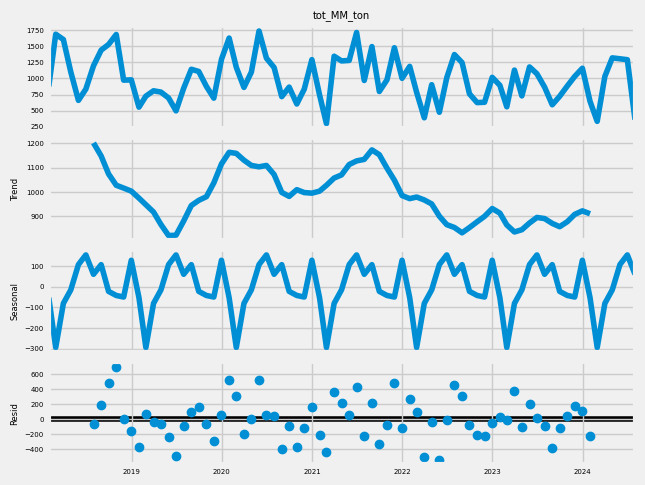

In [81]:
### Plotting the components of the time Series
components.plot()
plt.rcParams.update({'font.size' : 5})  # Set default font size to 8 for all text elements
plt.show()

In [82]:
#Setting the trend, seasonality and reminder from out dataframe
trend = components.trend
seasonality = components.seasonal
reminder = components.resid

<Axes: xlabel='Date'>

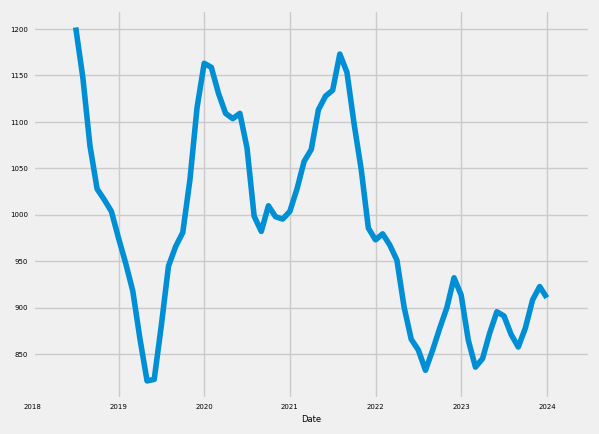

In [83]:
trend.plot() #with some ciclics every 2 years but with a tendency to decrease

<Axes: xlabel='Date'>

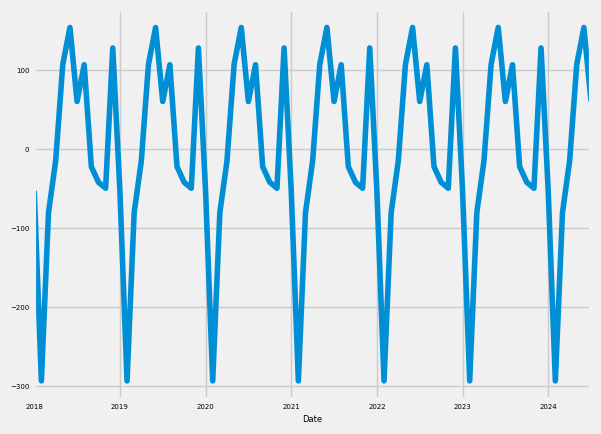

In [84]:
seasonality.plot() #Very Clear Seasonality

<Axes: xlabel='Date'>

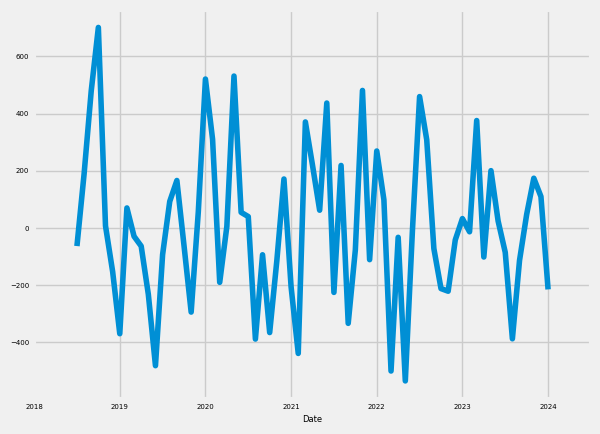

In [85]:
reminder.plot() #With a high dispersion from 0, so we cant explain the gran parte of the variability with the Seasonal and the Trend components

In [86]:
### Stenght of the Seasonal and trend
trend_strenght = max(0,1-((np.var(reminder)/(np.var(reminder+trend)))))
trend_strenght

0.24659988643746855

In [87]:
### Stenght of the Trend Component
seasonal_strenght = max(0,1-((np.var(reminder)/(np.var(reminder+seasonality)))))
seasonal_strenght

0.1500750978826224

In [88]:
### Ploting acf(Moving Average part of the model) and pacf(Auto regresive part of the model)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

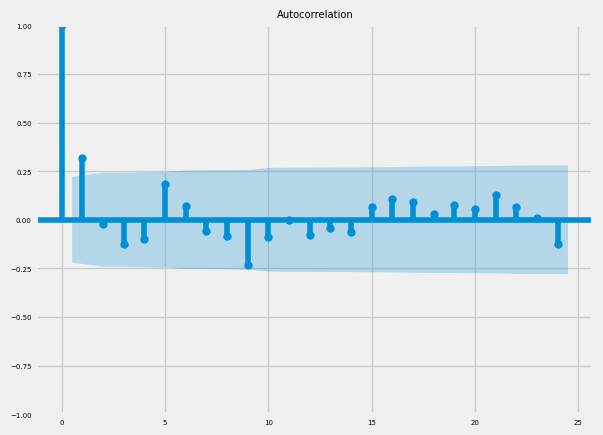

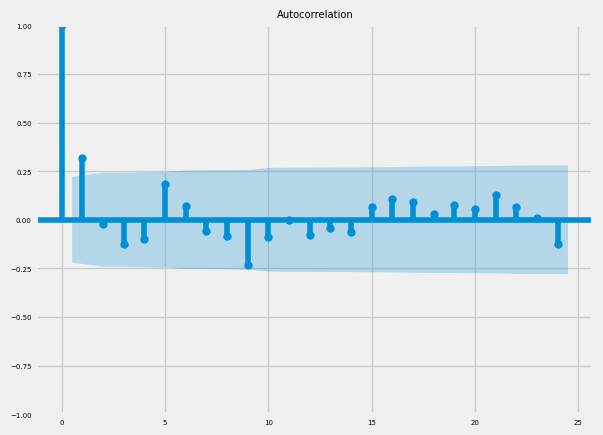

In [89]:
plot_acf(data_ts_montly, lags=24)

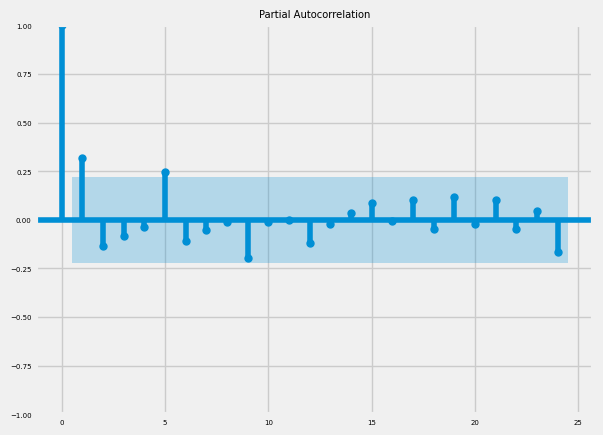

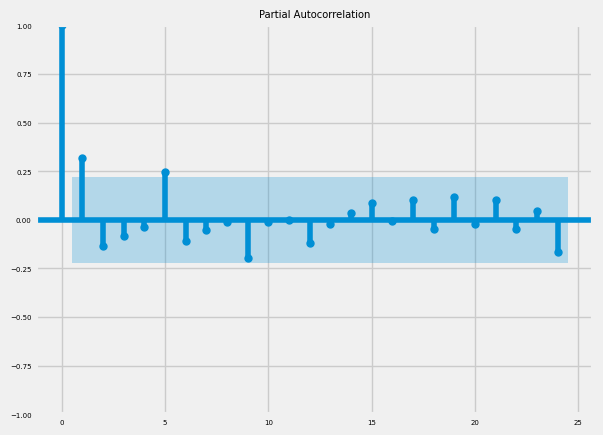

In [90]:
plot_pacf(data_ts_montly,lags = 24)

In [91]:
### Fitting some SARIMAX Model previous of Founding the optimal with Grid Search

In [93]:
MA_SARIMAX = sm.tsa.statespace.SARIMAX(  
    data_ts_montly,
    order=(1, 0, 0),  
    seasonal_order=(0, 0, 0, 12)
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [94]:
R_MA_SARIMAX = MA_SARIMAX.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40668D+00    |proj g|=  1.26322D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      2      5      1     0     0   8.124D-06   7.407D+00
  F =   7.4066476106406194     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [95]:
R_MA_SARIMAX.aic

1174.2503224812178

In [96]:
AR_SARIMAX = sm.tsa.statespace.SARIMAX(  
    data_ts_montly,
    order=(0, 0, 1),  
    seasonal_order=(0, 0, 0, 12)
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [97]:
R_AR_SARIMAX = AR_SARIMAX.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05247D+00    |proj g|=  1.34883D-02

At iterate    5    f=  8.05102D+00    |proj g|=  2.57977D-03

At iterate   10    f=  8.01356D+00    |proj g|=  9.78046D-02

At iterate   15    f=  7.91865D+00    |proj g|=  1.12558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   1.245D-07   7.919D+00
  F =   7.9186401067271373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [98]:
R_AR_SARIMAX.aic

1255.1451368628877

In [99]:
ARIMA_SARIMAX = sm.tsa.statespace.SARIMAX(  
    data_ts_montly,
    order=(1, 1, 1),  
    seasonal_order=(0, 0, 0, 12)
)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [100]:
R_ARIMA_SARIMAX = ARIMA_SARIMAX.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73014D+00    |proj g|=  9.19147D-01

At iterate    5    f=  7.16922D+00    |proj g|=  2.57192D-02

At iterate   10    f=  7.16033D+00    |proj g|=  9.63468D-04

At iterate   15    f=  7.15394D+00    |proj g|=  4.49121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   3.773D-07   7.154D+00
  F =   7.1536877215195878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


In [101]:
R_ARIMA_SARIMAX.aic #The ARIMA model is the one with the lowest AIC, now we are going to make a grid seach to find optimar parameters

1136.282660000095

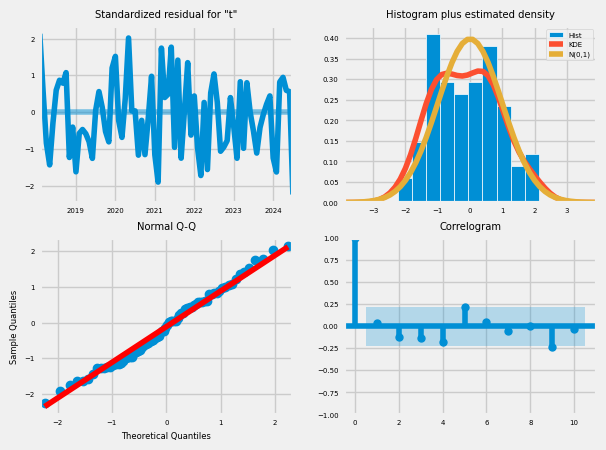

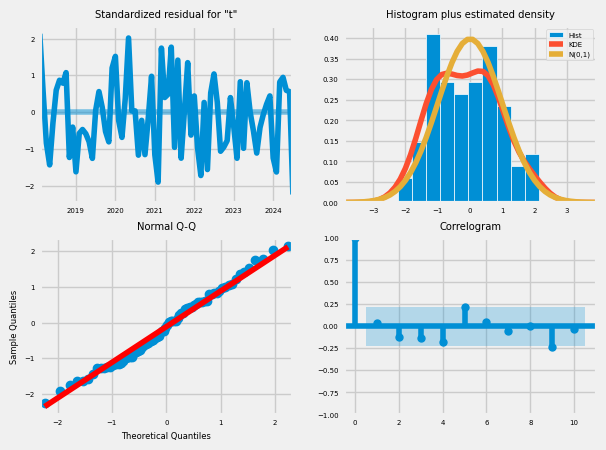

In [ ]:
R_ARIMA_SARIMAX.plot_diagnostics()

In [105]:
fitted = R_ARIMA_SARIMAX.predict()

fitted

2018-01-31       0.000000
2018-02-28     836.329536
2018-03-31    1388.547554
2018-04-30    1412.780001
2018-05-31    1177.899665
                 ...     
2024-03-31     759.587331
2024-04-30    1005.711997
2024-05-31    1109.474393
2024-06-30    1107.137736
2024-07-31    1104.511989
Freq: M, Name: predicted_mean, Length: 79, dtype: float64

In [106]:
data_ts_montly

Date
2018-01-31     876.524670
2018-02-28    1690.820277
2018-03-31    1608.045184
2018-04-30    1102.474524
2018-05-31     658.072824
                 ...     
2024-03-31    1033.060042
2024-04-30    1321.510570
2024-05-31    1307.406275
2024-06-30    1292.999772
2024-07-31     357.544490
Name: tot_MM_ton, Length: 79, dtype: float64

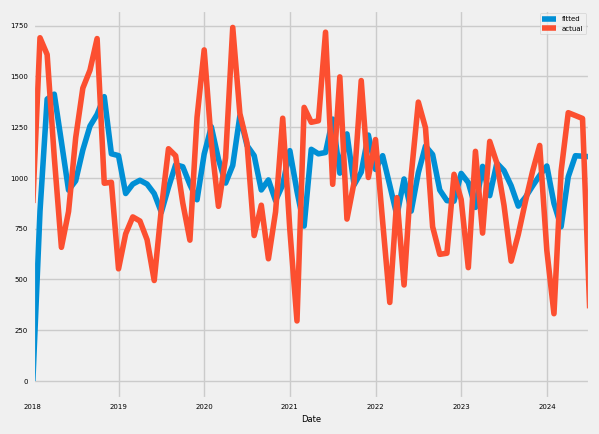

In [111]:
### Plotting the Fitted ARIMA with the Histocial Data

fitted.plot(label = "fitted")
data_ts_montly.plot(label = "actual")
plt.legend()

In [ ]:
### Grid Search (With itertools we can create list combinations with diferent Range values)

P=D=Q=p=d=q= range(0,3)
S = 12

combitations = list(itertools.product(p,d,q,P,D,Q))

In [54]:
arima_order = [(x[0],x[1],x[2]) for x in combitations]

In [55]:
seasonal_order = [(x[3],x[4],x[5],S) for x in combitations]

In [56]:
results_data = pd.DataFrame(columns = ["p","d","q","P","D","Q","AIC"])

In [58]:
len(combitations)

729

In [59]:
for i in range(len(combitations)):
    try:
        model = sm.tsa.statespace.SARIMAX(data_ts_montly, 
                                          order=arima_order[i], 
                                          seasonal_order=seasonal_order[i])
        result = model.fit()
        # Store ARIMA orders
        results_data.loc[i, "p"] = arima_order[i][0]
        results_data.loc[i, "d"] = arima_order[i][1]
        results_data.loc[i, "q"] = arima_order[i][2]
        # Store seasonal orders
        results_data.loc[i, "P"] = seasonal_order[i][0]
        results_data.loc[i, "D"] = seasonal_order[i][1]
        results_data.loc[i, "Q"] = seasonal_order[i][2]
        results_data.loc[i, "m"] = seasonal_order[i][3]
        # Store AIC value
        results_data.loc[i, "AIC"] = result.aic
        print(f"Model {i} fitted successfully.")
    
    except:
        continue
results_data

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38160D+00    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   8.382D+00
  F =   8.3815967808942275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 0 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bound

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   10    f=  6.31164D+00    |proj g|=  1.38767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   9.868D-06   6.312D+00
  F =   6.3116363820521277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 4 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48071D+00    |proj g|=  4.10653D-01

At iterate    5    f=  6.34179D+00    |proj g|=  2.12191D-03

At iterate   10    f=  6.34172D+00    |p

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.46349D+00    |proj g|=  1.38767D-03

At iterate   10    f=  5.46336D+00    |proj g|=  1.68464D-03

At iterate   15    f=  5.43290D+00    |proj g|=  6.69393D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     15     19      1     0     0   6.694D-06   5.433D+00
  F =   5.4328998565590627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 7 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70828D+00    |proj g|=  4.92296D-01

At iterate    5    f=  5.50733D+00    |proj g|=  4.82498D-04

At iterate   10    f=  5.50721D+00    |proj g|=  5.47736D-03

At iterate   15    f=  5.48949D+00    |proj g|=  9.10573D-02

At iterate   20    f=  5.36546D+00    |proj g|=  1.96520D-02

At iterate   25    f=  5.36099D+00    |proj g|=  2.48754D-03

At iterate   30    f=  5.36048D+00    |proj g|=  5.76026D-04

At iterate   35    f=  5.36043D+00    |proj g|=  9.21985D-05

At iterate   40    f=  5.36041D+00    |proj g|=  5.17951D-05

At iterate   45    f=  5.36041D+00    |proj g|=  8.02780D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.67095D+00    |proj g|=  6.35026D-02

At iterate   10    f=  7.61608D+00    |proj g|=  2.94987D-02

At iterate   15    f=  7.61373D+00    |proj g|=  3.25497D-04

At iterate   20    f=  7.61371D+00    |proj g|=  3.36252D-03

At iterate   25    f=  7.61287D+00    |proj g|=  8.57622D-03

At iterate   30    f=  7.61204D+00    |proj g|=  1.36099D-04

At iterate   35    f=  7.61186D+00    |proj g|=  3.72037D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     43      1     0     0   4.956D-05   7.612D+00
  F =   7.6118620755902553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.61785D+00    |proj g|=  4.78656D-03

At iterate   10    f=  7.61783D+00    |proj g|=  1.91002D-03

At iterate   15    f=  7.61766D+00    |proj g|=  3.99498D-03

At iterate   20    f=  7.61752D+00    |proj g|=  9.62131D-03

At iterate   25    f=  7.61122D+00    |proj g|=  4.60900D-02

At iterate   30    f=  7.60844D+00    |proj g|=  2.69943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     35      1     0     0   5.639D-06   7.608D+00
  F =   7.6084426423327081     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 11 fitted successfully.
RUNNING THE L-BFGS-B 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.30949D+00    |proj g|=  1.73867D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     10      1     0     0   8.122D-06   6.309D+00
  F =   6.3094691929103996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 13 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48071D+00    |proj g|=  4.10653D-01

At iterate    5    f=  6.34551D+00    |proj g|=  8.64854D-03

At iterate   10    f=  6.34061D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 15 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41112D+00    |proj g|=  6.83260D-02

At iterate    5    f=  5.39256D+00    |proj g|=  1.94997D-04

At iterate   10    f=  5.38836D+00    |proj g|=  4.20935D-02

At iterate   15    f=  5.38472D+00    |proj g|=  2.24100D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  5.38446D+00    |proj g|=  6.29751D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   9.073D-06   5.384D+00
  F =   5.3844486365049278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 16 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70828D+00    |proj g|=  4.92296D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.51142D+00    |proj g|=  2.55047D-02

At iterate   10    f=  5.50727D+00    |proj g|=  4.82521D-04

At iterate   15    f=  5.50694D+00    |proj g|=  7.52648D-03

At iterate   20    f=  5.42870D+00    |proj g|=  1.66447D-02

At iterate   25    f=  5.36164D+00    |proj g|=  3.20186D-02

At iterate   30    f=  5.36068D+00    |proj g|=  1.09194D-04

At iterate   35    f=  5.36062D+00    |proj g|=  2.41199D-03

At iterate   40    f=  5.35964D+00    |proj g|=  9.39793D-04

At iterate   45    f=  5.35904D+00    |proj g|=  7.69893D-04

At iterate   50    f=  5.35904D+00    |proj g|=  8.02114D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 17 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.66554D+00    |proj g|=  2.04734D-02

At iterate    5    f=  7.66340D+00    |proj g|=  3.59218D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   3.587D-05   7.663D+00
  F =   7.6633975450037015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 18 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.61032D+00    |proj g|=  2.25540D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     39      2     0     0   1.070D-05   7.610D+00
  F =   7.6103244238713126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 19 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.02269D+00    |proj g|=  9.56107D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.63827D+00    |proj g|=  1.87979D-02

At iterate   10    f=  7.60838D+00    |proj g|=  1.90349D-02

At iterate   15    f=  7.60719D+00    |proj g|=  1.01601D-02

At iterate   20    f=  7.60549D+00    |proj g|=  2.99646D-03

At iterate   25    f=  7.60538D+00    |proj g|=  9.50724D-05

At iterate   30    f=  7.60535D+00    |proj g|=  5.04693D-04

At iterate   35    f=  7.60535D+00    |proj g|=  5.47183D-04

At iterate   40    f=  7.60534D+00    |proj g|=  6.46166D-04

At iterate   45    f=  7.60531D+00    |proj g|=  3.23321D-04

At iterate   50    f=  7.60520D+00    |proj g|=  2.94923D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.30158D+00    |proj g|=  4.96827D-04

At iterate   10    f=  6.30141D+00    |proj g|=  1.05345D-02

At iterate   15    f=  6.29828D+00    |proj g|=  2.12195D-02

At iterate   20    f=  6.29768D+00    |proj g|=  1.44071D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     23      1     0     0   1.441D-06   6.298D+00
  F =   6.2976828015734565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 21 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36734D+00    |proj g|=  4.09065D-02

At iterate    5    f=  6.34866D+00    |proj g|=  4.16310D-02

At iterate   10    f=  6.34581D+00    |proj g|=  4.66559D-02

At iterate   15    f=  6.32249D+00    |proj g|=  2.49995D-03

At iterate   20    f=  6.30701D+00    |proj g|=  7.61550D-04

At iterate   25    f=  6.30666D+00    |proj g|=  3.52047D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     33      1     0     0   3.520D-06   6.307D+00
  F =   6.3066566293713375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL           

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.33515D+00    |proj g|=  1.62229D-03

At iterate   15    f=  6.33443D+00    |proj g|=  1.06379D-03

At iterate   20    f=  6.33382D+00    |proj g|=  4.05698D-03

At iterate   25    f=  6.30995D+00    |proj g|=  7.21260D-04

At iterate   30    f=  6.30879D+00    |proj g|=  4.67154D-04

At iterate   35    f=  6.30861D+00    |proj g|=  3.67609D-03
  ys=-1.207E-02  -gs= 8.814E-04 BFGS update SKIPPED

At iterate   40    f=  6.29229D+00    |proj g|=  1.03755D-03

At iterate   45    f=  6.29227D+00    |proj g|=  4.77858D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     70      1     1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.38388D+00    |proj g|=  7.90257D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      8      1     0     0   6.931D-06   5.384D+00
  F =   5.3838836850222620     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 24 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45834D+00    |proj g|=  3.46051D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.36487D+00    |proj g|=  3.11603D-02

At iterate   10    f=  5.34923D+00    |proj g|=  2.18789D-03

At iterate   15    f=  5.34881D+00    |proj g|=  1.51435D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   9.363D-06   5.349D+00
  F =   5.3488139250689573     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 25 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70828D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.50409D+00    |proj g|=  1.13354D-02

At iterate   10    f=  5.50343D+00    |proj g|=  4.90739D-03

At iterate   15    f=  5.50323D+00    |proj g|=  8.62664D-04

At iterate   20    f=  5.50267D+00    |proj g|=  1.23387D-02

At iterate   25    f=  5.46848D+00    |proj g|=  6.16914D-02

At iterate   30    f=  5.36076D+00    |proj g|=  6.97244D-02

At iterate   35    f=  5.35059D+00    |proj g|=  7.83824D-03

At iterate   40    f=  5.34898D+00    |proj g|=  3.37079D-03

At iterate   45    f=  5.34868D+00    |proj g|=  1.78710D-03

At iterate   50    f=  5.34863D+00    |proj g|=  1.00991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init

Model 26 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05247D+00    |proj g|=  1.34883D-02

At iterate    5    f=  8.05102D+00    |proj g|=  2.57977D-03

At iterate   10    f=  8.01356D+00    |proj g|=  9.78046D-02

At iterate   15    f=  7.91865D+00    |proj g|=  1.12558D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     18     20      1     0     0   1.245D-07   7.919D+00
  F =   7.9186401067271373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   20    f=  7.78569D+00    |proj g|=  3.18082D-02

At iterate   25    f=  7.74139D+00    |proj g|=  4.63902D-02

At iterate   30    f=  7.73601D+00    |proj g|=  6.17649D-05
Model 29 fitted successfully.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     47      1     0     0   1.178D-05   7.736D+00
  F =   7.7360088781517025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43959D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30721D+00    |proj g|=  3.75906D-02

At iterate    5    f=  6.30320D+00    |proj g|=  6.47112D-04

At iterate   10    f=  6.30275D+00    |proj g|=  9.76282D-03

At iterate   15    f=  6.27026D+00    |proj g|=  5.47775D-02

At iterate   20    f=  6.25929D+00    |proj g|=  2.64793D-03

At iterate   25    f=  6.25884D+00    |proj g|=  2.99499D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     32      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.29923D+00    |proj g|=  2.93641D-03

At iterate   15    f=  6.29097D+00    |proj g|=  4.52238D-02

At iterate   20    f=  6.25549D+00    |proj g|=  7.03605D-03

At iterate   25    f=  6.25506D+00    |proj g|=  9.17720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     29      1     0     0   5.270D-06   6.255D+00
  F =   6.2550639673938440     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 32 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


At iterate    5    f=  5.51555D+00    |proj g|=  4.39671D-04

At iterate   10    f=  5.51538D+00    |proj g|=  5.57366D-03

At iterate   15    f=  5.45177D+00    |proj g|=  1.40722D-01

At iterate   20    f=  5.41251D+00    |proj g|=  1.56057D-04

At iterate   25    f=  5.41251D+00    |proj g|=  8.37863D-04

At iterate   30    f=  5.41249D+00    |proj g|=  1.67658D-04

At iterate   35    f=  5.41249D+00    |proj g|=  1.90045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     49      1     0     0   6.078D-06   5.412D+00
  F =   5.4124869711048511     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49481D+00    |proj g|=  4.96023D-04

At iterate   10    f=  5.49466D+00    |proj g|=  5.82995D-03

At iterate   15    f=  5.39145D+00    |proj g|=  1.10771D-01

At iterate   20    f=  5.33897D+00    |proj g|=  1.71092D-03

At iterate   25    f=  5.33854D+00    |proj g|=  2.62900D-04

At iterate   30    f=  5.33839D+00    |proj g|=  1.20391D-03

At iterate   35    f=  5.33818D+00    |proj g|=  3.96638D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     49      1     0     0   1.655D-06   5.338D+00
  F =   5.3381770455234472     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  7.83223D+00    |proj g|=  2.71405D-02
  ys=-3.195E-02  -gs= 3.543E-03 BFGS update SKIPPED

At iterate   20    f=  7.68866D+00    |proj g|=  4.79842D-02

At iterate   25    f=  7.62968D+00    |proj g|=  6.99354D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     45      1     1     0   9.792D-07   7.630D+00
  F =   7.6296746583243911     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 36 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.99092D+00    |proj g|=  4.21800D-03

At iterate   10    f=  7.98798D+00    |proj g|=  3.10156D-02

At iterate   15    f=  7.97150D+00    |proj g|=  2.80546D-02

At iterate   20    f=  7.96958D+00    |proj g|=  7.76360D-04

At iterate   25    f=  7.96454D+00    |proj g|=  2.36466D-02

At iterate   30    f=  7.84063D+00    |proj g|=  3.23986D-02

At iterate   35    f=  7.67728D+00    |proj g|=  1.11442D-03

At iterate   40    f=  7.67565D+00    |proj g|=  5.36920D-03

At iterate   45    f=  7.67165D+00    |proj g|=  1.26851D-02

At iterate   50    f=  7.66982D+00    |proj g|=  3.66171D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   10    f=  6.33696D+00    |proj g|=  2.01526D-02

At iterate   15    f=  6.32599D+00    |proj g|=  3.46552D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   4.892D-07   6.325D+00
  F =   6.3249602884501490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 39 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30885D+00    |proj g|=  5.54182D-02

At iterate    5    f=  6.30052D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate   10    f=  6.29884D+00    |proj g|=  2.41438D-02

At iterate   15    f=  6.29774D+00    |proj g|=  1.05766D-03

At iterate   20    f=  6.29762D+00    |proj g|=  4.56541D-03

At iterate   25    f=  6.27936D+00    |proj g|=  6.43400D-02

At iterate   30    f=  6.25589D+00    |proj g|=  3.70468D-03

At iterate   35    f=  6.25094D+00    |proj g|=  4.66900D-03

At iterate   40    f=  6.25060D+00    |proj g|=  9.15840D-04

At iterate   45    f=  6.25055D+00    |proj g|=  2.80360D-04

At iterate   50    f=  6.25055D+00    |proj g|=  8.73775D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 41 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53954D+00    |proj g|=  3.23617D-02

At iterate    5    f=  5.53773D+00    |proj g|=  9.24987D-04

At iterate   10    f=  5.53701D+00    |proj g|=  1.74400D-02

At iterate   15    f=  5.49376D+00    |proj g|=  6.69310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   5.121D-06   5.487D+00
  F =   5.4868333328929504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.49970D+00    |proj g|=  7.83852D-03

At iterate   15    f=  5.48040D+00    |proj g|=  1.09199D-01

At iterate   20    f=  5.36328D+00    |proj g|=  1.14237D-02

At iterate   25    f=  5.36242D+00    |proj g|=  6.03767D-03

At iterate   30    f=  5.36183D+00    |proj g|=  6.56646D-04

At iterate   35    f=  5.36176D+00    |proj g|=  8.43446D-04

At iterate   40    f=  5.36175D+00    |proj g|=  5.48952D-05

At iterate   45    f=  5.36174D+00    |proj g|=  1.16728D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     53      1     0     0   1.167D-04   5.362D+00
  F =   5.36174425066

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69036D+00    |proj g|=  4.89737D-01

At iterate    5    f=  5.49931D+00    |proj g|=  1.61468D-02

At iterate   10    f=  5.49477D+00    |proj g|=  4.96258D-04

At iterate   15    f=  5.49450D+00    |proj g|=  5.79714D-03

At iterate   20    f=  5.43169D+00    |proj g|=  1.71962D-01

At iterate   25    f=  5.34032D+00    |proj g|=  3.11853D-02

At iterate   30    f=  5.33862D+00    |proj g|=  6.79466D-04

At iterate   35    f=  5.33854D+00    |proj g|=  1.30632D-03

At iterate   40    f=  5.33847D+00    |proj g|=  2.19319D-03

At iterate   45    f=  5.33768D+00    |proj g|=  1.05809D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.33663D+00    |proj g|=  8.20793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     83      1     0     0   8.208D-04   5.337D+00
  F =   5.3366266634676132     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 44 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.06891D+00    |proj g|=  1.01596D-01

At iterate    5    f=  7.97528D+00    |proj g|=  1.37562D-02

At iterate   10    f=  7.97360D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.97080D+00    |proj g|=  1.06463D-03

At iterate   10    f=  7.97055D+00    |proj g|=  1.95519D-03

At iterate   15    f=  7.96889D+00    |proj g|=  1.76176D-02

At iterate   20    f=  7.82307D+00    |proj g|=  3.57928D-02

At iterate   25    f=  7.69786D+00    |proj g|=  1.60013D-02

At iterate   30    f=  7.69686D+00    |proj g|=  8.23175D-03

At iterate   35    f=  7.69486D+00    |proj g|=  3.39000D-03

At iterate   40    f=  7.69450D+00    |proj g|=  5.59121D-04

At iterate   45    f=  7.69450D+00    |proj g|=  3.02352D-04

At iterate   50    f=  7.69448D+00    |proj g|=  5.00447D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.97054D+00    |proj g|=  3.97725D-03

At iterate   15    f=  7.97043D+00    |proj g|=  2.34173D-03

At iterate   20    f=  7.96220D+00    |proj g|=  2.73169D-02

At iterate   25    f=  7.83144D+00    |proj g|=  7.63746D-02

At iterate   30    f=  7.68507D+00    |proj g|=  7.37683D-02

At iterate   35    f=  7.65531D+00    |proj g|=  7.63120D-03

At iterate   40    f=  7.65341D+00    |proj g|=  4.36065D-03

At iterate   45    f=  7.65270D+00    |proj g|=  1.87560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     57      1     0     0   2.066D-05   7.653D+00
  F =   7.65267765387

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.29516D+00    |proj g|=  1.56057D-02

At iterate   15    f=  6.26802D+00    |proj g|=  8.84836D-02

At iterate   20    f=  6.24874D+00    |proj g|=  2.71234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     27      1     0     0   6.083D-06   6.249D+00
  F =   6.2487296798392462     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 48 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31892D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.29410D+00    |proj g|=  7.02030D-04

At iterate   15    f=  6.29355D+00    |proj g|=  1.24047D-02

At iterate   20    f=  6.26026D+00    |proj g|=  1.00043D-01

At iterate   25    f=  6.24553D+00    |proj g|=  1.45018D-02

At iterate   30    f=  6.24258D+00    |proj g|=  3.50063D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   4.087D-06   6.243D+00
  F =   6.2425788133089606     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 49 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.29420D+00    |proj g|=  1.58189D-03

At iterate   15    f=  6.29378D+00    |proj g|=  3.18786D-03

At iterate   20    f=  6.29367D+00    |proj g|=  3.14166D-03

At iterate   25    f=  6.29052D+00    |proj g|=  1.92912D-02

At iterate   30    f=  6.25458D+00    |proj g|=  1.08501D-02

At iterate   35    f=  6.25258D+00    |proj g|=  7.99625D-03

At iterate   40    f=  6.24891D+00    |proj g|=  2.12238D-02

At iterate   45    f=  6.24732D+00    |proj g|=  3.23028D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.24535D+00    |proj g|=  3.06158D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   3.062D-02   6.245D+00
  F =   6.2453535775848668     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 50 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50229D+00    |proj g|=  4.82317D-02

At iterate    5    f=  5.49471D+00    |proj g|=  4.89824D-04

At iterate   10    f=  5.49436D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.49156D+00    |proj g|=  9.94712D-04

At iterate   15    f=  5.49070D+00    |proj g|=  1.32733D-02

At iterate   20    f=  5.41248D+00    |proj g|=  1.00253D-01

At iterate   25    f=  5.33284D+00    |proj g|=  4.79378D-02

At iterate   30    f=  5.32689D+00    |proj g|=  1.15192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   3.870D-05   5.327D+00
  F =   5.3268918780552807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 52 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49268D+00    |proj g|=  1.78698D-02

At iterate   10    f=  5.49171D+00    |proj g|=  3.66033D-03

At iterate   15    f=  5.49152D+00    |proj g|=  5.93691D-04

At iterate   20    f=  5.49056D+00    |proj g|=  1.47784D-02

At iterate   25    f=  5.44061D+00    |proj g|=  9.19875D-02

At iterate   30    f=  5.33578D+00    |proj g|=  1.75690D-02

At iterate   35    f=  5.32953D+00    |proj g|=  8.05174D-03

At iterate   40    f=  5.32779D+00    |proj g|=  3.61075D-03

At iterate   45    f=  5.32720D+00    |proj g|=  5.04789D-03

At iterate   50    f=  5.32691D+00    |proj g|=  1.56230D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 53 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99635D+00    |proj g|=  7.23853D-02

At iterate    5    f=  7.98535D+00    |proj g|=  2.88285D-03

At iterate   10    f=  7.98529D+00    |proj g|=  3.74562D-03
Model 54 fitted successfully.

At iterate   15    f=  7.98293D+00    |proj g|=  5.15038D-02

At iterate   20    f=  7.89254D+00    |proj g|=  2.49017D+00

At iterate   25    f=  7.79243D+00    |proj g|=  2.51035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   20    f=  7.78772D+00    |proj g|=  2.92365D-01

At iterate   25    f=  7.75368D+00    |proj g|=  3.13720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     33      1     0     0   5.239D-05   7.754D+00
  F =   7.7536778850561303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 55 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99635D+00    |proj g|=  1.63762D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.96262D+00    |proj g|=  1.07504D-02

At iterate   10    f=  7.96235D+00    |proj g|=  1.24975D-03

At iterate   15    f=  7.96068D+00    |proj g|=  3.91999D-02

At iterate   20    f=  7.81779D+00    |proj g|=  5.38695D-01

At iterate   25    f=  7.64038D+00    |proj g|=  5.65779D-02

At iterate   30    f=  7.63935D+00    |proj g|=  1.20172D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     35      1     0     0   2.884D-06   7.639D+00
  F =   7.6393538057281889     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 56 fitted successfully.
RUNNING THE L-BFGS-B 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31196D+00    |proj g|=  2.72620D-02

At iterate    5    f=  6.30816D+00    |proj g|=  6.67401D-04

At iterate   10    f=  6.30765D+00    |proj g|=  8.64631D-03

At iterate   15    f=  6.27298D+00    |proj g|=  5.79194D-02

At iterate   20    f=  6.25940D+00    |proj g|=  1.05922D-02

At iterate   25    f=  6.25882D+00    |proj g|=  6.21616D-04

At iterate   30    f=  6.25881D+00    |proj g|=  8.80993D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30440D+00    |proj g|=  4.01110D-03

At iterate   10    f=  6.30432D+00    |proj g|=  1.73197D-03

At iterate   15    f=  6.29828D+00    |proj g|=  2.94676D-02

At iterate   20    f=  6.25576D+00    |proj g|=  1.40095D-02

At iterate   25    f=  6.25503D+00    |proj g|=  2.90743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   2.430D-06   6.255D+00
  F =   6.2550257577058055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 59 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 60 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68970D+00    |proj g|=  4.92954D-01

At iterate    5    f=  5.51375D+00    |proj g|=  9.98256D-04

At iterate   10    f=  5.51370D+00    |proj g|=  3.50555D-03

At iterate   15    f=  5.50849D+00    |proj g|=  4.13321D-02

At iterate   20    f=  5.41974D+00    |proj g|=  3.30749D-02

At iterate   25    f=  5.41277D+00    |proj g|=  3.07300D-04

At iterate   30    f=  5.41272D+00    |proj g|=  4.49450D-03

At iterate   35    f=  5.41252D+00    |proj g|=  1.31100D-03

At iterate   40    f=  5.41248D+00    |proj g|=  1.63699D-04

At iterate   45    f=  5.41248D+00    |proj g|=  6.22961D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49271D+00    |proj g|=  4.96514D-04

At iterate   10    f=  5.49250D+00    |proj g|=  5.62122D-03

At iterate   15    f=  5.46474D+00    |proj g|=  6.11614D-02

At iterate   20    f=  5.34806D+00    |proj g|=  3.45792D-02

At iterate   25    f=  5.33838D+00    |proj g|=  4.18009D-03

At iterate   30    f=  5.33758D+00    |proj g|=  2.07538D-03

At iterate   35    f=  5.33743D+00    |proj g|=  2.15520D-03

At iterate   40    f=  5.33733D+00    |proj g|=  6.23027D-04

At iterate   45    f=  5.33732D+00    |proj g|=  1.64846D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     51   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.95465D+00    |proj g|=  2.38804D-02

At iterate   20    f=  7.91835D+00    |proj g|=  6.20980D-02

At iterate   25    f=  7.79781D+00    |proj g|=  2.40827D-02

At iterate   30    f=  7.79682D+00    |proj g|=  8.47815D-04
  ys=-2.156E-02  -gs= 1.016E-03 BFGS update SKIPPED

At iterate   35    f=  7.66196D+00    |proj g|=  2.93158D-01

At iterate   40    f=  7.59959D+00    |proj g|=  9.83515D-03

At iterate   45    f=  7.59868D+00    |proj g|=  2.18225D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     68      1     1     0   2.182D-06   7.599D+00
  F =   7.5986800523303089     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.94965D+00    |proj g|=  4.81380D-03

At iterate   10    f=  7.94861D+00    |proj g|=  7.93257D-04

At iterate   15    f=  7.94765D+00    |proj g|=  1.21633D-02

At iterate   20    f=  7.76310D+00    |proj g|=  6.97042D-02

At iterate   25    f=  7.74963D+00    |proj g|=  1.36048D-01

At iterate   30    f=  7.72618D+00    |proj g|=  1.72918D-02

At iterate   35    f=  7.64076D+00    |proj g|=  8.63301D-01

At iterate   40    f=  7.60197D+00    |proj g|=  1.06013D-02

At iterate   45    f=  7.53853D+00    |proj g|=  1.71908D-01

At iterate   50    f=  7.47801D+00    |proj g|=  1.67887D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.96504D+00    |proj g|=  1.02990D-02

At iterate   10    f=  7.96386D+00    |proj g|=  2.44199D-03

At iterate   15    f=  7.96168D+00    |proj g|=  2.00564D-02

At iterate   20    f=  7.94690D+00    |proj g|=  1.26566D-02

At iterate   25    f=  7.94621D+00    |proj g|=  7.95851D-04

At iterate   30    f=  7.94188D+00    |proj g|=  2.15496D-02

At iterate   35    f=  7.83711D+00    |proj g|=  3.68624D-01

At iterate   40    f=  7.75265D+00    |proj g|=  2.40861D-01

At iterate   45    f=  7.75170D+00    |proj g|=  5.57212D-03

At iterate   50    f=  7.72763D+00    |proj g|=  9.35677D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 65 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34158D+00    |proj g|=  2.90572D-02

At iterate    5    f=  6.34005D+00    |proj g|=  7.51768D-04

At iterate   10    f=  6.33929D+00    |proj g|=  1.43988D-02

At iterate   15    f=  6.32533D+00    |proj g|=  2.78135D-02

At iterate   20    f=  6.32381D+00    |proj g|=  2.06732D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   2.067D-06   6.324D+00
  F =   6.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31281D+00    |proj g|=  5.67220D-02

At iterate    5    f=  6.30554D+00    |proj g|=  7.31336D-04

At iterate   10    f=  6.30546D+00    |proj g|=  4.60833D-03

At iterate   15    f=  6.29718D+00    |proj g|=  4.56726D-02

At iterate   20    f=  6.25793D+00    |proj g|=  2.13228D-02

At iterate   25    f=  6.25724D+00    |proj g|=  7.99377D-04

At iterate   30    f=  6.25652D+00    |proj g|=  2.54679D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.30558D+00    |proj g|=  2.46139D-02

At iterate   15    f=  6.30291D+00    |proj g|=  1.24193D-03

At iterate   20    f=  6.30281D+00    |proj g|=  1.65044D-03

At iterate   25    f=  6.26888D+00    |proj g|=  5.78806D-02

At iterate   30    f=  6.25614D+00    |proj g|=  1.54504D-03

At iterate   35    f=  6.25600D+00    |proj g|=  4.56001D-04

At iterate   40    f=  6.25581D+00    |proj g|=  1.29323D-04

At iterate   45    f=  6.25578D+00    |proj g|=  3.56375D-04

At iterate   50    f=  6.25578D+00    |proj g|=  5.94455D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 68 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53765D+00    |proj g|=  2.41081D-02

At iterate    5    f=  5.53605D+00    |proj g|=  3.61402D-04

At iterate   10    f=  5.53549D+00    |proj g|=  1.17482D-02

At iterate   15    f=  5.49942D+00    |proj g|=  1.40075D-01

At iterate   20    f=  5.48598D+00    |proj g|=  1.41418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   4.320D-06   5.486D+00
  F =   5.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.49773D+00    |proj g|=  5.98382D-03

At iterate   15    f=  5.47914D+00    |proj g|=  8.11188D-02

At iterate   20    f=  5.36229D+00    |proj g|=  1.15938D-03

At iterate   25    f=  5.36216D+00    |proj g|=  5.68061D-03

At iterate   30    f=  5.36179D+00    |proj g|=  1.43439D-03

At iterate   35    f=  5.36173D+00    |proj g|=  5.24181D-04

At iterate   40    f=  5.36173D+00    |proj g|=  1.90738D-04

At iterate   45    f=  5.36173D+00    |proj g|=  1.09167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     52      1     0     0   2.760D-06   5.362D+00
  F =   5.36172558584

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68970D+00    |proj g|=  4.92954D-01

At iterate    5    f=  5.49739D+00    |proj g|=  1.64952D-02

At iterate   10    f=  5.49266D+00    |proj g|=  4.96690D-04

At iterate   15    f=  5.49245D+00    |proj g|=  5.82809D-03

At iterate   20    f=  5.42438D+00    |proj g|=  9.14041D-02

At iterate   25    f=  5.40640D+00    |proj g|=  6.44229D-03

At iterate   30    f=  5.37354D+00    |proj g|=  8.33350D-02

At iterate   35    f=  5.33814D+00    |proj g|=  2.76509D-03

At iterate   40    f=  5.33776D+00    |proj g|=  1.03002D-04

At iterate   45    f=  5.33774D+00    |proj g|=  3.31378D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.33733D+00    |proj g|=  1.33592D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     71      1     0     0   1.336D-02   5.337D+00
  F =   5.3373265225238642     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 71 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04707D+00    |proj g|=  8.90618D-02

At iterate    5    f=  7.95356D+00    |proj g|=  2.52667D-02

At iterate   10    f=  7.95191D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.94825D+00    |proj g|=  1.05800D-03

At iterate   15    f=  7.94690D+00    |proj g|=  1.57703D-02

At iterate   20    f=  7.73920D+00    |proj g|=  1.06974D-01

At iterate   25    f=  7.67859D+00    |proj g|=  2.57418D-01

At iterate   30    f=  7.60527D+00    |proj g|=  3.85513D-03

At iterate   35    f=  7.60455D+00    |proj g|=  1.32189D-02

At iterate   40    f=  7.57339D+00    |proj g|=  1.26679D-01

At iterate   45    f=  7.47737D+00    |proj g|=  2.21377D-02

At iterate   50    f=  7.47582D+00    |proj g|=  7.40896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     72   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.96152D+00    |proj g|=  1.86211D-02

At iterate   10    f=  7.94976D+00    |proj g|=  1.86843D-02

At iterate   15    f=  7.94828D+00    |proj g|=  7.95194D-04

At iterate   20    f=  7.94559D+00    |proj g|=  1.25041D-02

At iterate   25    f=  7.92536D+00    |proj g|=  3.27744D-02

At iterate   30    f=  7.74229D+00    |proj g|=  1.17891D-01

At iterate   35    f=  7.72714D+00    |proj g|=  4.98207D-02

At iterate   40    f=  7.65323D+00    |proj g|=  3.64220D-01
  ys=-4.287E-02  -gs= 7.396E-02 BFGS update SKIPPED

At iterate   45    f=  7.58327D+00    |proj g|=  7.91658D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.56204D+00    |proj g|=  3.99377D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     84      1     1     0   3.994D-02   7.562D+00
  F =   7.5620435611968180     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 74 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30503D+00    |proj g|=  4.96305D-02

At iterate    5    f=  6.30083D+00    |proj g|=  7.02434D-04

At iterate   10    f=  6.30047D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32493D+00    |proj g|=  1.04279D-01

At iterate    5    f=  6.30172D+00    |proj g|=  2.13413D-02

At iterate   10    f=  6.29945D+00    |proj g|=  7.19554D-04

At iterate   15    f=  6.29934D+00    |proj g|=  4.54921D-03

At iterate   20    f=  6.28753D+00    |proj g|=  6.60845D-02

At iterate   25    f=  6.24288D+00    |proj g|=  8.87208D-03

At iterate   30    f=  6.24242D+00    |proj g|=  1.17126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30305D+00    |proj g|=  2.81770D-02

At iterate   10    f=  6.29954D+00    |proj g|=  1.12332D-03

At iterate   15    f=  6.29912D+00    |proj g|=  2.73453D-03

At iterate   20    f=  6.29906D+00    |proj g|=  2.39414D-03

At iterate   25    f=  6.29340D+00    |proj g|=  2.56338D-02

At iterate   30    f=  6.24951D+00    |proj g|=  4.76142D-02

At iterate   35    f=  6.24257D+00    |proj g|=  2.71771D-03

At iterate   40    f=  6.24228D+00    |proj g|=  8.11156D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     49      1     0     0   1.488D-05   6.242D+00
  F =   6.24227866453

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49952D+00    |proj g|=  4.73452D-02

At iterate    5    f=  5.49238D+00    |proj g|=  4.90268D-04

At iterate   10    f=  5.49223D+00    |proj g|=  5.68363D-03

At iterate   15    f=  5.47584D+00    |proj g|=  6.48622D-02

At iterate   20    f=  5.36660D+00    |proj g|=  6.64764D-02

At iterate   25    f=  5.35990D+00    |proj g|=  1.33988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   5.119D-07   5.360D+00
  F =   5.3598954032955453     

CONVERGENCE: NORM_OF

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49419D+00    |proj g|=  2.49296D-02

At iterate    5    f=  5.48943D+00    |proj g|=  1.63951D-02

At iterate   10    f=  5.48916D+00    |proj g|=  5.06172D-04

At iterate   15    f=  5.48868D+00    |proj g|=  9.49251D-03

At iterate   20    f=  5.39963D+00    |proj g|=  1.75888D-01

At iterate   25    f=  5.32597D+00    |proj g|=  2.43892D-02

At iterate   30    f=  5.32522D+00    |proj g|=  1.73879D-04

At iterate   35    f=  5.32518D+00    |proj g|=  2.21807D-03

At iterate   40    f=  5.32516D+00    |proj g|=  2.94986D-04

At iterate   45    f=  5.32514D+00    |proj g|=  6.66943D-04

At iterate   50    f=  5.32514D+00    |proj g|=  1.23471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 79 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68970D+00    |proj g|=  4.92954D-01

At iterate    5    f=  5.49045D+00    |proj g|=  1.83366D-02

At iterate   10    f=  5.48934D+00    |proj g|=  3.70992D-03

At iterate   15    f=  5.48912D+00    |proj g|=  5.28106D-04

At iterate   20    f=  5.48871D+00    |proj g|=  9.90287D-03

At iterate   25    f=  5.44240D+00    |proj g|=  8.44948D-02

At iterate   30    f=  5.35997D+00    |proj g|=  8.65556D-03

At iterate   35    f=  5.35901D+00    |proj g|=  7.55938D-03

At iterate   40    f=  5.34767D+00    |proj g|=  9.47999D-02

At iterate   45    f=  5.33612D+00    |proj g|=  5.89663D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Fra


At iterate   50    f=  5.33600D+00    |proj g|=  1.26438D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   1.264D-05   5.336D+00
  F =   5.3359975861260347     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 80 fitted successfully.
Model 81 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32262D+00    |proj g|=  3.16556D-05

           * * *

Tit   = total number of iterations
Tnf   = total numb

 This problem is unconstrained.
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32499D+00    |proj g|=  4.14919D-02

At iterate    5    f=  7.32352D+00    |proj g|=  4.03093D-03

At iterate   10    f=  7.32097D+00    |proj g|=  4.26418D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   2.719D-06   7.318D+00
  F =   7.3181377843584814     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 82 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     31      1     0     0   8.071D-06   6.346D+00
  F =   6.3456084498569130     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 85 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.51769D+00    |proj g|=  4.08620D-01

At iterate    5    f=  6.37864D+00    |proj g|=  2.90219D-03

At iterate   10    f=  6.37827D+00    |proj g|=  9.18084D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  6.34733D+00    |proj g|=  7.08655D-02

At iterate   20    f=  6.33911D+00    |proj g|=  2.64619D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     24      1     0     0   9.711D-07   6.339D+00
  F =   6.3391109080510430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 86 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76977D+00    |proj g|=  3.55812D-04

           * * *

Tit   = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58615D+00    |proj g|=  1.01987D-02

At iterate    5    f=  5.49055D+00    |proj g|=  5.95101D-02

At iterate   10    f=  5.46836D+00    |proj g|=  1.91398D-03

At iterate   15    f=  5.46723D+00    |proj g|=  1.19234D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     27      1     0     0   6.028D-06   5.467D+00
  F =   5.4670880021443233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 88

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.53749D+00    |proj g|=  1.78809D-03

At iterate   10    f=  5.53745D+00    |proj g|=  2.68633D-03

At iterate   15    f=  5.53416D+00    |proj g|=  4.04612D-02

At iterate   20    f=  5.43399D+00    |proj g|=  2.22574D-01

At iterate   25    f=  5.36731D+00    |proj g|=  4.12206D-03

At iterate   30    f=  5.36597D+00    |proj g|=  1.01302D-03

At iterate   35    f=  5.36580D+00    |proj g|=  1.83373D-04

At iterate   40    f=  5.36577D+00    |proj g|=  1.41474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     44     49      1     0     0   4.353D-06   5.366D+00
  F =   5.36576455954

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.31905D+00    |proj g|=  6.70769D-04

At iterate   10    f=  7.31902D+00    |proj g|=  2.88065D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     17      1     0     0   4.516D-06   7.319D+00
  F =   7.3190134485608906     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 90 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32338D+00    |proj g|=  2.19879D-02

At iterate    5    f=  7.32104D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.35276D+00    |proj g|=  6.71158D-04

At iterate   10    f=  7.35201D+00    |proj g|=  2.15348D-02

At iterate   15    f=  7.32002D+00    |proj g|=  3.77028D-02

At iterate   20    f=  7.31682D+00    |proj g|=  9.19672D-04

At iterate   25    f=  7.31522D+00    |proj g|=  2.09856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     40      1     0     0   5.810D-06   7.315D+00
  F =   7.3152175019590668     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 92 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 93 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.37616D+00    |proj g|=  1.00529D-01

At iterate    5    f=  6.34266D+00    |proj g|=  1.04306D-03

At iterate   10    f=  6.34265D+00    |proj g|=  2.28829D-04

At iterate   15    f=  6.34256D+00    |proj g|=  2.26010D-03

At iterate   20    f=  6.34237D+00    |proj g|=  3.87220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     25      1     0     0   9.266D-07   6.342D+00
  F =   6.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  6.37565D+00    |proj g|=  4.17775D-03

At iterate   20    f=  6.37557D+00    |proj g|=  1.78497D-03

At iterate   25    f=  6.37377D+00    |proj g|=  2.76604D-02

At iterate   30    f=  6.34387D+00    |proj g|=  4.55272D-03

At iterate   35    f=  6.33245D+00    |proj g|=  1.85092D-02

At iterate   40    f=  6.32845D+00    |proj g|=  2.40051D-03

At iterate   45    f=  6.32773D+00    |proj g|=  3.62107D-04

At iterate   50    f=  6.32762D+00    |proj g|=  7.36919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     0     0   7.369D-04   6.328D+00
  F =   6.32762033454

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.54270D+00    |proj g|=  1.08971D-04

At iterate   10    f=  5.54267D+00    |proj g|=  3.82745D-03

At iterate   15    f=  5.54012D+00    |proj g|=  2.22054D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     21      1     0     0   2.894D-06   5.539D+00
  F =   5.5391604552275977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 96 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47327D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.43716D+00    |proj g|=  7.81763D-04

At iterate   10    f=  5.43703D+00    |proj g|=  2.57597D-03

At iterate   15    f=  5.42345D+00    |proj g|=  4.99502D-02

At iterate   20    f=  5.40591D+00    |proj g|=  2.68413D-03

At iterate   25    f=  5.40460D+00    |proj g|=  4.76184D-04

At iterate   30    f=  5.40445D+00    |proj g|=  9.19040D-04

At iterate   35    f=  5.40444D+00    |proj g|=  3.32276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     36     40      1     0     0   9.733D-06   5.404D+00
  F =   5.4044347387654534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate    5    f=  5.54273D+00    |proj g|=  1.29458D-02

At iterate   10    f=  5.53739D+00    |proj g|=  4.01156D-04

At iterate   15    f=  5.53723D+00    |proj g|=  4.85897D-03

At iterate   20    f=  5.39171D+00    |proj g|=  1.23793D-01

At iterate   25    f=  5.36913D+00    |proj g|=  3.75548D-04

At iterate   30    f=  5.36904D+00    |proj g|=  5.04348D-03

At iterate   35    f=  5.36884D+00    |proj g|=  3.70049D-03

At iterate   40    f=  5.36779D+00    |proj g|=  1.69028D-02

At iterate   45    f=  5.36551D+00    |proj g|=  7.00809D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     70    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.31274D+00    |proj g|=  2.76041D-02

At iterate   10    f=  7.31011D+00    |proj g|=  4.60146D-03

At iterate   15    f=  7.31002D+00    |proj g|=  5.31961D-04

At iterate   20    f=  7.30834D+00    |proj g|=  2.64864D-03

At iterate   25    f=  7.30160D+00    |proj g|=  4.90771D-04

At iterate   30    f=  7.30159D+00    |proj g|=  2.37782D-04

At iterate   35    f=  7.30159D+00    |proj g|=  3.85548D-04

At iterate   40    f=  7.30158D+00    |proj g|=  1.08807D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     44     54      1     0     0   3.522D-07   7.302D+00
  F =   7.30158343314

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  7.34258D+00    |proj g|=  2.76214D-02

At iterate   20    f=  7.34038D+00    |proj g|=  1.10667D-03

At iterate   25    f=  7.34016D+00    |proj g|=  3.13552D-03

At iterate   30    f=  7.33995D+00    |proj g|=  2.11727D-03

At iterate   35    f=  7.33833D+00    |proj g|=  1.77716D-02

At iterate   40    f=  7.32474D+00    |proj g|=  6.00461D-02

At iterate   45    f=  7.32195D+00    |proj g|=  3.81823D-02

At iterate   50    f=  7.30964D+00    |proj g|=  1.08367D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   1.084D-01   7.310D+00
  F =   7.30964466943

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33465D+00    |proj g|=  5.57835D-02

At iterate    5    f=  6.33274D+00    |proj g|=  7.79922D-05

At iterate   10    f=  6.33274D+00    |proj g|=  1.19875D-03

At iterate   15    f=  6.33252D+00    |proj g|=  8.89599D-03

At iterate   20    f=  6.33230D+00    |proj g|=  8.10907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   8.109D-07   6.332D+00
  F =   6.3323001867011532     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.41689D+00    |proj g|=  6.70832D-03

At iterate   15    f=  6.40331D+00    |proj g|=  1.30828D-01

At iterate   20    f=  6.37909D+00    |proj g|=  3.28530D-03

At iterate   25    f=  6.34316D+00    |proj g|=  3.12604D-03

At iterate   30    f=  6.34221D+00    |proj g|=  9.95053D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     39      1     0     0   9.951D-06   6.342D+00
  F =   6.3422110557316431     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 103 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.37193D+00    |proj g|=  6.37175D-03

At iterate   15    f=  6.37151D+00    |proj g|=  5.69959D-04

At iterate   20    f=  6.37138D+00    |proj g|=  4.50644D-03

At iterate   25    f=  6.34778D+00    |proj g|=  7.61449D-02

At iterate   30    f=  6.32105D+00    |proj g|=  7.82526D-03

At iterate   35    f=  6.32007D+00    |proj g|=  1.62619D-03

At iterate   40    f=  6.31990D+00    |proj g|=  2.43475D-03

At iterate   45    f=  6.31984D+00    |proj g|=  5.58063D-04

At iterate   50    f=  6.31983D+00    |proj g|=  4.84684D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 104 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41496D+00    |proj g|=  2.29255D-02

At iterate    5    f=  5.41407D+00    |proj g|=  4.87442D-04

At iterate   10    f=  5.41407D+00    |proj g|=  7.55920D-04

At iterate   15    f=  5.41399D+00    |proj g|=  9.33781D-03

At iterate   20    f=  5.41351D+00    |proj g|=  1.72350D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   7.521D-06   5.414D+00
  F =   5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.42756D+00    |proj g|=  2.78320D-01

At iterate   10    f=  5.36587D+00    |proj g|=  5.67529D-02

At iterate   15    f=  5.36181D+00    |proj g|=  5.46955D-03

At iterate   20    f=  5.36153D+00    |proj g|=  4.38422D-05

At iterate   25    f=  5.36152D+00    |proj g|=  6.28519D-04

At iterate   30    f=  5.36092D+00    |proj g|=  1.07496D-02

At iterate   35    f=  5.36083D+00    |proj g|=  1.77262D-04

At iterate   40    f=  5.36081D+00    |proj g|=  7.45320D-05

At iterate   45    f=  5.36081D+00    |proj g|=  8.03955D-05

At iterate   50    f=  5.36081D+00    |proj g|=  2.92685D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74181D+00    |proj g|=  4.65891D-01

At iterate    5    f=  5.53561D+00    |proj g|=  1.30327D-02

At iterate   10    f=  5.53492D+00    |proj g|=  9.56250D-04

At iterate   15    f=  5.53481D+00    |proj g|=  2.21984D-03

At iterate   20    f=  5.53041D+00    |proj g|=  3.72074D-02

At iterate   25    f=  5.40471D+00    |proj g|=  2.98776D-02

At iterate   30    f=  5.40331D+00    |proj g|=  5.12559D-04

At iterate   35    f=  5.40221D+00    |proj g|=  2.63942D-02
  ys=-2.481E-03  -gs= 3.736E-03 BFGS update SKIPPED

At iterate   40    f=  5.37298D+00    |proj g|=  5.78987D-02

At iterate   45    f=  5.35751D+00    |proj g|=  2.17399D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   50    f=  5.35488D+00    |proj g|=  1.28977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     79      1     1     0   1.290D-02   5.355D+00
  F =   5.3548774946581474     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 107 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27293D+00    |proj g|=  1.02084D-01

At iterate    5    f=  7.21120D+00    |proj g|=  5.72403D-04

At iterate   10    f=  7.21065D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  7.19850D+00    |proj g|=  5.15833D-04

At iterate   15    f=  7.19749D+00    |proj g|=  1.36312D-02

At iterate   20    f=  7.19372D+00    |proj g|=  4.50826D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   7.381D-06   7.194D+00
  F =   7.1936754267306764     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 110 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42701D+00    |proj g|=  8.30037D-02

At iterate    5    f=  6.40777D+00    |proj g|=  6.10773D-04

At iterate   10    f=  6.40579D+00    |proj g|=  3.58892D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     17      1     0     0   1.017D-06   6.406D+00
  F =   6.4057849831666092     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 111 fitted successfully.
RUNNING THE L-BFGS-B CODE

           *

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42701D+00    |proj g|=  3.17389D-01

At iterate    5    f=  6.31195D+00    |proj g|=  6.85835D-03

At iterate   10    f=  6.31021D+00    |proj g|=  6.81885D-04

At iterate   15    f=  6.25488D+00    |proj g|=  7.77643D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     24      1     0     0   5.127D-06   6.255D+00
  F =   6.2546404977988930     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 11

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.48598D+00    |proj g|=  2.36009D-03

At iterate   10    f=  5.48540D+00    |proj g|=  7.69375D-03

At iterate   15    f=  5.41811D+00    |proj g|=  1.23130D-01

At iterate   20    f=  5.37867D+00    |proj g|=  3.60186D-03

At iterate   25    f=  5.37686D+00    |proj g|=  1.66866D-04

At iterate   30    f=  5.37671D+00    |proj g|=  1.36898D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     38      1     0     0   7.459D-06   5.377D+00
  F =   5.3767055816738116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 115 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  5.46912D+00    |proj g|=  9.80136D-04

At iterate   15    f=  5.30391D+00    |proj g|=  1.97410D-02

At iterate   20    f=  5.29743D+00    |proj g|=  4.65444D-04

At iterate   25    f=  5.29740D+00    |proj g|=  1.58622D-04

At iterate   30    f=  5.29736D+00    |proj g|=  1.01442D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     42      1     0     0   7.894D-06   5.297D+00
  F =   5.2973580175714181     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 116 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.20842D+00    |proj g|=  7.15433D-03

At iterate   10    f=  7.20472D+00    |proj g|=  8.37202D-03

At iterate   15    f=  7.20384D+00    |proj g|=  5.55384D-04

At iterate   20    f=  7.20319D+00    |proj g|=  4.74946D-04

At iterate   25    f=  7.19856D+00    |proj g|=  2.07632D-04

At iterate   30    f=  7.19855D+00    |proj g|=  6.18336D-05

At iterate   35    f=  7.19854D+00    |proj g|=  5.11278D-05

At iterate   40    f=  7.19854D+00    |proj g|=  4.70133D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     50      1     0     0   4.184D-06   7.199D+00
  F =   7.19853844947

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  7.20390D+00    |proj g|=  1.94767D-03

At iterate   15    f=  7.19157D+00    |proj g|=  1.13351D-02

At iterate   20    f=  7.18866D+00    |proj g|=  1.33203D-02

At iterate   25    f=  7.18802D+00    |proj g|=  2.59655D-03

At iterate   30    f=  7.18661D+00    |proj g|=  2.49672D-02

At iterate   35    f=  7.17996D+00    |proj g|=  2.84500D-03

At iterate   40    f=  7.17905D+00    |proj g|=  4.72407D-03

At iterate   45    f=  7.17876D+00    |proj g|=  1.20808D-03

At iterate   50    f=  7.17871D+00    |proj g|=  5.57355D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     66   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34795D+00    |proj g|=  1.09485D-03

At iterate   10    f=  6.34774D+00    |proj g|=  4.88238D-04

At iterate   15    f=  6.32606D+00    |proj g|=  6.00550D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     25      1     0     0   2.953D-06   6.326D+00
  F =   6.3259044197117653     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 120 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34936D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.26735D+00    |proj g|=  8.06790D-02

At iterate   20    f=  6.25650D+00    |proj g|=  9.11906D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   4.656D-06   6.256D+00
  F =   6.2564758608586901     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 121 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42701D+00    |proj g|=  3.17389D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.31628D+00    |proj g|=  1.49090D-02

At iterate   10    f=  6.31207D+00    |proj g|=  2.16532D-03

At iterate   15    f=  6.31034D+00    |proj g|=  1.57525D-03

At iterate   20    f=  6.30942D+00    |proj g|=  1.10628D-03

At iterate   25    f=  6.26085D+00    |proj g|=  3.23484D-03

At iterate   30    f=  6.25776D+00    |proj g|=  1.57909D-04
  ys=-1.437E-02  -gs= 6.305E-04 BFGS update SKIPPED

At iterate   35    f=  6.25232D+00    |proj g|=  1.21391D-03

At iterate   40    f=  6.25025D+00    |proj g|=  2.31658D-05

At iterate   45    f=  6.25018D+00    |proj g|=  4.62862D-05

At iterate   50    f=  6.25017D+00    |proj g|=  6.32599D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 122 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52059D+00    |proj g|=  3.61897D-02

At iterate    5    f=  5.51179D+00    |proj g|=  3.41705D-04

At iterate   10    f=  5.51144D+00    |proj g|=  4.03247D-03

At iterate   15    f=  5.46312D+00    |proj g|=  9.04275D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     24      1     0     0   2.565D-05   5.463D+00
  F =   5.4631162960233111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FAC

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.47434D+00    |proj g|=  9.54232D-04

At iterate   10    f=  5.47401D+00    |proj g|=  3.31396D-03

At iterate   15    f=  5.34036D+00    |proj g|=  1.62615D-02

At iterate   20    f=  5.33369D+00    |proj g|=  4.58221D-03

At iterate   25    f=  5.33310D+00    |proj g|=  2.88724D-04

At iterate   30    f=  5.33306D+00    |proj g|=  9.54003D-05

At iterate   35    f=  5.33305D+00    |proj g|=  2.60512D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     54      1     0     0   3.725D-05   5.333D+00
  F =   5.3330460365499484     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate    5    f=  5.47535D+00    |proj g|=  8.23725D-03

At iterate   10    f=  5.46903D+00    |proj g|=  7.69554D-04

At iterate   15    f=  5.46890D+00    |proj g|=  2.35115D-03

At iterate   20    f=  5.45300D+00    |proj g|=  6.15652D-02

At iterate   25    f=  5.30229D+00    |proj g|=  1.22853D-02

At iterate   30    f=  5.29666D+00    |proj g|=  6.11323D-03

At iterate   35    f=  5.29429D+00    |proj g|=  5.84194D-03

At iterate   40    f=  5.29418D+00    |proj g|=  5.62050D-04

At iterate   45    f=  5.29406D+00    |proj g|=  1.81863D-04

At iterate   50    f=  5.29404D+00    |proj g|=  4.28662D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 125 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26611D+00    |proj g|=  1.00458D-01

At iterate    5    f=  7.19957D+00    |proj g|=  9.10285D-03

At iterate   10    f=  7.19664D+00    |proj g|=  4.08059D-04

At iterate   15    f=  7.19465D+00    |proj g|=  7.47636D-03

At iterate   20    f=  7.19151D+00    |proj g|=  5.67725D-03
Model 126 fitted successfully.
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  7.18689D+00    |proj g|=  5.16283D-03

At iterate   25    f=  7.18329D+00    |proj g|=  8.03084D-03

At iterate   30    f=  7.17573D+00    |proj g|=  5.78368D-03

At iterate   35    f=  7.17568D+00    |proj g|=  2.34385D-04

At iterate   40    f=  7.17566D+00    |proj g|=  1.33189D-03

At iterate   45    f=  7.17565D+00    |proj g|=  3.74431D-04

At iterate   50    f=  7.17564D+00    |proj g|=  2.13199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   2.132D-04   7.176D+00
  F =   7.1756430969860245     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.21182D+00    |proj g|=  2.41332D-02

At iterate   10    f=  7.19488D+00    |proj g|=  5.64764D-03

At iterate   15    f=  7.19397D+00    |proj g|=  5.48716D-03

At iterate   20    f=  7.19335D+00    |proj g|=  3.32250D-03

At iterate   25    f=  7.19098D+00    |proj g|=  6.96684D-02

At iterate   30    f=  7.18646D+00    |proj g|=  2.41937D-03

At iterate   35    f=  7.18639D+00    |proj g|=  1.76419D-03

At iterate   40    f=  7.18350D+00    |proj g|=  1.99644D-02

At iterate   45    f=  7.17688D+00    |proj g|=  3.31852D-03

At iterate   50    f=  7.17609D+00    |proj g|=  4.85399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.30249D+00    |proj g|=  9.16428D-03

At iterate   10    f=  6.30152D+00    |proj g|=  7.59781D-04

At iterate   15    f=  6.28604D+00    |proj g|=  9.76512D-02

At iterate   20    f=  6.23656D+00    |proj g|=  2.84387D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   4.428D-07   6.237D+00
  F =   6.2365575859761897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 129 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.30758D+00    |proj g|=  4.39931D-02

At iterate   10    f=  6.29936D+00    |proj g|=  8.21139D-04

At iterate   15    f=  6.29923D+00    |proj g|=  1.07327D-03

At iterate   20    f=  6.29904D+00    |proj g|=  1.24092D-02

At iterate   25    f=  6.28116D+00    |proj g|=  9.47553D-02

At iterate   30    f=  6.24316D+00    |proj g|=  2.88291D-03

At iterate   35    f=  6.23758D+00    |proj g|=  7.75971D-02

At iterate   40    f=  6.22711D+00    |proj g|=  3.14747D-03

At iterate   45    f=  6.22708D+00    |proj g|=  8.96192D-05

At iterate   50    f=  6.22707D+00    |proj g|=  1.61503D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 130 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42701D+00    |proj g|=  3.17389D-01

At iterate    5    f=  6.30907D+00    |proj g|=  2.84628D-02

At iterate   10    f=  6.30000D+00    |proj g|=  3.97326D-03

At iterate   15    f=  6.29882D+00    |proj g|=  9.89508D-04

At iterate   20    f=  6.25206D+00    |proj g|=  6.59512D-02

At iterate   25    f=  6.24529D+00    |proj g|=  2.13986D-02

At iterate   30    f=  6.23474D+00    |proj g|=  3.94166D-02

At iterate   35    f=  6.22804D+00    |proj g|=  1.93455D-03

At iterate   40    f=  6.22802D+00    |proj g|=  3.98398D-03

At iterate   45    f=  6.22733D+00    |proj g|=  1.20103D-02

At iterate   50    f=  6.22653D+00    |proj g|=  2.24382D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 131 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49282D+00    |proj g|=  4.55780D-02

At iterate    5    f=  5.47208D+00    |proj g|=  2.42767D-03

At iterate   10    f=  5.47196D+00    |proj g|=  1.24782D-03

At iterate   15    f=  5.47094D+00    |proj g|=  2.18797D-02

At iterate   20    f=  5.33810D+00    |proj g|=  2.16988D-02

At iterate   25    f=  5.33555D+00    |proj g|=  1.21965D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46635D+00    |proj g|=  6.52098D-03

At iterate   10    f=  5.46609D+00    |proj g|=  4.86139D-04

At iterate   15    f=  5.46537D+00    |proj g|=  1.57214D-02

At iterate   20    f=  5.38404D+00    |proj g|=  1.39274D-01

At iterate   25    f=  5.28518D+00    |proj g|=  5.03536D-03

At iterate   30    f=  5.28440D+00    |proj g|=  6.31108D-05

At iterate   35    f=  5.28440D+00    |proj g|=  4.14624D-04

At iterate   40    f=  5.28438D+00    |proj g|=  6.28328D-04

At iterate   45    f=  5.28437D+00    |proj g|=  1.14055D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.28437D+00    |proj g|=  1.34503D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   1.345D-05   5.284D+00
  F =   5.2843705706332926     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 133 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62319D+00    |proj g|=  3.62859D-01


 This problem is unconstrained.



At iterate    5    f=  5.46794D+00    |proj g|=  1.39413D-02

At iterate   10    f=  5.46603D+00    |proj g|=  1.91601D-03

At iterate   15    f=  5.46596D+00    |proj g|=  2.88857D-03

At iterate   20    f=  5.46573D+00    |proj g|=  4.03570D-03

At iterate   25    f=  5.44886D+00    |proj g|=  7.18703D-02

At iterate   30    f=  5.30127D+00    |proj g|=  7.27458D-02

At iterate   35    f=  5.28570D+00    |proj g|=  6.40234D-03

At iterate   40    f=  5.28267D+00    |proj g|=  3.96507D-03

At iterate   45    f=  5.28229D+00    |proj g|=  3.04239D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.28185D+00    |proj g|=  1.13476D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   1.135D-03   5.282D+00
  F =   5.2818498732343047     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 134 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18431D+00    |proj g|=  9.37993D-02

At iterate    5    f=  7.15131D+00    |proj g|=  3.18874D-03

At iterate   10    f=  7.15007D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18431D+00    |proj g|=  1.12679D-01

At iterate    5    f=  7.14174D+00    |proj g|=  1.37029D-02

At iterate   10    f=  7.14086D+00    |proj g|=  5.05308D-04

At iterate   15    f=  7.13650D+00    |proj g|=  4.14396D-02

At iterate   20    f=  7.13151D+00    |proj g|=  3.61545D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   3.978D-06   7.132D+00
  F =   7.1315055807946068     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  6.20598D+00    |proj g|=  7.80609D-03

At iterate   20    f=  6.20487D+00    |proj g|=  1.48113D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   6.035D-06   6.205D+00
  F =   6.2048679356090393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 139 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40128D+00    |proj g|=  2.91251D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29297D+00    |proj g|=  8.03783D-03

At iterate   10    f=  6.29126D+00    |proj g|=  7.34480D-04

At iterate   15    f=  6.22339D+00    |proj g|=  7.47349D-02

At iterate   20    f=  6.20131D+00    |proj g|=  4.05068D-03

At iterate   25    f=  6.20119D+00    |proj g|=  3.44285D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   3.443D-06   6.201D+00
  F =   6.2011862361500167     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 140 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.61683D+00    |proj g|=  2.73448D-03

At iterate   10    f=  5.61655D+00    |proj g|=  5.12738D-04

At iterate   15    f=  5.60470D+00    |proj g|=  4.64150D-02

At iterate   20    f=  5.59688D+00    |proj g|=  6.91296D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   6.913D-06   5.597D+00
  F =   5.5968816948069406     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 141 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62626D+00    |proj g|=  3.16892D-01

At iterate    5    f=  5.49497D+00    |proj g|=  9.88860D-04

At iterate   10    f=  5.49490D+00    |proj g|=  1.14544D-03

At iterate   15    f=  5.49069D+00    |proj g|=  2.56532D-02

At iterate   20    f=  5.33083D+00    |proj g|=  1.86733D-01

At iterate   25    f=  5.26283D+00    |proj g|=  3.43263D-03

At iterate   30    f=  5.26205D+00    |proj g|=  3.14030D-04

At iterate   35    f=  5.26191D+00    |proj g|=  2.55772D-03

At iterate   40    f=  5.26188D+00    |proj g|=  9.70024D-05

At iterate   45    f=  5.26187D+00    |proj g|=  4.42663D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   10    f=  7.14684D+00    |proj g|=  2.88054D-03

At iterate   15    f=  7.13989D+00    |proj g|=  1.42127D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   6.900D-06   7.140D+00
  F =   7.1398861930514856     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 144 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18283D+00    |proj g|=  9.89175D-02

At iterate    5    f=  7.14686D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41208D+00    |proj g|=  5.50928D-01

At iterate    5    f=  7.14836D+00    |proj g|=  1.82597D-02

At iterate   10    f=  7.14414D+00    |proj g|=  1.18067D-03

At iterate   15    f=  7.13505D+00    |proj g|=  1.20844D-03

At iterate   20    f=  7.13373D+00    |proj g|=  1.76334D-02

At iterate   25    f=  7.13249D+00    |proj g|=  9.49446D-03

At iterate   30    f=  7.13206D+00    |proj g|=  2.50445D-03

At iterate   35    f=  7.12286D+00    |proj g|=  2.07882D-02

At iterate   40    f=  7.11950D+00    |proj g|=  6.94450D-03

At iterate   45    f=  7.11888D+00    |proj g|=  3.22796D-03

At iterate   50    f=  7.11880D+00    |proj g|=  8.68655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = numbe

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34073D+00    |proj g|=  8.51302D-02

At iterate    5    f=  6.32090D+00    |proj g|=  5.12676D-03

At iterate   10    f=  6.31929D+00    |proj g|=  5.92312D-04

At iterate   15    f=  6.27256D+00    |proj g|=  3.66214D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   1.604D-06   6.273D+00
  F =   6.2725170712272158     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 147 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32903D+00    |proj g|=  9.48594D-02

At iterate    5    f=  6.29382D+00    |proj g|=  5.57256D-03

At iterate   10    f=  6.29246D+00    |proj g|=  7.27284D-04

At iterate   15    f=  6.21678D+00    |proj g|=  5.61379D-02

At iterate   20    f=  6.20320D+00    |proj g|=  9.60053D-04

At iterate   25    f=  6.20319D+00    |proj g|=  2.02718D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29756D+00    |proj g|=  1.30186D-02

At iterate   10    f=  6.29265D+00    |proj g|=  4.78389D-03

At iterate   15    f=  6.29013D+00    |proj g|=  4.88644D-03

At iterate   20    f=  6.28874D+00    |proj g|=  2.37085D-03

At iterate   25    f=  6.28858D+00    |proj g|=  4.99174D-03

At iterate   30    f=  6.21155D+00    |proj g|=  2.18614D-02

At iterate   35    f=  6.20138D+00    |proj g|=  5.76081D-03

At iterate   40    f=  6.19509D+00    |proj g|=  1.55407D-02

At iterate   45    f=  6.19001D+00    |proj g|=  1.84761D-03

At iterate   50    f=  6.19000D+00    |proj g|=  1.91215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 149 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53780D+00    |proj g|=  3.28374D-02

At iterate    5    f=  5.52909D+00    |proj g|=  1.17661D-03

At iterate   10    f=  5.52894D+00    |proj g|=  1.01727D-03

At iterate   15    f=  5.46405D+00    |proj g|=  1.65911D-01

At iterate   20    f=  5.42721D+00    |proj g|=  2.10910D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   6.186D-06   5.427D+00
  F =   5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51046D+00    |proj g|=  3.41861D-02

At iterate    5    f=  5.49928D+00    |proj g|=  7.30464D-04

At iterate   10    f=  5.49918D+00    |proj g|=  2.41507D-03

At iterate   15    f=  5.48373D+00    |proj g|=  4.46776D-02

At iterate   20    f=  5.29845D+00    |proj g|=  7.79971D-03

At iterate   25    f=  5.29835D+00    |proj g|=  1.42997D-03

At iterate   30    f=  5.29815D+00    |proj g|=  9.87708D-04

At iterate   35    f=  5.29811D+00    |proj g|=  4.12040D-04

At iterate   40    f=  5.29810D+00    |proj g|=  4.48947D-05

At iterate   45    f=  5.29810D+00    |proj g|=  1.17803D-04

At iterate   50    f=  5.29810D+00    |proj g|=  7.80913D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 151 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62626D+00    |proj g|=  3.16892D-01

At iterate    5    f=  5.49985D+00    |proj g|=  7.57647D-03

At iterate   10    f=  5.49490D+00    |proj g|=  8.66384D-04

At iterate   15    f=  5.49485D+00    |proj g|=  9.65092D-04

At iterate   20    f=  5.49304D+00    |proj g|=  1.81497D-02

At iterate   25    f=  5.37682D+00    |proj g|=  1.30966D-01

At iterate   30    f=  5.26660D+00    |proj g|=  2.70525D-02

At iterate   35    f=  5.26258D+00    |proj g|=  2.97599D-03

At iterate   40    f=  5.26196D+00    |proj g|=  1.25292D-03

At iterate   45    f=  5.26189D+00    |proj g|=  7.38387D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.26187D+00    |proj g|=  2.10975D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   2.110D-04   5.262D+00
  F =   5.2618664714279673     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 152 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17156D+00    |proj g|=  1.08080D-01

At iterate    5    f=  7.14233D+00    |proj g|=  2.20201D-02

At iterate   10    f=  7.13879D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.13526D+00    |proj g|=  1.25626D-02

At iterate   10    f=  7.13274D+00    |proj g|=  2.68687D-03

At iterate   15    f=  7.13246D+00    |proj g|=  5.94198D-04

At iterate   20    f=  7.13201D+00    |proj g|=  3.67848D-03

At iterate   25    f=  7.11744D+00    |proj g|=  5.32091D-03

At iterate   30    f=  7.11658D+00    |proj g|=  2.12759D-03

At iterate   35    f=  7.11630D+00    |proj g|=  2.02325D-03

At iterate   40    f=  7.11615D+00    |proj g|=  2.02317D-04

At iterate   45    f=  7.11613D+00    |proj g|=  1.12937D-04

At iterate   50    f=  7.11612D+00    |proj g|=  1.29917D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.15172D+00    |proj g|=  2.38111D-02

At iterate   10    f=  7.14291D+00    |proj g|=  3.32689D-03

At iterate   15    f=  7.13971D+00    |proj g|=  3.51585D-03

At iterate   20    f=  7.13669D+00    |proj g|=  1.07884D-02

At iterate   25    f=  7.13269D+00    |proj g|=  1.34530D-02

At iterate   30    f=  7.13220D+00    |proj g|=  1.73849D-03

At iterate   35    f=  7.13204D+00    |proj g|=  5.87241D-04

At iterate   40    f=  7.13151D+00    |proj g|=  8.47046D-03

At iterate   45    f=  7.12344D+00    |proj g|=  1.78223D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.12047D+00    |proj g|=  6.14841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   6.148D-03   7.120D+00
  F =   7.1204658469910243     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 155 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31056D+00    |proj g|=  8.14257D-02

At iterate    5    f=  6.28753D+00    |proj g|=  1.39639D-02

At iterate   10    f=  6.28611D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.29069D+00    |proj g|=  1.78005D-02

At iterate   10    f=  6.28481D+00    |proj g|=  1.55088D-03

At iterate   15    f=  6.28470D+00    |proj g|=  7.72333D-04

At iterate   20    f=  6.28415D+00    |proj g|=  1.15307D-02

At iterate   25    f=  6.24598D+00    |proj g|=  7.80731D-02

At iterate   30    f=  6.19618D+00    |proj g|=  2.61657D-03

At iterate   35    f=  6.19612D+00    |proj g|=  4.11250D-03

At iterate   40    f=  6.18018D+00    |proj g|=  1.38629D-02

At iterate   45    f=  6.17986D+00    |proj g|=  3.70588D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     62   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.28478D+00    |proj g|=  6.24892D-03

At iterate   15    f=  6.28445D+00    |proj g|=  7.74421D-04

At iterate   20    f=  6.28419D+00    |proj g|=  2.18231D-03

At iterate   25    f=  6.28108D+00    |proj g|=  3.06035D-02

At iterate   30    f=  6.22876D+00    |proj g|=  8.29971D-02

At iterate   35    f=  6.17925D+00    |proj g|=  2.11673D-02

At iterate   40    f=  6.17826D+00    |proj g|=  6.99663D-04

At iterate   45    f=  6.17822D+00    |proj g|=  4.56495D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.17790D+00    |proj g|=  2.08556D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.086D-03   6.178D+00
  F =   6.1778955632819841     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 158 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51702D+00    |proj g|=  3.89985D-02

At iterate    5    f=  5.49761D+00    |proj g|=  2.09046D-03

At iterate   10    f=  5.49749D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53987D+00    |proj g|=  9.99180D-02

At iterate    5    f=  5.49283D+00    |proj g|=  2.30980D-03

At iterate   10    f=  5.49273D+00    |proj g|=  4.61161D-04

At iterate   15    f=  5.49166D+00    |proj g|=  1.01381D-02

At iterate   20    f=  5.29236D+00    |proj g|=  1.62355D-01

At iterate   25    f=  5.25449D+00    |proj g|=  4.22012D-03

At iterate   30    f=  5.25300D+00    |proj g|=  2.80659D-03

At iterate   35    f=  5.25273D+00    |proj g|=  3.62963D-03

At iterate   40    f=  5.25270D+00    |proj g|=  2.92138D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62626D+00    |proj g|=  3.16892D-01

At iterate    5    f=  5.49400D+00    |proj g|=  1.13158D-02

At iterate   10    f=  5.49262D+00    |proj g|=  8.34000D-04

At iterate   15    f=  5.49253D+00    |proj g|=  3.13725D-03

At iterate   20    f=  5.49235D+00    |proj g|=  3.59530D-03

At iterate   25    f=  5.48184D+00    |proj g|=  5.82299D-02

At iterate   30    f=  5.30935D+00    |proj g|=  6.14904D-02

At iterate   35    f=  5.25366D+00    |proj g|=  1.99050D-02

At iterate   40    f=  5.24985D+00    |proj g|=  2.06855D-02

At iterate   45    f=  5.24881D+00    |proj g|=  4.85937D-04

At iterate   50    f=  5.24863D+00    |proj g|=  1.43908D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 161 fitted successfully.
Model 162 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63864D+00    |proj g|=  4.18498D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   1.110D-06   7.638D+00
  F =   7.6384811355476643     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.66607D+00    |proj g|=  1.16375D-01

At iterate   15    f=  7.62465D+00    |proj g|=  1.19236D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   9.586D-06   7.624D+00
  F =   7.6244415347217220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 164 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.83048D+00    |proj g|=  2.02369D-04

           * * *

Tit   = total number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    0    f=  6.82241D+00    |proj g|=  4.41363D-01

At iterate    5    f=  6.66962D+00    |proj g|=  2.02763D-03

At iterate   10    f=  6.65861D+00    |proj g|=  5.86480D-02

At iterate   15    f=  6.59310D+00    |proj g|=  1.10851D-02

At iterate   20    f=  6.58919D+00    |proj g|=  5.58570D-04

At iterate   25    f=  6.58887D+00    |proj g|=  4.40938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     32      1     0     0   6.819D-06   6.589D+00
  F =   6.5888421975251958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 166 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.64459D+00    |proj g|=  2.82902D-03

At iterate   15    f=  6.64093D+00    |proj g|=  4.09448D-02

At iterate   20    f=  6.57439D+00    |proj g|=  6.19668D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     26      1     0     0   2.187D-06   6.574D+00
  F =   6.5742400161611076     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 167 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.02285D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     19      1     0     0   4.999D-06   5.692D+00
  F =   5.6919121071719934     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 169 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99242D+00    |proj g|=  4.74588D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.76489D+00    |proj g|=  1.27914D-03

At iterate   10    f=  5.76488D+00    |proj g|=  1.71413D-03

At iterate   15    f=  5.76346D+00    |proj g|=  2.53294D-02

At iterate   20    f=  5.63732D+00    |proj g|=  2.70303D-01

At iterate   25    f=  5.54795D+00    |proj g|=  1.21116D-02

At iterate   30    f=  5.54380D+00    |proj g|=  1.84164D-03

At iterate   35    f=  5.54337D+00    |proj g|=  1.83568D-04

At iterate   40    f=  5.54329D+00    |proj g|=  4.17642D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     43     48      1     0     0   5.497D-06   5.543D+00
  F =   5.54327971085

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.62853D+00    |proj g|=  3.77051D-03

At iterate   10    f=  7.62852D+00    |proj g|=  8.28414D-04

At iterate   15    f=  7.62841D+00    |proj g|=  1.15597D-02

At iterate   20    f=  7.62572D+00    |proj g|=  3.60063D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     29      1     0     0   2.801D-06   7.625D+00
  F =   7.6246288975185301     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 172 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.91116D+00    |proj g|=  8.28561D-01

At iterate    5    f=  7.67604D+00    |proj g|=  1.06331D-03

At iterate   10    f=  7.66704D+00    |proj g|=  3.33693D-02

At iterate   15    f=  7.66087D+00    |proj g|=  3.45393D-02

At iterate   20    f=  7.63665D+00    |proj g|=  3.93776D-02

At iterate   25    f=  7.62071D+00    |proj g|=  9.27154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     37      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.58277D+00    |proj g|=  3.11185D-03

At iterate   10    f=  6.58268D+00    |proj g|=  2.60288D-04

At iterate   15    f=  6.58247D+00    |proj g|=  4.86011D-03

At iterate   20    f=  6.57873D+00    |proj g|=  8.47285D-03

At iterate   25    f=  6.57867D+00    |proj g|=  1.06521D-03

At iterate   30    f=  6.57856D+00    |proj g|=  1.97603D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     40      1     0     0   1.666D-06   6.579D+00
  F =   6.5785414603529500     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 175 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.64402D+00    |proj g|=  1.35402D-02

At iterate   15    f=  6.64348D+00    |proj g|=  3.98860D-04

At iterate   20    f=  6.64226D+00    |proj g|=  6.96840D-03

At iterate   25    f=  6.58801D+00    |proj g|=  1.33441D-04

At iterate   30    f=  6.58770D+00    |proj g|=  1.75735D-04

At iterate   35    f=  6.58628D+00    |proj g|=  7.27201D-03

At iterate   40    f=  6.56584D+00    |proj g|=  3.75370D-03

At iterate   45    f=  6.56562D+00    |proj g|=  4.80540D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     82      1     0     0   3.924D-07   6.566D+00
  F =   6.56561861427

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.75541D+00    |proj g|=  3.29545D-03

At iterate   10    f=  5.75118D+00    |proj g|=  6.55922D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     19      1     0     0   1.962D-06   5.751D+00
  F =   5.7509694064260719     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 177 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64545D+00    |proj g|=  3.44632D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.63946D+00    |proj g|=  2.28313D-03

At iterate   10    f=  5.63938D+00    |proj g|=  1.02447D-03

At iterate   15    f=  5.63594D+00    |proj g|=  2.12648D-02

At iterate   20    f=  5.60007D+00    |proj g|=  1.23517D-02

At iterate   25    f=  5.59448D+00    |proj g|=  5.86258D-04

At iterate   30    f=  5.59407D+00    |proj g|=  7.35264D-04

At iterate   35    f=  5.59402D+00    |proj g|=  4.04916D-05

At iterate   40    f=  5.59402D+00    |proj g|=  1.59950D-05

At iterate   45    f=  5.59402D+00    |proj g|=  8.88152D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     45     50   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99242D+00    |proj g|=  4.74588D-01

At iterate    5    f=  5.76445D+00    |proj g|=  2.61273D-02

At iterate   10    f=  5.76304D+00    |proj g|=  2.57205D-04

At iterate   15    f=  5.76298D+00    |proj g|=  3.80564D-03

At iterate   20    f=  5.75595D+00    |proj g|=  5.20297D-02

At iterate   25    f=  5.58168D+00    |proj g|=  5.61503D-02

At iterate   30    f=  5.53946D+00    |proj g|=  3.58912D-02

At iterate   35    f=  5.53693D+00    |proj g|=  4.17278D-04

At iterate   40    f=  5.53671D+00    |proj g|=  1.31081D-03

At iterate   45    f=  5.53667D+00    |proj g|=  1.73699D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.53666D+00    |proj g|=  3.90650D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     54      1     0     0   3.907D-05   5.537D+00
  F =   5.5366600718132011     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 179 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.63019D+00    |proj g|=  4.01197D-02

At iterate    5    f=  7.62914D+00    |proj g|=  6.55173D-04

At iterate   10    f=  7.62903D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.62418D+00    |proj g|=  4.70988D-04

At iterate   20    f=  7.62410D+00    |proj g|=  1.71249D-03

At iterate   25    f=  7.62171D+00    |proj g|=  2.18124D-02

At iterate   30    f=  7.61878D+00    |proj g|=  7.38498D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     40      1     0     0   7.626D-06   7.619D+00
  F =   7.6187804245753039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 181 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invert


At iterate   10    f=  8.38570D+00    |proj g|=  3.90214D-01

At iterate   15    f=  8.21836D+00    |proj g|=  1.94354D-02

At iterate   20    f=  8.15719D+00    |proj g|=  4.93143D+00

At iterate   25    f=  7.63433D+00    |proj g|=  5.44319D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     52      1     0     0   5.443D-01   7.634D+00
  F =   7.6343277223820518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 182 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   10    f=  6.59271D+00    |proj g|=  3.37409D-03

At iterate   15    f=  6.59162D+00    |proj g|=  3.69400D-02

At iterate   20    f=  6.58698D+00    |proj g|=  2.18612D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   1.056D-06   6.587D+00
  F =   6.5869762039185229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 183 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.73723D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.60952D+00    |proj g|=  5.10797D-03

At iterate   20    f=  6.60438D+00    |proj g|=  5.82064D-03

At iterate   25    f=  6.60177D+00    |proj g|=  7.80440D-03

At iterate   30    f=  6.57583D+00    |proj g|=  7.17960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     37      1     0     0   2.057D-05   6.576D+00
  F =   6.5758267827162022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 184 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.64248D+00    |proj g|=  6.68477D-03

At iterate   15    f=  6.64203D+00    |proj g|=  9.63075D-04

At iterate   20    f=  6.64156D+00    |proj g|=  1.88017D-02

At iterate   25    f=  6.59338D+00    |proj g|=  2.08140D-01

At iterate   30    f=  6.56297D+00    |proj g|=  7.99377D-03

At iterate   35    f=  6.56145D+00    |proj g|=  2.55793D-03

At iterate   40    f=  6.56081D+00    |proj g|=  8.84192D-04

At iterate   45    f=  6.56073D+00    |proj g|=  1.46530D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.56071D+00    |proj g|=  2.32430D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     55      1     0     0   2.324D-04   6.561D+00
  F =   6.5607129295198483     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 185 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61694D+00    |proj g|=  2.22147D-02

At iterate    5    f=  5.61592D+00    |proj g|=  1.88196D-02

At iterate   10    f=  5.61575D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.69222D+00    |proj g|=  6.98407D-02

At iterate   10    f=  5.58217D+00    |proj g|=  5.92505D-02

At iterate   15    f=  5.54047D+00    |proj g|=  1.29935D-02

At iterate   20    f=  5.54021D+00    |proj g|=  8.60320D-03

At iterate   25    f=  5.54017D+00    |proj g|=  4.87834D-04

At iterate   30    f=  5.53991D+00    |proj g|=  1.11097D-02

At iterate   35    f=  5.53866D+00    |proj g|=  2.92913D-03

At iterate   40    f=  5.53836D+00    |proj g|=  4.69049D-04

At iterate   45    f=  5.53834D+00    |proj g|=  1.16060D-04

At iterate   50    f=  5.53833D+00    |proj g|=  7.59586D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 187 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.99242D+00    |proj g|=  4.74588D-01

At iterate    5    f=  5.76173D+00    |proj g|=  1.56314D-02

At iterate   10    f=  5.76059D+00    |proj g|=  2.06146D-03

At iterate   15    f=  5.76053D+00    |proj g|=  2.86030D-04

At iterate   20    f=  5.76018D+00    |proj g|=  7.88664D-03

At iterate   25    f=  5.64755D+00    |proj g|=  1.03874D-01

At iterate   30    f=  5.58442D+00    |proj g|=  5.11853D-02

At iterate   35    f=  5.51872D+00    |proj g|=  3.00768D-02

At iterate   40    f=  5.51773D+00    |proj g|=  9.95216D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.28530D+00    |proj g|=  1.08062D-02

At iterate   10    f=  7.28143D+00    |proj g|=  2.51433D-03

At iterate   15    f=  7.25623D+00    |proj g|=  1.27542D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   7.296D-06   7.256D+00
  F =   7.2560275224661250     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 191 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48435D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 192 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48435D+00    |proj g|=  2.71268D-01

At iterate    5    f=  6.40308D+00    |proj g|=  6.04183D-04

At iterate   10    f=  6.29954D+00    |proj g|=  3.57459D-02

At iterate   15    f=  6.28851D+00    |proj g|=  7.91813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   6.230D-06   6.288D+00
  F =   6.2884839451588608     

CONVERGENCE: NORM_OF_PROJECTED_GRADIEN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  6.39854D+00    |proj g|=  8.36906D-03

At iterate   20    f=  6.34083D+00    |proj g|=  9.92240D-02

At iterate   25    f=  6.28950D+00    |proj g|=  7.67931D-03

At iterate   30    f=  6.28583D+00    |proj g|=  3.92088D-02

At iterate   35    f=  6.28157D+00    |proj g|=  2.06942D-04

At iterate   40    f=  6.28157D+00    |proj g|=  8.98992D-05

At iterate   45    f=  6.28156D+00    |proj g|=  4.41983D-04

At iterate   50    f=  6.28156D+00    |proj g|=  3.58886D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     64      1     0     0   3.589D-04   6.282D+00
  F =   6.28155515031

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04316D+00    |proj g|=  7.55653D-01

At iterate    5    f=  5.61077D+00    |proj g|=  6.05579D-03

At iterate   10    f=  5.60952D+00    |proj g|=  3.26735D-04

At iterate   15    f=  5.60823D+00    |proj g|=  3.87556D-03

At iterate   20    f=  5.44011D+00    |proj g|=  1.14285D-01

At iterate   25    f=  5.39929D+00    |proj g|=  4.35839D-03

At iterate   30    f=  5.39692D+00    |proj g|=  2.04257D-04

At iterate   35    f=  5.39673D+00    |proj g|=  1.01716D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04316D+00    |proj g|=  7.55653D-01

At iterate    5    f=  5.59261D+00    |proj g|=  5.79624D-03

At iterate   10    f=  5.59158D+00    |proj g|=  3.52217D-04

At iterate   15    f=  5.48431D+00    |proj g|=  1.80650D-01

At iterate   20    f=  5.29511D+00    |proj g|=  1.28009D-02

At iterate   25    f=  5.28708D+00    |proj g|=  6.84854D-04

At iterate   30    f=  5.28678D+00    |proj g|=  4.37664D-04

At iterate   35    f=  5.28672D+00    |proj g|=  1.02792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     46      1     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     21      1     0     0   8.778D-06   7.259D+00
  F =   7.2592036391884758     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 198 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34142D+00    |proj g|=  1.40455D-01

At iterate    5    f=  7.29006D+00    |proj g|=  8.63100D-03

At iterate   10    f=  7.28328D+00    |proj g|=  1.31594D-03

At iterate   15    f=  7.28265D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


At iterate    5    f=  7.28976D+00    |proj g|=  1.26301D-02

At iterate   10    f=  7.27887D+00    |proj g|=  1.10610D-02

At iterate   15    f=  7.27803D+00    |proj g|=  1.20457D-03

At iterate   20    f=  7.26342D+00    |proj g|=  5.85540D-02

At iterate   25    f=  7.25808D+00    |proj g|=  9.11651D-04
  ys=-2.145E-03  -gs= 8.755E-04 BFGS update SKIPPED

At iterate   30    f=  7.25032D+00    |proj g|=  7.97091D-03

At iterate   35    f=  7.24567D+00    |proj g|=  6.39798D-05

At iterate   40    f=  7.24566D+00    |proj g|=  1.96670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     62      1     1 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.42125D+00    |proj g|=  2.96017D-03

At iterate   15    f=  6.40543D+00    |proj g|=  7.28011D-02

At iterate   20    f=  6.34873D+00    |proj g|=  1.33471D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   1.030D-07   6.349D+00
  F =   6.3487157555961424     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 201 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44343D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.40067D+00    |proj g|=  3.92083D-03

At iterate   10    f=  6.40029D+00    |proj g|=  1.72987D-03

At iterate   15    f=  6.39898D+00    |proj g|=  2.70283D-02

At iterate   20    f=  6.34341D+00    |proj g|=  1.32131D-01

At iterate   25    f=  6.28640D+00    |proj g|=  6.08038D-03

At iterate   30    f=  6.28502D+00    |proj g|=  1.27359D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     42      1     0     0   2.007D-06   6.285D+00
  F =   6.2850198438628277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 202 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.40176D+00    |proj g|=  2.64744D-03

At iterate   10    f=  6.39767D+00    |proj g|=  5.68568D-03

At iterate   15    f=  6.39722D+00    |proj g|=  1.31788D-03

At iterate   20    f=  6.34023D+00    |proj g|=  2.94902D-02

At iterate   25    f=  6.28656D+00    |proj g|=  4.22370D-04

At iterate   30    f=  6.28630D+00    |proj g|=  2.33441D-05

At iterate   35    f=  6.28626D+00    |proj g|=  5.25854D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   8.385D-06   6.286D+00
  F =   6.2862580330777842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  5.61851D+00    |proj g|=  5.09148D-04

At iterate   15    f=  5.46968D+00    |proj g|=  5.84162D-03

At iterate   20    f=  5.46747D+00    |proj g|=  4.97025D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   4.970D-07   5.467D+00
  F =   5.4674698214701936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 204 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68942D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  5.59506D+00    |proj g|=  3.46201D-04

At iterate   15    f=  5.59468D+00    |proj g|=  4.70087D-03

At iterate   20    f=  5.54911D+00    |proj g|=  1.96246D-01

At iterate   25    f=  5.33600D+00    |proj g|=  1.48175D-02

At iterate   30    f=  5.32856D+00    |proj g|=  8.67337D-04

At iterate   35    f=  5.32802D+00    |proj g|=  4.17383D-05

At iterate   40    f=  5.32797D+00    |proj g|=  5.24368D-05

At iterate   45    f=  5.32797D+00    |proj g|=  1.19638D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     57      1     0     0   6.716D-06   5.328D+00
  F =   5.32796516905

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate    5    f=  5.59222D+00    |proj g|=  5.14448D-03

At iterate   10    f=  5.59142D+00    |proj g|=  7.53342D-04

At iterate   15    f=  5.59135D+00    |proj g|=  4.55840D-03

At iterate   20    f=  5.58358D+00    |proj g|=  6.03567D-02

At iterate   25    f=  5.33158D+00    |proj g|=  1.83594D-01

At iterate   30    f=  5.28922D+00    |proj g|=  8.89304D-03

At iterate   35    f=  5.28650D+00    |proj g|=  3.85581D-03

At iterate   40    f=  5.28630D+00    |proj g|=  4.00872D-03

At iterate   45    f=  5.28613D+00    |proj g|=  7.27882D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  5.28602D+00    |proj g|=  5.39128D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     53      1     0     0   5.391D-04   5.286D+00
  F =   5.2860216870050554     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 206 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32658D+00    |proj g|=  8.59983D-02


 This problem is unconstrained.



At iterate    5    f=  7.28778D+00    |proj g|=  1.16635D-02

At iterate   10    f=  7.28118D+00    |proj g|=  5.83502D-04

At iterate   15    f=  7.26604D+00    |proj g|=  6.33687D-02

At iterate   20    f=  7.25451D+00    |proj g|=  7.57794D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   7.578D-07   7.255D+00
  F =   7.2545056631824920     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 207 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.27717D+00    |proj g|=  9.10342D-04

At iterate   20    f=  7.25874D+00    |proj g|=  1.31290D-02

At iterate   25    f=  7.24543D+00    |proj g|=  5.37489D-02

At iterate   30    f=  7.24310D+00    |proj g|=  1.14345D-04

At iterate   35    f=  7.24301D+00    |proj g|=  8.50122D-04

At iterate   40    f=  7.24294D+00    |proj g|=  7.39066D-04

At iterate   45    f=  7.24293D+00    |proj g|=  7.99928D-05

At iterate   50    f=  7.24293D+00    |proj g|=  2.87993D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   2.880D-05   7.243D+00
  F =   7.24292822629

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting se


At iterate    5    f=  7.28940D+00    |proj g|=  2.21247D-02

At iterate   10    f=  7.27730D+00    |proj g|=  2.08630D-03

At iterate   15    f=  7.27709D+00    |proj g|=  2.85176D-03

At iterate   20    f=  7.27682D+00    |proj g|=  1.26988D-03

At iterate   25    f=  7.27634D+00    |proj g|=  1.12998D-02

At iterate   30    f=  7.27542D+00    |proj g|=  2.96496D-03

At iterate   35    f=  7.27025D+00    |proj g|=  5.08208D-02

At iterate   40    f=  7.25774D+00    |proj g|=  2.13295D-03

At iterate   45    f=  7.25750D+00    |proj g|=  8.37107D-04

At iterate   50    f=  7.25741D+00    |proj g|=  1.00429D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 209 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42164D+00    |proj g|=  8.13084D-02

At iterate    5    f=  6.39763D+00    |proj g|=  6.24805D-04

At iterate   10    f=  6.39722D+00    |proj g|=  4.94491D-03

At iterate   15    f=  6.39261D+00    |proj g|=  4.42883D-02

At iterate   20    f=  6.32873D+00    |proj g|=  9.99133D-02

At iterate   25    f=  6.27529D+00    |proj g|=  2.22144D-03

At iterate   30    f=  6.27523D+00    |proj g|=  8.95753D-05

At iterate   35    f=  6.27520D+00    |proj g|=  4.11887D-05

At iterate   40    f=  6.27520D+00    |proj g|=  4.55175D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.39674D+00    |proj g|=  1.48992D-02

At iterate   10    f=  6.39625D+00    |proj g|=  1.97404D-03

At iterate   15    f=  6.39582D+00    |proj g|=  6.41688D-04

At iterate   20    f=  6.39540D+00    |proj g|=  8.91939D-03

At iterate   25    f=  6.35228D+00    |proj g|=  1.12893D-01

At iterate   30    f=  6.28705D+00    |proj g|=  3.94195D-02

At iterate   35    f=  6.28298D+00    |proj g|=  4.40166D-02

At iterate   40    f=  6.26955D+00    |proj g|=  2.82196D-02

At iterate   45    f=  6.26786D+00    |proj g|=  1.21737D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     60   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   15    f=  6.39559D+00    |proj g|=  7.76374D-04

At iterate   20    f=  6.39542D+00    |proj g|=  7.33601D-03

At iterate   25    f=  6.39494D+00    |proj g|=  9.14746D-03

At iterate   30    f=  6.29024D+00    |proj g|=  8.15976D-02

At iterate   35    f=  6.27819D+00    |proj g|=  1.91144D-03

At iterate   40    f=  6.27476D+00    |proj g|=  3.93889D-02

At iterate   45    f=  6.26665D+00    |proj g|=  4.68551D-02

At iterate   50    f=  6.26240D+00    |proj g|=  8.84624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     0     0   8.846D-04   6.262D+00
  F =   6.26240363674

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68995D+00    |proj g|=  1.62502D-01

At iterate    5    f=  5.59621D+00    |proj g|=  2.64834D-03

At iterate   10    f=  5.59607D+00    |proj g|=  7.43021D-04

At iterate   15    f=  5.54625D+00    |proj g|=  1.20782D-01

At iterate   20    f=  5.35289D+00    |proj g|=  1.05127D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     35      1     0     0   4.055D-06   5.353D+00
  F =   5.3527902491564188     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79071D+00    |proj g|=  3.58482D-01

At iterate    5    f=  5.59802D+00    |proj g|=  2.49457D-02

At iterate   10    f=  5.59106D+00    |proj g|=  1.62911D-03

At iterate   15    f=  5.59087D+00    |proj g|=  4.11166D-04

At iterate   20    f=  5.59056D+00    |proj g|=  7.77169D-03

At iterate   25    f=  5.54366D+00    |proj g|=  4.80619D-02

At iterate   30    f=  5.47651D+00    |proj g|=  1.59254D-02

At iterate   35    f=  5.44502D+00    |proj g|=  7.96935D-02

At iterate   40    f=  5.30629D+00    |proj g|=  1.15142D-01

At iterate   45    f=  5.28670D+00    |proj g|=  1.09415D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate   10    f=  5.59063D+00    |proj g|=  5.95125D-04

At iterate   15    f=  5.59056D+00    |proj g|=  1.93887D-03

At iterate   20    f=  5.59031D+00    |proj g|=  6.98167D-03

At iterate   25    f=  5.55462D+00    |proj g|=  4.16165D-02

At iterate   30    f=  5.37249D+00    |proj g|=  3.42777D-02

At iterate   35    f=  5.30874D+00    |proj g|=  6.72962D-03

At iterate   40    f=  5.30579D+00    |proj g|=  6.03643D-03

At iterate   45    f=  5.30459D+00    |proj g|=  1.87534D-04

At iterate   50    f=  5.30447D+00    |proj g|=  1.58780D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 215 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.75404D+00    |proj g|=  8.77454D-01

At iterate    5    f=  7.25119D+00    |proj g|=  1.54345D-02

At iterate   10    f=  7.21831D+00    |proj g|=  6.91026D-04

At iterate   15    f=  7.17389D+00    |proj g|=  4.37242D-04

At iterate   20    f=  7.17336D+00    |proj g|=  2.98122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     23      1     0     0   6.169D-06   7.173D+00
  F =   7

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   25    f=  7.17195D+00    |proj g|=  1.21858D-02

At iterate   30    f=  7.16971D+00    |proj g|=  5.20567D-04

At iterate   35    f=  7.16955D+00    |proj g|=  3.82590D-04

At iterate   40    f=  7.16953D+00    |proj g|=  1.38650D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     46      1     0     0   8.240D-06   7.170D+00
  F =   7.1695298116620982     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 217 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate    5    f=  7.25627D+00    |proj g|=  4.24516D-02

At iterate   10    f=  7.21374D+00    |proj g|=  5.98613D-03

At iterate   15    f=  7.21051D+00    |proj g|=  2.22697D-03

At iterate   20    f=  7.20957D+00    |proj g|=  1.17024D-03

At iterate   25    f=  7.16460D+00    |proj g|=  5.89630D-02

At iterate   30    f=  7.15796D+00    |proj g|=  8.10014D-04

At iterate   35    f=  7.15754D+00    |proj g|=  1.48869D-03

At iterate   40    f=  7.15748D+00    |proj g|=  7.14488D-04

At iterate   45    f=  7.15748D+00    |proj g|=  2.65424D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     62   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  s


At iterate   10    f=  6.35987D+00    |proj g|=  3.64623D-03

At iterate   15    f=  6.35944D+00    |proj g|=  2.87395D-03

At iterate   20    f=  6.25139D+00    |proj g|=  9.14453D-02

At iterate   25    f=  6.23024D+00    |proj g|=  2.22532D-03

At iterate   30    f=  6.22836D+00    |proj g|=  1.61959D-04

At iterate   35    f=  6.22830D+00    |proj g|=  1.21204D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     46      1     0     0   1.606D-06   6.228D+00
  F =   6.2282988309905303     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 220 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate   10    f=  6.35906D+00    |proj g|=  4.01578D-03

At iterate   15    f=  6.35858D+00    |proj g|=  1.97337D-03

At iterate   20    f=  6.28605D+00    |proj g|=  9.46941D-02

At iterate   25    f=  6.22766D+00    |proj g|=  5.73826D-03

At iterate   30    f=  6.22697D+00    |proj g|=  1.16758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     41      1     0     0   4.422D-06   6.227D+00
  F =   6.2269610590718640     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 221 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  5.65680D+00    |proj g|=  9.01348D-04

At iterate   15    f=  5.65616D+00    |proj g|=  2.19495D-03

At iterate   20    f=  5.55796D+00    |proj g|=  2.19491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     35      1     0     0   1.448D-06   5.558D+00
  F =   5.5579217784745687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 222 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04042D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate    5    f=  5.59852D+00    |proj g|=  8.78784D-03

At iterate   10    f=  5.59518D+00    |proj g|=  3.49257D-04

At iterate   15    f=  5.59409D+00    |proj g|=  2.88491D-03

At iterate   20    f=  5.38586D+00    |proj g|=  7.30890D-02

At iterate   25    f=  5.34278D+00    |proj g|=  8.22881D-03

At iterate   30    f=  5.31514D+00    |proj g|=  4.76046D-04

At iterate   35    f=  5.31477D+00    |proj g|=  1.84861D-04

At iterate   40    f=  5.31470D+00    |proj g|=  3.10029D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     56      1     0     0   9.666D-06   5.315D+00
  F =   5.31469532515

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate    5    f=  5.58886D+00    |proj g|=  8.86088D-03

At iterate   10    f=  5.58491D+00    |proj g|=  9.99831D-04

At iterate   15    f=  5.58479D+00    |proj g|=  3.03995D-03

At iterate   20    f=  5.56498D+00    |proj g|=  4.41784D-02

At iterate   25    f=  5.25709D+00    |proj g|=  3.93288D-02

At iterate   30    f=  5.24605D+00    |proj g|=  8.79301D-04

At iterate   35    f=  5.24564D+00    |proj g|=  2.64848D-04

At iterate   40    f=  5.23538D+00    |proj g|=  4.92710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     63      1     0     0   5.023D-06   5.234D+00
  F =   5.23389814861

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  7.21652D+00    |proj g|=  4.83987D-03

At iterate   20    f=  7.18303D+00    |proj g|=  1.17398D-01

At iterate   25    f=  7.17096D+00    |proj g|=  1.61474D-03

At iterate   30    f=  7.17089D+00    |proj g|=  8.62789D-04

At iterate   35    f=  7.17088D+00    |proj g|=  6.89139D-04

At iterate   40    f=  7.17088D+00    |proj g|=  2.34344D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     59      1     0     0   2.343D-05   7.171D+00
  F =   7.1708801534787412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 225 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  7.18637D+00    |proj g|=  1.00291D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     46      1     0     0   2.582D-04   7.174D+00
  F =   7.1739634605474238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 226 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00063D+00    |proj g|=  1.20553D+00

At iterate    5    f=  7.29625D+00    |proj g|=  7.58685D-02




   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: N

At iterate   10    f=  7.21890D+00    |proj g|=  2.63786D-02

At iterate   15    f=  7.20663D+00    |proj g|=  3.44844D-03

At iterate   20    f=  7.20540D+00    |proj g|=  8.31106D-04

At iterate   25    f=  7.20482D+00    |proj g|=  9.74592D-03

At iterate   30    f=  7.20179D+00    |proj g|=  2.82721D-02

At iterate   35    f=  7.16903D+00    |proj g|=  2.18979D-02

At iterate   40    f=  7.16831D+00    |proj g|=  3.17823D-03
  ys=-4.972E-04  -gs= 1.955E-03 BFGS update SKIPPED

At iterate   45    f=  7.14854D+00    |proj g|=  2.44382D-02

At iterate   50    f=  7.14361D+00    |proj g|=  7.51512D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  S

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  6.38767D+00    |proj g|=  9.06668D-03

At iterate   10    f=  6.37666D+00    |proj g|=  5.86052D-04

At iterate   15    f=  6.32408D+00    |proj g|=  8.17610D-02

At iterate   20    f=  6.29061D+00    |proj g|=  1.17401D-02

At iterate   25    f=  6.29012D+00    |proj g|=  1.94574D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     33      1     0     0   4.362D-06   6.290D+00
  F =   6.2901247697829161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 228 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  6.35905D+00    |proj g|=  1.55633D-03

At iterate   20    f=  6.29306D+00    |proj g|=  3.82757D-02

At iterate   25    f=  6.22784D+00    |proj g|=  2.27181D-03

At iterate   30    f=  6.22784D+00    |proj g|=  3.10383D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     35      1     0     0   3.104D-06   6.228D+00
  F =   6.2278355293063310     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 229 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w

At iterate    5    f=  6.38560D+00    |proj g|=  5.34403D-02

At iterate   10    f=  6.35839D+00    |proj g|=  4.85915D-03

At iterate   15    f=  6.35706D+00    |proj g|=  6.83798D-04

At iterate   20    f=  6.35589D+00    |proj g|=  3.41931D-03

At iterate   25    f=  6.25050D+00    |proj g|=  2.85142D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     46      1     0     0   3.294D-03   6.231D+00
  F =   6.2312611456316747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 230 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  5.60523D+00    |proj g|=  3.29942D-04

At iterate   15    f=  5.60021D+00    |proj g|=  1.56203D-02

At iterate   20    f=  5.43174D+00    |proj g|=  9.61305D-02

At iterate   25    f=  5.40094D+00    |proj g|=  3.19350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     44      1     0     0   5.609D-06   5.401D+00
  F =   5.4009379122862793     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 231 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  5.58983D+00    |proj g|=  7.22627D-03

At iterate   10    f=  5.58744D+00    |proj g|=  4.31300D-04

At iterate   15    f=  5.58734D+00    |proj g|=  2.57757D-03

At iterate   20    f=  5.57690D+00    |proj g|=  2.81609D-02

At iterate   25    f=  5.30867D+00    |proj g|=  3.80254D-03

At iterate   30    f=  5.29250D+00    |proj g|=  1.66072D-03
  ys=-2.459E-02  -gs= 3.093E-03 BFGS update SKIPPED

At iterate   35    f=  5.27135D+00    |proj g|=  1.06788D-02

At iterate   40    f=  5.27081D+00    |proj g|=  6.15596D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     62      1     1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04042D+00    |proj g|=  7.46224D-01

At iterate    5    f=  5.58842D+00    |proj g|=  1.13772D-02

At iterate   10    f=  5.58518D+00    |proj g|=  2.46151D-03

At iterate   15    f=  5.58488D+00    |proj g|=  3.64509D-04

At iterate   20    f=  5.58471D+00    |proj g|=  3.39684D-03

At iterate   25    f=  5.55935D+00    |proj g|=  5.73222D-02

At iterate   30    f=  5.40098D+00    |proj g|=  2.43480D-02

At iterate   35    f=  5.34478D+00    |proj g|=  2.51317D-02

At iterate   40    f=  5.31675D+00    |proj g|=  2.82276D-03

At iterate   45    f=  5.31500D+00    |proj g|=  3.84444D-03

At iterate   50    f=  5.31473D+00    |proj g|=  2.32987D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 233 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72362D+00    |proj g|=  7.97473D-01

At iterate    5    f=  7.25094D+00    |proj g|=  6.38509D-02

At iterate   10    f=  7.21500D+00    |proj g|=  1.74013D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  7.20944D+00    |proj g|=  5.36466D-03

At iterate   20    f=  7.20895D+00    |proj g|=  1.35974D-03

At iterate   25    f=  7.15694D+00    |proj g|=  5.54113D-02

At iterate   30    f=  7.15527D+00    |proj g|=  6.44655D-05

At iterate   35    f=  7.15526D+00    |proj g|=  1.24112D-03

At iterate   40    f=  7.15525D+00    |proj g|=  3.09229D-04

At iterate   45    f=  7.15525D+00    |proj g|=  2.53082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     59      1     0     0   1.137D-04   7.155D+00
  F =   7.1552516907589521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  7.21172D+00    |proj g|=  8.74834D-03

At iterate   15    f=  7.20522D+00    |proj g|=  7.31155D-03

At iterate   20    f=  7.20393D+00    |proj g|=  8.41782D-04

At iterate   25    f=  7.20378D+00    |proj g|=  4.51336D-03

At iterate   30    f=  7.20269D+00    |proj g|=  1.94025D-02

At iterate   35    f=  7.16444D+00    |proj g|=  1.34326D-01

At iterate   40    f=  7.14385D+00    |proj g|=  9.61401D-03

At iterate   45    f=  7.14055D+00    |proj g|=  7.32075D-04

At iterate   50    f=  7.14039D+00    |proj g|=  4.77395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   10    f=  7.21474D+00    |proj g|=  9.83282D-03

At iterate   15    f=  7.20712D+00    |proj g|=  3.27772D-02

At iterate   20    f=  7.20326D+00    |proj g|=  2.42546D-03

At iterate   25    f=  7.20308D+00    |proj g|=  1.22662D-03

At iterate   30    f=  7.20224D+00    |proj g|=  1.44567D-03

At iterate   35    f=  7.19431D+00    |proj g|=  1.25567D-01

At iterate   40    f=  7.17520D+00    |proj g|=  4.36484D-03

At iterate   45    f=  7.17381D+00    |proj g|=  6.67082D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  7.97511D-01    |proj g|=  9.12027D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     81      1     0     0   9.120D+03   7.975D-01
  F =  0.79751075965285323     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 236 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.59225D+00    |proj g|=  3.89936D-01

At iterate    5    f=  6.36288D+00    |proj g|=  4.28884D-02

At iterate   10    f=  6.35400D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  6.35324D+00    |proj g|=  8.30767D-04

At iterate   20    f=  6.35291D+00    |proj g|=  3.43832D-03

At iterate   25    f=  6.30366D+00    |proj g|=  8.49444D-02

At iterate   30    f=  6.21111D+00    |proj g|=  1.88917D-02

At iterate   35    f=  6.20188D+00    |proj g|=  1.76542D-02

At iterate   40    f=  6.20114D+00    |proj g|=  5.43059D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     49      1     0     0   5.431D-06   6.201D+00
  F =   6.2011414922864239     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 238 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate    5    f=  6.37619D+00    |proj g|=  4.63255D-02

At iterate   10    f=  6.35454D+00    |proj g|=  6.57588D-03

At iterate   15    f=  6.35316D+00    |proj g|=  1.05947D-03

At iterate   20    f=  6.35264D+00    |proj g|=  4.36394D-03

At iterate   25    f=  6.35060D+00    |proj g|=  7.46915D-03

At iterate   30    f=  6.29489D+00    |proj g|=  1.20945D-01

At iterate   35    f=  6.22844D+00    |proj g|=  4.47145D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     57      1     0     0   2.960D-03   6.228D+00
  F =   6.2279024193695554     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 239 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69199D+00    |proj g|=  1.60745D-01

At iterate    5    f=  5.58759D+00    |proj g|=  4.95373D-03

At iterate   10    f=  5.58689D+00    |proj g|=  3.60450D-04

At iterate   15    f=  5.58587D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  5.59465D+00    |proj g|=  2.75208D-02

At iterate   10    f=  5.58424D+00    |proj g|=  1.86891D-03

At iterate   15    f=  5.58402D+00    |proj g|=  3.66469D-04

At iterate   20    f=  5.58342D+00    |proj g|=  6.16758D-03

At iterate   25    f=  5.47019D+00    |proj g|=  6.27003D-02

At iterate   30    f=  5.43509D+00    |proj g|=  8.16226D-03

At iterate   35    f=  5.36910D+00    |proj g|=  8.37911D-02

At iterate   40    f=  5.24192D+00    |proj g|=  8.95332D-02

At iterate   45    f=  5.23648D+00    |proj g|=  3.38013D-05

At iterate   50    f=  5.23648D+00    |proj g|=  9.43470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 241 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.04042D+00    |proj g|=  7.46224D-01


 This problem is unconstrained.



At iterate    5    f=  5.59084D+00    |proj g|=  1.25673D-02

At iterate   10    f=  5.58406D+00    |proj g|=  1.79943D-03

At iterate   15    f=  5.58395D+00    |proj g|=  1.29857D-03

At iterate   20    f=  5.58335D+00    |proj g|=  9.37193D-03

At iterate   25    f=  5.34300D+00    |proj g|=  1.89838D-01

At iterate   30    f=  5.25937D+00    |proj g|=  3.10160D-02

At iterate   35    f=  5.24003D+00    |proj g|=  5.56487D-03

At iterate   40    f=  5.23919D+00    |proj g|=  2.42004D-03

At iterate   45    f=  5.23883D+00    |proj g|=  7.33871D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.23879D+00    |proj g|=  1.51307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.513D-04   5.239D+00
  F =   5.2387946471940605     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 242 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
Model 243 fitted successfully.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40668D+00    |proj g|=  1.26322D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43850D+00    |proj g|=  8.38915D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.356D-05   6.438D+00
  F =   6.4384449224347104     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 246 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31294D+00    |proj g|=  1.85403D-02

At itera

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.30854D+00    |proj g|=  3.33390D-02

At iterate   15    f=  6.26749D+00    |proj g|=  3.37125D-02

At iterate   20    f=  6.26575D+00    |proj g|=  6.45438D-04

At iterate   25    f=  6.26574D+00    |proj g|=  4.65699D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   4.657D-06   6.266D+00
  F =   6.2657362478621099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 247 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30653D+00    |proj g|=  2.41513D-03

At iterate   10    f=  6.30648D+00    |proj g|=  3.46702D-03

At iterate   15    f=  6.30114D+00    |proj g|=  5.99027D-02

At iterate   20    f=  6.26261D+00    |proj g|=  5.33126D-03

At iterate   25    f=  6.26231D+00    |proj g|=  4.09575D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     27      1     0     0   2.850D-07   6.262D+00
  F =   6.2623084408764447     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 248 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


At iterate    5    f=  5.51281D+00    |proj g|=  4.37423D-04

At iterate   10    f=  5.51267D+00    |proj g|=  5.56410D-03

At iterate   15    f=  5.44465D+00    |proj g|=  9.41226D-02

At iterate   20    f=  5.41301D+00    |proj g|=  3.34426D-04

At iterate   25    f=  5.41299D+00    |proj g|=  2.39644D-04

At iterate   30    f=  5.41298D+00    |proj g|=  1.64587D-04

At iterate   35    f=  5.41298D+00    |proj g|=  1.68821D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     46      1     0     0   3.716D-06   5.413D+00
  F =   5.4129813731271375     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49198D+00    |proj g|=  4.94017D-04

At iterate   10    f=  5.49188D+00    |proj g|=  3.60313D-03

At iterate   15    f=  5.43360D+00    |proj g|=  1.74666D-01

At iterate   20    f=  5.34542D+00    |proj g|=  2.46711D-02

At iterate   25    f=  5.34204D+00    |proj g|=  2.74715D-03

At iterate   30    f=  5.34173D+00    |proj g|=  4.50213D-04

At iterate   35    f=  5.34170D+00    |proj g|=  1.06063D-03

At iterate   40    f=  5.34168D+00    |proj g|=  2.93550D-04

At iterate   45    f=  5.34160D+00    |proj g|=  2.64219D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     60   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.40650D+00    |proj g|=  4.42266D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7      8      1     0     0   1.170D-05   7.406D+00
  F =   7.4064985737956155     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 253 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05397D+00    |proj g|=  9.24068D-01

At iterate    5    f=  7.41229D+00    |proj g|=  1.51144D-02

At iterate   10    f=  7.40566D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31412D+00    |proj g|=  5.93728D-02

At iterate    5    f=  6.30761D+00    |proj g|=  6.50506D-04

At iterate   10    f=  6.30698D+00    |proj g|=  8.32606D-03

At iterate   15    f=  6.26549D+00    |proj g|=  1.64229D-02

At iterate   20    f=  6.26524D+00    |proj g|=  4.19103D-04

At iterate   25    f=  6.26517D+00    |proj g|=  1.38178D-02

At iterate   30    f=  6.26406D+00    |proj g|=  1.40657D-02

At iterate   35    f=  6.26367D+00    |proj g|=  9.17268D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30970D+00    |proj g|=  1.14305D-02

At iterate   10    f=  6.30823D+00    |proj g|=  2.51367D-02

At iterate   15    f=  6.30512D+00    |proj g|=  9.26998D-03

At iterate   20    f=  6.30491D+00    |proj g|=  3.44507D-03

At iterate   25    f=  6.29514D+00    |proj g|=  4.67264D-02

At iterate   30    f=  6.26225D+00    |proj g|=  1.90431D-03

At iterate   35    f=  6.26195D+00    |proj g|=  2.75198D-04

At iterate   40    f=  6.26191D+00    |proj g|=  1.77442D-04

At iterate   45    f=  6.26191D+00    |proj g|=  2.65446D-04

At iterate   50    f=  6.26190D+00    |proj g|=  1.43713D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.53527D+00    |proj g|=  1.54847D-03

At iterate   10    f=  5.53321D+00    |proj g|=  3.01860D-02

At iterate   15    f=  5.49576D+00    |proj g|=  6.30954D-02

At iterate   20    f=  5.48620D+00    |proj g|=  2.01556D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   7.273D-07   5.486D+00
  F =   5.4862035227593964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 258 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49701D+00    |proj g|=  4.78711D-04

At iterate   10    f=  5.49682D+00    |proj g|=  7.22118D-03

At iterate   15    f=  5.47290D+00    |proj g|=  1.08733D-01

At iterate   20    f=  5.37058D+00    |proj g|=  4.17899D-02

At iterate   25    f=  5.36393D+00    |proj g|=  7.94415D-04

At iterate   30    f=  5.36357D+00    |proj g|=  4.88010D-04

At iterate   35    f=  5.36353D+00    |proj g|=  1.84354D-04

At iterate   40    f=  5.36352D+00    |proj g|=  3.81317D-05

At iterate   45    f=  5.36352D+00    |proj g|=  4.96446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     55   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49667D+00    |proj g|=  1.62670D-02

At iterate   10    f=  5.49193D+00    |proj g|=  4.94371D-04

At iterate   15    f=  5.49141D+00    |proj g|=  6.81089D-03

At iterate   20    f=  5.41059D+00    |proj g|=  1.86928D-03

At iterate   25    f=  5.34882D+00    |proj g|=  6.64278D-02

At iterate   30    f=  5.34255D+00    |proj g|=  2.68641D-03

At iterate   35    f=  5.34185D+00    |proj g|=  3.41776D-03

At iterate   40    f=  5.34176D+00    |proj g|=  7.81225D-04

At iterate   45    f=  5.34174D+00    |proj g|=  5.15150D-04

At iterate   50    f=  5.34173D+00    |proj g|=  3.77797D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 260 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68828D+00    |proj g|=  9.20659D-02

At iterate    5    f=  7.41057D+00    |proj g|=  2.31087D-02

At iterate   10    f=  7.40342D+00    |proj g|=  1.92487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     19      1     0     0   3.583D-05   7.403D+00
  F =   7.4034115231034718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 261 fitted successfully.
RUNNING 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.40558D+00    |proj g|=  1.57664D-03

At iterate   20    f=  7.40554D+00    |proj g|=  2.17883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     24      1     0     0   1.397D-05   7.406D+00
  F =   7.4055443753098613     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 262 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.18272D+00    |proj g|=  1.29043D+00


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.42202D+00    |proj g|=  4.07722D-02

At iterate   10    f=  7.40476D+00    |proj g|=  4.93398D-03

At iterate   15    f=  7.40282D+00    |proj g|=  1.00402D-03

At iterate   20    f=  7.40266D+00    |proj g|=  2.22836D-04

At iterate   25    f=  7.40239D+00    |proj g|=  1.02766D-03

At iterate   30    f=  7.40215D+00    |proj g|=  1.97151D-04

At iterate   35    f=  7.40151D+00    |proj g|=  3.92305D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     47      1     0     0   4.432D-06   7.402D+00
  F =   7.4015074789718547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.26547D+00    |proj g|=  1.50298D-01

At iterate   20    f=  6.25511D+00    |proj g|=  2.33146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     25      1     0     0   8.857D-07   6.255D+00
  F =   6.2551123751811195     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 264 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    0    f=  6.32614D+00    |proj g|=  1.04713D-01

At iterate    5    f=  6.30375D+00    |proj g|=  1.87651D-02

At iterate   10    f=  6.30150D+00    |proj g|=  6.95424D-04

At iterate   15    f=  6.30140D+00    |proj g|=  7.17045D-03

At iterate   20    f=  6.28699D+00    |proj g|=  2.17981D-02

At iterate   25    f=  6.26156D+00    |proj g|=  6.91059D-03

At iterate   30    f=  6.25665D+00    |proj g|=  6.83537D-02

At iterate   35    f=  6.25009D+00    |proj g|=  9.46857D-03

At iterate   40    f=  6.24979D+00    |proj g|=  1.82381D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     55   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30529D+00    |proj g|=  3.01696D-02

At iterate   10    f=  6.30161D+00    |proj g|=  2.12500D-03

At iterate   15    f=  6.30100D+00    |proj g|=  9.53943D-04

At iterate   20    f=  6.30085D+00    |proj g|=  4.18048D-03

At iterate   25    f=  6.28795D+00    |proj g|=  5.47709D-02

At iterate   30    f=  6.26437D+00    |proj g|=  1.94464D-03

At iterate   35    f=  6.26369D+00    |proj g|=  2.43197D-02

At iterate   40    f=  6.26309D+00    |proj g|=  2.67648D-04

At iterate   45    f=  6.25566D+00    |proj g|=  7.80203D-02

At iterate   50    f=  6.24843D+00    |proj g|=  1.01440D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 266 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49972D+00    |proj g|=  4.68780D-02

At iterate    5    f=  5.49205D+00    |proj g|=  6.38544D-04

At iterate   10    f=  5.49111D+00    |proj g|=  2.13556D-02

At iterate   15    f=  5.43624D+00    |proj g|=  7.09071D-02

At iterate   20    f=  5.36607D+00    |proj g|=  3.40880D-02

At iterate   25    f=  5.36273D+00    |proj g|=  7.36163D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49445D+00    |proj g|=  2.58576D-02

At iterate    5    f=  5.48898D+00    |proj g|=  1.49640D-02

At iterate   10    f=  5.48875D+00    |proj g|=  5.02847D-04

At iterate   15    f=  5.48832D+00    |proj g|=  1.00253D-02

At iterate   20    f=  5.43470D+00    |proj g|=  1.15485D-01

At iterate   25    f=  5.33207D+00    |proj g|=  2.69149D-02

At iterate   30    f=  5.33050D+00    |proj g|=  1.62056D-04

At iterate   35    f=  5.33048D+00    |proj g|=  1.56262D-03

At iterate   40    f=  5.33047D+00    |proj g|=  5.50840D-04

At iterate   45    f=  5.33046D+00    |proj g|=  2.87996D-04

At iterate   50    f=  5.33046D+00    |proj g|=  1.02617D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68787D+00    |proj g|=  4.94469D-01

At iterate    5    f=  5.49008D+00    |proj g|=  1.87460D-02

At iterate   10    f=  5.48892D+00    |proj g|=  4.57470D-03

At iterate   15    f=  5.48871D+00    |proj g|=  7.43202D-04

At iterate   20    f=  5.48753D+00    |proj g|=  1.06797D-02

At iterate   25    f=  5.39501D+00    |proj g|=  1.22249D-01

At iterate   30    f=  5.36201D+00    |proj g|=  7.15323D-03

At iterate   35    f=  5.36168D+00    |proj g|=  9.96022D-03

At iterate   40    f=  5.33845D+00    |proj g|=  2.97723D-02

At iterate   45    f=  5.33739D+00    |proj g|=  8.63283D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.37649D+00    |proj g|=  6.78430D-02

At iterate    5    f=  7.34114D+00    |proj g|=  2.04980D-02

At iterate   10    f=  7.32028D+00    |proj g|=  4.98054D-03

At iterate   15    f=  7.31401D+00    |proj g|=  8.98357D-04

At iterate   20    f=  7.31230D+00    |proj g|=  3.26406D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   2.504D-06   7.312D+00
  F =   7.3123017176046430     

CONVERGENCE: NORM_OF_PROJECTED_GRA

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  7.31766D+00    |proj g|=  1.09348D-02

At iterate   15    f=  7.30641D+00    |proj g|=  4.92498D-03

At iterate   20    f=  7.30443D+00    |proj g|=  3.22395D-03

At iterate   25    f=  7.30436D+00    |proj g|=  2.09739D-03

At iterate   30    f=  7.30364D+00    |proj g|=  4.77202D-03

At iterate   35    f=  7.29882D+00    |proj g|=  2.95489D-02

At iterate   40    f=  7.29792D+00    |proj g|=  5.94267D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     56      1     0     0   2.770D-06   7.298D+00
  F =   7.2979213936668135     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.30277D+00    |proj g|=  2.24055D-03

At iterate   10    f=  6.30251D+00    |proj g|=  2.17506D-03

At iterate   15    f=  6.30106D+00    |proj g|=  6.20805D-03

At iterate   20    f=  6.27354D+00    |proj g|=  5.65200D-03

At iterate   25    f=  6.25894D+00    |proj g|=  7.61696D-03

At iterate   30    f=  6.25882D+00    |proj g|=  2.53064D-04

At iterate   35    f=  6.25881D+00    |proj g|=  7.03320D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     46      1     0     0   7.493D-07   6.259D+00
  F =   6.2588120836467400     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29961D+00    |proj g|=  1.41020D-02

At iterate   10    f=  6.29865D+00    |proj g|=  6.59648D-04

At iterate   15    f=  6.29849D+00    |proj g|=  6.58581D-03

At iterate   20    f=  6.29172D+00    |proj g|=  2.36702D-02

At iterate   25    f=  6.26966D+00    |proj g|=  2.10796D-03

At iterate   30    f=  6.26955D+00    |proj g|=  1.33141D-03

At iterate   35    f=  6.26889D+00    |proj g|=  1.48129D-03

At iterate   40    f=  6.26882D+00    |proj g|=  3.39960D-04

At iterate   45    f=  6.26881D+00    |proj g|=  7.91213D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   50    f=  6.26881D+00    |proj g|=  6.45693D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   6.457D-05   6.269D+00
  F =   6.2688066352430925     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 275 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68957D+00    |proj g|=  2.93669D-02

At iterate    5    f=  5.68749D+00    |proj g|=  1.67987D-03

           * * *

Tit   = total number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  5.49255D+00    |proj g|=  3.24638D-03

At iterate   15    f=  5.49217D+00    |proj g|=  1.71759D-03

At iterate   20    f=  5.49195D+00    |proj g|=  5.89049D-03

At iterate   25    f=  5.39886D+00    |proj g|=  1.29393D-01

At iterate   30    f=  5.34355D+00    |proj g|=  1.25001D-02

At iterate   35    f=  5.33760D+00    |proj g|=  9.03954D-04

At iterate   40    f=  5.33758D+00    |proj g|=  3.13853D-03

At iterate   45    f=  5.33734D+00    |proj g|=  3.29745D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     70      1     0     0   9.223D-06   5.337D+00
  F =   5.33733421753

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 279 fitted successfully.
At iterate   35    f=  7.30910D+00    |proj g|=  3.28311D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     47      1     0     0   6.804D-07   7.309D+00
  F =   7.3090900069305560     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42821D+00    |proj g|=  1.53652D-01

At iterate    5    f=  7.35537D+00    |proj g|=  1.79673D-02

At iterate   10    f=  7.32480D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f=  7.31381D+00    |proj g|=  2.97185D-03
  ys=-2.212E-05  -gs= 2.032E-05 BFGS update SKIPPED

At iterate   25    f=  7.31379D+00    |proj g|=  2.33706D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     74      2     3     0   2.337D-03   7.314D+00
  F =   7.3137942057483292     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 280 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98854D+00    |proj g|= 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  7.33681D+00    |proj g|=  5.45297D-03

At iterate   15    f=  7.32342D+00    |proj g|=  1.92792D-02

At iterate   20    f=  7.31260D+00    |proj g|=  3.39684D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     36      1     0     0   3.414D-03   7.313D+00
  F =   7.3125978608109223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 281 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34012D+00    |proj g|=  5.22854D-02

At iterate    5    f=  6.33680D+00    |proj g|=  8.61161D-03

At iterate   10    f=  6.33665D+00    |proj g|=  8.61924D-04

At iterate   15    f=  6.33630D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   10    f=  6.29987D+00    |proj g|=  6.51287D-04

At iterate   15    f=  6.29914D+00    |proj g|=  1.41371D-02

At iterate   20    f=  6.26710D+00    |proj g|=  6.24904D-02

At iterate   25    f=  6.25662D+00    |proj g|=  2.40336D-03

At iterate   30    f=  6.25652D+00    |proj g|=  2.06430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     33      1     0     0   4.242D-06   6.257D+00
  F =   6.2565217229180252     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 283 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.30328D+00    |proj g|=  1.13542D-02

At iterate   10    f=  6.30064D+00    |proj g|=  1.17700D-02

At iterate   15    f=  6.29794D+00    |proj g|=  9.51251D-03

At iterate   20    f=  6.29710D+00    |proj g|=  6.71436D-04

At iterate   25    f=  6.29698D+00    |proj g|=  5.18691D-03

At iterate   30    f=  6.28003D+00    |proj g|=  6.14225D-02

At iterate   35    f=  6.25055D+00    |proj g|=  9.08392D-04

At iterate   40    f=  6.25054D+00    |proj g|=  5.19522D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     43      1     0     0   5.195D-06   6.251D+00
  F =   6.25053514597

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.53624D+00    |proj g|=  1.24082D-02

At iterate   10    f=  5.53592D+00    |proj g|=  7.04563D-04

At iterate   15    f=  5.53487D+00    |proj g|=  1.51055D-02

At iterate   20    f=  5.51205D+00    |proj g|=  3.61066D-02

At iterate   25    f=  5.49446D+00    |proj g|=  4.19695D-02

At iterate   30    f=  5.48600D+00    |proj g|=  1.07268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     39      1     0     0   3.252D-07   5.486D+00
  F =   5.4859989165213490     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 285 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49989D+00    |proj g|=  4.62811D-03

At iterate   10    f=  5.49771D+00    |proj g|=  4.80200D-04

At iterate   15    f=  5.49748D+00    |proj g|=  1.35252D-03

At iterate   20    f=  5.49726D+00    |proj g|=  4.22818D-03

At iterate   25    f=  5.38570D+00    |proj g|=  8.96406D-03

At iterate   30    f=  5.38452D+00    |proj g|=  4.71118D-04

At iterate   35    f=  5.38444D+00    |proj g|=  5.59672D-04
  ys=-2.668E-03  -gs= 1.132E-04 BFGS update SKIPPED

At iterate   40    f=  5.36904D+00    |proj g|=  1.27909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     67      1     1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68957D+00    |proj g|=  4.87124D-01

At iterate    5    f=  5.49999D+00    |proj g|=  1.68524D-02

At iterate   10    f=  5.49349D+00    |proj g|=  4.63244D-03

At iterate   15    f=  5.49224D+00    |proj g|=  4.03084D-03

At iterate   20    f=  5.49210D+00    |proj g|=  5.69640D-04

At iterate   25    f=  5.46574D+00    |proj g|=  2.20117D-02

At iterate   30    f=  5.39723D+00    |proj g|=  2.28658D-02

At iterate   35    f=  5.36178D+00    |proj g|=  6.30925D-03

At iterate   40    f=  5.36042D+00    |proj g|=  2.90532D-03

At iterate   45    f=  5.36030D+00    |proj g|=  1.40472D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.43951D+00    |proj g|=  1.72705D-01

At iterate   10    f=  7.36266D+00    |proj g|=  2.05601D-02

At iterate   15    f=  7.32624D+00    |proj g|=  2.72305D-02

At iterate   20    f=  7.30592D+00    |proj g|=  6.36760D-03

At iterate   25    f=  7.30242D+00    |proj g|=  4.45919D-04

At iterate   30    f=  7.30234D+00    |proj g|=  9.48020D-03

At iterate   35    f=  7.29875D+00    |proj g|=  3.23367D-02

At iterate   40    f=  7.29626D+00    |proj g|=  5.25145D-03

At iterate   45    f=  7.29554D+00    |proj g|=  2.84422D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     53   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.31736D+00    |proj g|=  1.87231D-02

At iterate   20    f=  7.31362D+00    |proj g|=  4.68759D-03

At iterate   25    f=  7.31345D+00    |proj g|=  7.04001D-04

At iterate   30    f=  7.31281D+00    |proj g|=  3.60936D-03

At iterate   35    f=  7.31150D+00    |proj g|=  3.19116D-03

At iterate   40    f=  7.30947D+00    |proj g|=  4.93507D-03

At iterate   45    f=  7.30892D+00    |proj g|=  6.77634D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.30891D+00    |proj g|=  1.61473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   1.615D-03   7.309D+00
  F =   7.3089060589945554     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 289 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09455D+00    |proj g|=  1.16210D+00

At iterate    5    f=  7.37455D+00    |proj g|=  2.93457D-02

At iterate   10    f=  7.33486D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.29505D+00    |proj g|=  9.17878D-03

At iterate   10    f=  6.29490D+00    |proj g|=  1.04308D-03

At iterate   15    f=  6.29430D+00    |proj g|=  7.09377D-03

At iterate   20    f=  6.25730D+00    |proj g|=  8.58634D-02

At iterate   25    f=  6.24840D+00    |proj g|=  1.09561D-03

At iterate   30    f=  6.24795D+00    |proj g|=  1.10030D-02

At iterate   35    f=  6.24743D+00    |proj g|=  1.68968D-03

At iterate   40    f=  6.24738D+00    |proj g|=  1.46714D-04

At iterate   45    f=  6.24738D+00    |proj g|=  4.48542D-05

At iterate   50    f=  6.24738D+00    |proj g|=  2.63626D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 291 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32055D+00    |proj g|=  1.02922D-01

At iterate    5    f=  6.29457D+00    |proj g|=  2.70507D-02

At iterate   10    f=  6.29343D+00    |proj g|=  6.99892D-04

At iterate   15    f=  6.29331D+00    |proj g|=  4.16092D-03

At iterate   20    f=  6.29161D+00    |proj g|=  4.15224D-02

At iterate   25    f=  6.26387D+00    |proj g|=  3.05730D-02

At iterate   30    f=  6.24306D+00    |proj g|=  2.15387D-02

At iterate   35    f=  6.24234D+00    |proj g|=  1.39410D-03

At iterate   40    f=  6.24219D+00    |proj g|=  6.04435D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate    5    f=  6.29835D+00    |proj g|=  3.00600D-02

At iterate   10    f=  6.29366D+00    |proj g|=  5.75561D-03

At iterate   15    f=  6.29334D+00    |proj g|=  7.89004D-04

At iterate   20    f=  6.29304D+00    |proj g|=  1.81979D-03

At iterate   25    f=  6.29278D+00    |proj g|=  2.85833D-03

At iterate   30    f=  6.27085D+00    |proj g|=  4.97927D-02

At iterate   35    f=  6.25530D+00    |proj g|=  1.00271D-03

At iterate   40    f=  6.25353D+00    |proj g|=  5.70857D-02

At iterate   45    f=  6.24373D+00    |proj g|=  1.85831D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  6.24264D+00    |proj g|=  2.68055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.681D-03   6.243D+00
  F =   6.2426422428832016     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 293 fitted successfully.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50334D+00    |proj g|=  4.73227D-02

At iterate    5    f=  5.49473D+00    |proj g|=  3.54795D-02

At iterate   10    f=  5.49152D+00    |proj g|=  4.90726D-04

At iterate   15    f=  5.49130D+00    |proj g|=  2.08949D-03

At iterate   20    f=  5.42510D+00    |proj g|=  7.12714D-02

At iterate   25    f=  5.38380D+00    |proj g|=  6.61254D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     38      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49197D+00    |proj g|=  1.68432D-02

At iterate   10    f=  5.49045D+00    |proj g|=  1.35052D-02

At iterate   15    f=  5.48843D+00    |proj g|=  5.54767D-03

At iterate   20    f=  5.48825D+00    |proj g|=  5.06811D-04

At iterate   25    f=  5.48799D+00    |proj g|=  4.96224D-03

At iterate   30    f=  5.46018D+00    |proj g|=  1.14788D-01

At iterate   35    f=  5.33339D+00    |proj g|=  3.69094D-02

At iterate   40    f=  5.32928D+00    |proj g|=  7.25340D-03

At iterate   45    f=  5.32542D+00    |proj g|=  2.40936D-02

At iterate   50    f=  5.32421D+00    |proj g|=  4.20751D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 295 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68957D+00    |proj g|=  4.87124D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49331D+00    |proj g|=  1.78346D-02

At iterate   10    f=  5.49026D+00    |proj g|=  1.70452D-02

At iterate   15    f=  5.48921D+00    |proj g|=  4.59549D-03

At iterate   20    f=  5.48828D+00    |proj g|=  2.05113D-03

At iterate   25    f=  5.48822D+00    |proj g|=  1.07589D-03

At iterate   30    f=  5.48530D+00    |proj g|=  1.66434D-02

At iterate   35    f=  5.41389D+00    |proj g|=  1.61611D-01

At iterate   40    f=  5.34135D+00    |proj g|=  8.52150D-02

At iterate   45    f=  5.33090D+00    |proj g|=  1.26975D-02

At iterate   50    f=  5.32823D+00    |proj g|=  1.05058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 296 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30276D+02    |proj g|=  2.47994D+02

At iterate    5    f=  7.66192D+00    |proj g|=  7.54938D-01

At iterate   10    f=  7.39953D+00    |proj g|=  1.40316D-01

At iterate   15    f=  7.29843D+00    |proj g|=  6.23283D-02

At iterate   20    f=  7.26098D+00    |proj g|=  1.13530D-02

At iterate   25    f=  7.25163D+00    |proj g|=  2.58383D-03

At iterate   30    f=  7.25108D+00    |proj g|=  2.47972D-04

At iterate   35    f=  7.24967D+00    |proj g|=  1.11322D-02

At iterate   40    f=  7.24941D+00    |proj g|=  1.04035D-04

At iterate   45    f=  7.24901D+00    |proj g|=  7.47112D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M 


At iterate    5    f=  7.63567D+00    |proj g|=  3.70599D-01

At iterate   10    f=  7.37465D+00    |proj g|=  1.99624D-01

At iterate   15    f=  7.28394D+00    |proj g|=  3.03706D-02

At iterate   20    f=  7.25428D+00    |proj g|=  1.31836D-02

At iterate   25    f=  7.24675D+00    |proj g|=  2.98542D-03

At iterate   30    f=  7.24621D+00    |proj g|=  7.23868D-04

At iterate   35    f=  7.24620D+00    |proj g|=  2.09480D-03

At iterate   40    f=  7.24539D+00    |proj g|=  2.43242D-02

At iterate   45    f=  7.24334D+00    |proj g|=  3.85519D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49     53   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn(


At iterate    5    f=  7.66916D+00    |proj g|=  4.20495D-01

At iterate   10    f=  7.41160D+00    |proj g|=  2.57883D-01

At iterate   15    f=  7.29932D+00    |proj g|=  5.70935D-02

At iterate   20    f=  7.25601D+00    |proj g|=  2.67366D-02

At iterate   25    f=  7.24236D+00    |proj g|=  3.51299D-03

At iterate   30    f=  7.24065D+00    |proj g|=  2.66435D-03

At iterate   35    f=  7.24061D+00    |proj g|=  1.36730D-03

At iterate   40    f=  7.24017D+00    |proj g|=  1.32321D-02

At iterate   45    f=  7.23835D+00    |proj g|=  1.22244D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  7.23667D+00    |proj g|=  3.57755D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   3.578D-04   7.237D+00
  F =   7.2366675498166595     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 299 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48331D+00    |proj g|=  2.92733D-01

At iterate    5    f=  6.43796D+00    |proj g|=  8.54305D-04

At iterate   10    f=  6.43792D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  6.29910D+00    |proj g|=  1.75364D-03

At iterate   10    f=  6.29875D+00    |proj g|=  9.32112D-03

At iterate   15    f=  6.29585D+00    |proj g|=  5.37536D-03

At iterate   20    f=  6.29555D+00    |proj g|=  6.63475D-04

At iterate   25    f=  6.29227D+00    |proj g|=  1.86936D-02

At iterate   30    f=  6.25473D+00    |proj g|=  1.00374D-02

At iterate   35    f=  6.25324D+00    |proj g|=  6.33652D-04

At iterate   40    f=  6.25320D+00    |proj g|=  4.73024D-03

At iterate   45    f=  6.25212D+00    |proj g|=  6.40024D-03

At iterate   50    f=  6.25164D+00    |proj g|=  8.08407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 302 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71268D+00    |proj g|=  1.94671D-01

At iterate    5    f=  5.68982D+00    |proj g|=  7.47334D-03

At iterate   10    f=  5.68905D+00    |proj g|=  8.64341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     15      1     0     0   8.774D-05   5.689D+00
  F =   5.6890514960596397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 303 fitted successfully.
RUNNING 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  5.50047D+00    |proj g|=  2.06497D-03

At iterate   10    f=  5.50043D+00    |proj g|=  1.62662D-03

At iterate   15    f=  5.49929D+00    |proj g|=  1.94731D-02

At iterate   20    f=  5.44457D+00    |proj g|=  1.09681D-01

At iterate   25    f=  5.41291D+00    |proj g|=  3.51879D-03

At iterate   30    f=  5.41198D+00    |proj g|=  2.10338D-02

At iterate   35    f=  5.40867D+00    |proj g|=  3.26471D-03

At iterate   40    f=  5.40664D+00    |proj g|=  2.13759D-02

At iterate   45    f=  5.40482D+00    |proj g|=  6.48265D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.40467D+00    |proj g|=  9.43807D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   9.438D-04   5.405D+00
  F =   5.4046663841777471     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 304 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71268D+00    |proj g|=  5.47380D-01

At iterate    5    f=  5.47752D+00    |proj g|=  2.16793D-03

At iterate   10    f=  5.47746D+00    |proj g|=  1.81898D-03

At iterate   15    f=  5.47570D+00    |proj g|=  1.95401D-02

At iterate   20    f=  5.47405D+00    |proj g|=  1.09251D-03

At iterate   25    f=  5.44940D+00    |proj g|=  3.28607D-02

At iterate   30    f=  5.33729D+00    |proj g|=  3.29660D-02

At iterate   35    f=  5.33031D+00    |proj g|=  3.84948D-03

At iterate   40    f=  5.32977D+00    |proj g|=  1.68040D-03

At iterate   45    f=  5.32934D+00    |proj g|=  1.11153D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.32914D+00    |proj g|=  9.63286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   9.633D-04   5.329D+00
  F =   5.3291377912410711     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 305 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81704D+01    |proj g|=  2.15072D+01

At iterate    5    f=  7.67893D+00    |proj g|=  7.89725D-02

At iterate   10    f=  7.50539D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   25    f=  7.25191D+00    |proj g|=  1.04408D-03

At iterate   30    f=  7.25186D+00    |proj g|=  1.03224D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  7.25168D+00    |proj g|=  7.33445D-03

At iterate   40    f=  7.24925D+00    |proj g|=  1.09605D-03

At iterate   45    f=  7.24921D+00    |proj g|=  3.74016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     99      3     0     0   3.740D-04   7.249D+00
  F =   7.2492065407877346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 307 fitted successfully.



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00309D+01    |proj g|=  4.95585D+00

At iterate    5    f=  7.44361D+00    |proj g|=  6.21337D-02

At iterate   10    f=  7.33605D+00    |proj g|=  6.23895D-02

At iterate   15    f=  7.28267D+00    |proj g|=  2.61879D-02

At iterate   20    f=  7.26352D+00    |proj g|=  2.01285D-02

At iterate   25    f=  7.24963D+00    |proj g|=  1.46420D-02

At iterate   30    f=  7.24723D+00    |proj g|=  5.34924D-03

At iterate   35    f=  7.24713D+00    |proj g|=  1.19007D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   15    f=  6.33668D+00    |proj g|=  4.71671D-04

At iterate   20    f=  6.33374D+00    |proj g|=  2.12797D-02

At iterate   25    f=  6.32015D+00    |proj g|=  1.02014D-02

At iterate   30    f=  6.31896D+00    |proj g|=  2.32852D-03

At iterate   35    f=  6.31839D+00    |proj g|=  7.57173D-03

At iterate   40    f=  6.31809D+00    |proj g|=  1.25289D-03

At iterate   45    f=  6.31790D+00    |proj g|=  4.19315D-04

At iterate   50    f=  6.31786D+00    |proj g|=  2.51154D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   2.512D-04   6.318D+00
  F =   6.31785975551

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate    5    f=  6.30037D+00    |proj g|=  3.34294D-03

At iterate   10    f=  6.30029D+00    |proj g|=  4.21066D-03

At iterate   15    f=  6.29761D+00    |proj g|=  1.94462D-02

At iterate   20    f=  6.29634D+00    |proj g|=  1.19617D-03

At iterate   25    f=  6.29583D+00    |proj g|=  9.64347D-03

At iterate   30    f=  6.27111D+00    |proj g|=  9.05888D-02

At iterate   35    f=  6.25286D+00    |proj g|=  9.73548D-04

At iterate   40    f=  6.25284D+00    |proj g|=  6.36863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   3.137D-06   6.253D+00
  F =   6.25283570470

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  6.30208D+00    |proj g|=  5.70262D-03

At iterate   10    f=  6.29961D+00    |proj g|=  2.06164D-02

At iterate   15    f=  6.29744D+00    |proj g|=  1.23436D-03

At iterate   20    f=  6.29682D+00    |proj g|=  9.37567D-03

At iterate   25    f=  6.29564D+00    |proj g|=  4.29710D-03

At iterate   30    f=  6.29449D+00    |proj g|=  1.58195D-03

At iterate   35    f=  6.29436D+00    |proj g|=  1.04240D-03

At iterate   40    f=  6.26923D+00    |proj g|=  4.42677D-02

At iterate   45    f=  6.25008D+00    |proj g|=  4.92825D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.24933D+00    |proj g|=  1.43765D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   1.438D-03   6.249D+00
  F =   6.2493306104055826     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 311 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54016D+00    |proj g|=  1.17339D-01

At iterate    5    f=  5.52528D+00    |proj g|=  3.39846D-04

At iterate   10    f=  5.52523D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 312 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49552D+00    |proj g|=  6.25141D-02

At iterate    5    f=  5.48320D+00    |proj g|=  4.76562D-04

At iterate   10    f=  5.48312D+00    |proj g|=  4.29609D-03

At iterate   15    f=  5.47701D+00    |proj g|=  1.31718D-02

At iterate   20    f=  5.39531D+00    |proj g|=  1.01356D-01

At iterate   25    f=  5.36452D+00    |proj g|=  6.43046D-03

At iterate   30    f=  5.36202D+00    |proj g|=  2.20519D-03

At iterate   35    f=  5.36178D+00    |proj g|=  1.04569D-04

At iterate   40    f=  5.36175D+00    |proj g|=  6.35327D-05

At iterate   45    f=  5.36174D+00    |proj g|=  3.24321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  5.48337D+00    |proj g|=  9.49642D-03

At iterate   10    f=  5.47745D+00    |proj g|=  8.31867D-04

At iterate   15    f=  5.47733D+00    |proj g|=  3.73594D-03

At iterate   20    f=  5.47382D+00    |proj g|=  3.15951D-03

At iterate   25    f=  5.47316D+00    |proj g|=  3.37685D-03

At iterate   30    f=  5.34215D+00    |proj g|=  4.48206D-02

At iterate   35    f=  5.33683D+00    |proj g|=  6.13500D-03

At iterate   40    f=  5.33532D+00    |proj g|=  1.69662D-03

At iterate   45    f=  5.33514D+00    |proj g|=  3.12414D-03

At iterate   50    f=  5.33472D+00    |proj g|=  9.49770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 314 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.42399D+01    |proj g|=  1.39364D+01

At iterate    5    f=  7.57367D+00    |proj g|=  5.41181D-02

At iterate   10    f=  7.50139D+00    |proj g|=  9.76750D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   15    f=  7.35668D+00    |proj g|=  1.11991D-01

At iterate   20    f=  7.26968D+00    |proj g|=  6.14305D-02

At iterate   25    f=  7.24277D+00    |proj g|=  3.34389D-02

At iterate   30    f=  7.23862D+00    |proj g|=  4.83680D-03

At iterate   35    f=  7.23851D+00    |proj g|=  3.61579D-04

At iterate   40    f=  7.23848D+00    |proj g|=  2.59707D-03

At iterate   45    f=  7.23704D+00    |proj g|=  2.11438D-02

At iterate   50    f=  7.23408D+00    |proj g|=  1.88625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   1.886D-03   7.234D+00
  F =   7.23407578274

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate    5    f=  7.54544D+00    |proj g|=  2.50119D-01

At iterate   10    f=  7.41920D+00    |proj g|=  1.40419D-01

At iterate   15    f=  7.30165D+00    |proj g|=  6.32989D-02

At iterate   20    f=  7.26224D+00    |proj g|=  2.00694D-02

At iterate   25    f=  7.24946D+00    |proj g|=  8.47701D-03
  ys=-2.667E-03  -gs= 4.049E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     43      1     1     0   7.298D-03   7.249D+00
  F =   7.2486249713232658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 316 fitted successfully.
RUNNING THE L-BFGS-B CODE

   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.



At iterate   15    f=  7.26383D+00    |proj g|=  1.11967D-02

At iterate   20    f=  7.25522D+00    |proj g|=  5.00856D-03

At iterate   25    f=  7.25301D+00    |proj g|=  1.55104D-02

At iterate   30    f=  7.25104D+00    |proj g|=  5.10746D-03

At iterate   35    f=  7.25098D+00    |proj g|=  1.36947D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     59      1     0     0   5.305D-04   7.251D+00
  F =   7.2509612286253100     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 317 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  6.29481D+00    |proj g|=  1.15970D-02

At iterate   15    f=  6.29220D+00    |proj g|=  1.04567D-02

At iterate   20    f=  6.29198D+00    |proj g|=  2.20002D-03

At iterate   25    f=  6.27126D+00    |proj g|=  1.46799D-01

At iterate   30    f=  6.24777D+00    |proj g|=  4.83079D-04

At iterate   35    f=  6.24731D+00    |proj g|=  9.84708D-03

At iterate   40    f=  6.24713D+00    |proj g|=  1.05134D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     52      1     0     0   1.051D-04   6.247D+00
  F =   6.2471305718278147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  6.29361D+00    |proj g|=  1.39271D-03

At iterate   15    f=  6.29269D+00    |proj g|=  2.26612D-02

At iterate   20    f=  6.29085D+00    |proj g|=  4.44044D-03

At iterate   25    f=  6.29079D+00    |proj g|=  1.56147D-03

At iterate   30    f=  6.28683D+00    |proj g|=  3.30115D-02

At iterate   35    f=  6.24531D+00    |proj g|=  2.14841D-02

At iterate   40    f=  6.24272D+00    |proj g|=  4.86241D-03

At iterate   45    f=  6.24193D+00    |proj g|=  1.91381D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.24186D+00    |proj g|=  3.37230D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   3.372D-04   6.242D+00
  F =   6.2418572698796710     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 319 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48331D+00    |proj g|=  4.37806D-01

At iterate    5    f=  6.29599D+00    |proj g|=  1.29439D-02

At iterate   10    f=  6.29382D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.25018D+00    |proj g|=  3.37024D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   3.370D-02   6.250D+00
  F =   6.2501813137551716     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 320 fitted successfully.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48958D+00    |proj g|=  4.73295D-02

At iterate    5    f=  5.47737D+00    |proj g|=  4.87322D-04

At iterate   10    f=  5.47720D+00    |proj g|=  7.75971D-03

At iterate   15    f=  5.47400D+00    |proj g|=  2.84563D-03

At iterate   20    f=  5.47390D+00    |proj g|=  1.47809D-03

At iterate   25    f=  5.47131D+00    |proj g|=  1.66307D-02

At iterate   30    f=  5.37897D+00    |proj g|=  1.29723D-01

At iterate   35    f=  5.35996D+00    |proj g|=  4.38897D-04

At iterate   40    f=  5.35996D+00    |proj g|=  4.24676D-04

At iterate   45    f=  5.35975D+00    |proj g|=  1.56018D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.35892D+00    |proj g|=  2.26287D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   2.263D-03   5.359D+00
  F =   5.3589198472938868     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 321 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48511D+00    |proj g|=  5.46798D-02

At iterate    5    f=  5.47401D+00    |proj g|=  1.73444D-02

At iterate   10    f=  5.47363D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71268D+00    |proj g|=  5.47380D-01


 This problem is unconstrained.



At iterate    5    f=  5.47532D+00    |proj g|=  1.38885D-02

At iterate   10    f=  5.47378D+00    |proj g|=  3.65103D-03

At iterate   15    f=  5.47357D+00    |proj g|=  6.26460D-04

At iterate   20    f=  5.47312D+00    |proj g|=  1.66922D-02

At iterate   25    f=  5.47129D+00    |proj g|=  8.33290D-03

At iterate   30    f=  5.47075D+00    |proj g|=  9.84884D-04

At iterate   35    f=  5.47046D+00    |proj g|=  6.64000D-03

At iterate   40    f=  5.42610D+00    |proj g|=  1.67727D-01

At iterate   45    f=  5.35075D+00    |proj g|=  3.67394D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.33602D+00    |proj g|=  6.34588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   6.346D-02   5.336D+00
  F =   5.3360243292583691     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 323 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30104D+00    |proj g|=  1.98795D-04

At iterate    5    f=  7.30104D+00    |proj g|=  1.07700D-03

At iterate   10    f=  7.30091D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.29313D+00    |proj g|=  4.97034D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5      7      1     0     0   4.970D-05   7.293D+00
  F =   7.2931348364258204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 326 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47015D+00    |proj g|=  7.63208D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   20    f=  6.32525D+00    |proj g|=  5.45054D-03

At iterate   25    f=  6.32486D+00    |proj g|=  8.41638D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     28      1     0     0   8.416D-07   6.325D+00
  F =   6.3248625354558747     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 328 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47015D+00    |proj g|=  3.47322D-01

At iterate    5    f=  6.35274D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.35268D+00    |proj g|=  2.44816D-03

At iterate   15    f=  6.35021D+00    |proj g|=  3.69448D-02

At iterate   20    f=  6.32236D+00    |proj g|=  3.11079D-02

At iterate   25    f=  6.32129D+00    |proj g|=  2.45631D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     28      1     0     0   1.131D-05   6.321D+00
  F =   6.3212944043690662     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 329 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.51808D+00    |proj g|=  3.17756D-02

At iterate   10    f=  5.51633D+00    |proj g|=  1.14492D-03

At iterate   15    f=  5.51522D+00    |proj g|=  2.08982D-02

At iterate   20    f=  5.44651D+00    |proj g|=  2.07704D-01

At iterate   25    f=  5.41881D+00    |proj g|=  1.97928D-04

At iterate   30    f=  5.41868D+00    |proj g|=  2.70869D-03

At iterate   35    f=  5.41862D+00    |proj g|=  8.64171D-04

At iterate   40    f=  5.41861D+00    |proj g|=  3.55147D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     46      1     0     0   3.551D-06   5.419D+00
  F =   5.41861041741

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  5.49381D+00    |proj g|=  1.61091D-03

At iterate   15    f=  5.49091D+00    |proj g|=  2.31838D-02

At iterate   20    f=  5.44520D+00    |proj g|=  3.32538D-02

At iterate   25    f=  5.36744D+00    |proj g|=  3.06649D-02

At iterate   30    f=  5.34051D+00    |proj g|=  4.90356D-03

At iterate   35    f=  5.33933D+00    |proj g|=  4.03272D-03

At iterate   40    f=  5.33904D+00    |proj g|=  2.02812D-03

At iterate   45    f=  5.33898D+00    |proj g|=  7.21733D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.33898D+00    |proj g|=  5.93926D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     59      1     0     0   5.939D-05   5.339D+00
  F =   5.3389771645071908     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 332 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30000D+00    |proj g|=  2.32562D-02

At iterate    5    f=  7.29963D+00    |proj g|=  2.42252D-04

At iterate   10    f=  7.29961D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.29681D+00    |proj g|=  1.43316D-03

At iterate   10    f=  7.29664D+00    |proj g|=  2.01339D-02

At iterate   15    f=  7.29522D+00    |proj g|=  6.94397D-03

At iterate   20    f=  7.29457D+00    |proj g|=  1.06607D-03

At iterate   25    f=  7.29454D+00    |proj g|=  3.24049D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     32      1     0     0   5.783D-05   7.295D+00
  F =   7.2945443540823485     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 335 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39548D+00    |proj g|=  5.11175D-02

At iterate    5    f=  6.39160D+00    |proj g|=  4.52590D-04

At iterate   10    f=  6.39146D+00    |proj g|=  1.08994D-02

At iterate   15    f=  6.38414D+00    |proj g|=  3.86746D-02

At iterate   20    f=  6.38290D+00    |proj g|=  3.25784D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     22      1     0     0   3.258D-07   6.383D+00
  F =   6.3828999282250019     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.35605D+00    |proj g|=  1.23158D-02

At iterate   10    f=  6.35337D+00    |proj g|=  3.09834D-02

At iterate   15    f=  6.35071D+00    |proj g|=  1.10752D-02

At iterate   20    f=  6.34904D+00    |proj g|=  5.85079D-03

At iterate   25    f=  6.34892D+00    |proj g|=  1.01904D-03

At iterate   30    f=  6.33766D+00    |proj g|=  3.70257D-02

At iterate   35    f=  6.31022D+00    |proj g|=  4.83420D-03

At iterate   40    f=  6.31007D+00    |proj g|=  2.21812D-03

At iterate   45    f=  6.30984D+00    |proj g|=  1.48328D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.30979D+00    |proj g|=  1.08004D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   1.080D-03   6.310D+00
  F =   6.3097890790919147     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 338 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.55004D+00    |proj g|=  3.36432D-02

At iterate    5    f=  5.54349D+00    |proj g|=  2.97054D-04

At iterate   10    f=  5.54338D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.49944D+00    |proj g|=  1.24628D-02

At iterate   15    f=  5.43297D+00    |proj g|=  1.91948D-01

At iterate   20    f=  5.37449D+00    |proj g|=  1.91078D-02

At iterate   25    f=  5.37148D+00    |proj g|=  5.68416D-04

At iterate   30    f=  5.37121D+00    |proj g|=  3.16888D-04

At iterate   35    f=  5.37117D+00    |proj g|=  1.36700D-04

At iterate   40    f=  5.37116D+00    |proj g|=  1.88419D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     48      1     0     0   2.177D-06   5.371D+00
  F =   5.3711616325387350     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49866D+00    |proj g|=  1.38101D-02

At iterate   10    f=  5.49381D+00    |proj g|=  4.19911D-04

At iterate   15    f=  5.49373D+00    |proj g|=  3.72212D-03

At iterate   20    f=  5.48402D+00    |proj g|=  3.64476D-02

At iterate   25    f=  5.41878D+00    |proj g|=  1.75803D-02

At iterate   30    f=  5.39457D+00    |proj g|=  1.54935D-02

At iterate   35    f=  5.34165D+00    |proj g|=  1.27735D-03

At iterate   40    f=  5.34157D+00    |proj g|=  5.12843D-03

At iterate   45    f=  5.34114D+00    |proj g|=  1.22212D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.33933D+00    |proj g|=  8.67853D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     73      1     0     0   8.679D-03   5.339D+00
  F =   5.3393316262805852     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 341 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.29529D+00    |proj g|=  7.46396D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.28152D+00    |proj g|=  1.84373D-02

At iterate   10    f=  7.27930D+00    |proj g|=  7.47957D-03

At iterate   15    f=  7.27863D+00    |proj g|=  1.69525D-04

At iterate   20    f=  7.27862D+00    |proj g|=  1.18813D-03

At iterate   25    f=  7.27706D+00    |proj g|=  3.94189D-03

At iterate   30    f=  7.27656D+00    |proj g|=  2.18235D-04

At iterate   35    f=  7.27656D+00    |proj g|=  6.26111D-04

At iterate   40    f=  7.27655D+00    |proj g|=  6.39621D-04

At iterate   45    f=  7.27654D+00    |proj g|=  1.94571D-04



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s

At iterate   50    f=  7.27654D+00    |proj g|=  3.04045D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   3.040D-04   7.277D+00
  F =   7.2765435021815978     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 343 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58649D+00    |proj g|=  7.75937D-01

At iterate    5    f=  7.29652D+00    |proj g|=  5.17246D-03

At iterate   10    f=  7.29130D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.34568D+00    |proj g|=  1.83333D-02

At iterate   15    f=  6.31735D+00    |proj g|=  1.11964D-01

At iterate   20    f=  6.30824D+00    |proj g|=  1.28342D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   2.509D-06   6.308D+00
  F =   6.3082420418722398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 345 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.38280D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.34944D+00    |proj g|=  3.42985D-02

At iterate   10    f=  6.34387D+00    |proj g|=  5.43105D-04

At iterate   15    f=  6.34378D+00    |proj g|=  6.16900D-03

At iterate   20    f=  6.33442D+00    |proj g|=  5.83746D-02

At iterate   25    f=  6.30687D+00    |proj g|=  5.72301D-02

At iterate   30    f=  6.30256D+00    |proj g|=  2.51067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     36      1     0     0   4.159D-06   6.303D+00
  F =   6.3025617510568459     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 346 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47015D+00    |proj g|=  3.47322D-01

At iterate    5    f=  6.34821D+00    |proj g|=  2.84437D-02

At iterate   10    f=  6.34377D+00    |proj g|=  1.33301D-03

At iterate   15    f=  6.34345D+00    |proj g|=  3.18849D-03

At iterate   20    f=  6.34342D+00    |proj g|=  2.18251D-03

At iterate   25    f=  6.34178D+00    |proj g|=  2.43238D-02

At iterate   30    f=  6.30579D+00    |proj g|=  2.76882D-02

At iterate   35    f=  6.30185D+00    |proj g|=  2.14060D-03

At iterate   40    f=  6.30177D+00    |proj g|=  2.64874D-03

At iterate   45    f=  6.30161D+00    |proj g|=  1.02031D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.30159D+00    |proj g|=  4.61681D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     54      1     0     0   4.617D-04   6.302D+00
  F =   6.3015873651440844     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 347 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51665D+00    |proj g|=  4.05160D-02

At iterate    5    f=  5.49963D+00    |proj g|=  1.26216D-03

At iterate   10    f=  5.49958D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49265D+00    |proj g|=  1.49524D-02

At iterate   10    f=  5.49150D+00    |proj g|=  4.25023D-04

At iterate   15    f=  5.49135D+00    |proj g|=  5.97626D-03

At iterate   20    f=  5.47225D+00    |proj g|=  4.47176D-02

At iterate   25    f=  5.41445D+00    |proj g|=  2.92242D-02

At iterate   30    f=  5.33897D+00    |proj g|=  4.33289D-02

At iterate   35    f=  5.33307D+00    |proj g|=  3.95204D-03

At iterate   40    f=  5.33253D+00    |proj g|=  2.50441D-03

At iterate   45    f=  5.33243D+00    |proj g|=  6.11246D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.33241D+00    |proj g|=  1.68813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   1.688D-04   5.332D+00
  F =   5.3324147093911325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 349 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67574D+00    |proj g|=  4.20567D-01

At iterate    5    f=  5.49223D+00    |proj g|=  1.63852D-02

At iterate   10    f=  5.49128D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 350 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73014D+00    |proj g|=  9.19147D-01

At iterate    5    f=  7.16922D+00    |proj g|=  2.57192D-02

At iterate   10    f=  7.16033D+00    |proj g|=  9.63468D-04

At iterate   15    f=  7.15394D+00    |proj g|=  4.49121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   3.773D-07   7.154D+00
  F =   7.1536877215195878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIEN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate   10    f=  7.15287D+00    |proj g|=  3.19711D-03

At iterate   15    f=  7.15262D+00    |proj g|=  3.15966D-03

At iterate   20    f=  7.15091D+00    |proj g|=  2.33692D-02

At iterate   25    f=  7.14385D+00    |proj g|=  1.07157D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     29      1     0     0   4.947D-06   7.144D+00
  F =   7.1438443928503270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 353 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  6.24318D+00    |proj g|=  1.61017D-01

At iterate   20    f=  6.21132D+00    |proj g|=  3.48588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   8.386D-06   6.211D+00
  F =   6.2111911660758015     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 355 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40683D+00    |proj g|=  3.18706D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.28818D+00    |proj g|=  1.65954D-02

At iterate   10    f=  6.28188D+00    |proj g|=  7.69736D-04

At iterate   15    f=  6.26232D+00    |proj g|=  7.23648D-02

At iterate   20    f=  6.20809D+00    |proj g|=  4.64917D-03

At iterate   25    f=  6.20807D+00    |proj g|=  6.36771D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     26      1     0     0   6.368D-06   6.208D+00
  F =   6.2080693122712605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 356 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.60756D+00    |proj g|=  1.78467D-02

At iterate   10    f=  5.60389D+00    |proj g|=  1.27008D-03

At iterate   15    f=  5.60352D+00    |proj g|=  4.51863D-03

At iterate   20    f=  5.59470D+00    |proj g|=  6.50708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     26      1     0     0   1.124D-05   5.595D+00
  F =   5.5946405728256634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 357 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.46635D+00    |proj g|=  6.88806D-03

At iterate   10    f=  5.46508D+00    |proj g|=  4.63690D-04

At iterate   15    f=  5.46460D+00    |proj g|=  4.84920D-03

At iterate   20    f=  5.35793D+00    |proj g|=  1.10670D-01

At iterate   25    f=  5.26760D+00    |proj g|=  1.71712D-02

At iterate   30    f=  5.26315D+00    |proj g|=  1.33412D-03

At iterate   35    f=  5.26289D+00    |proj g|=  1.11422D-03

At iterate   40    f=  5.26285D+00    |proj g|=  4.52292D-05

At iterate   45    f=  5.26284D+00    |proj g|=  3.84983D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  5.26284D+00    |proj g|=  1.78530D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     60      1     0     0   1.785D-05   5.263D+00
  F =   5.2628379407042756     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 359 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71186D+00    |proj g|=  8.81630D-01

At iterate    5    f=  7.17300D+00    |proj g|=  6.00217D-02

At iterate   10    f=  7.15847D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   20    f=  7.15482D+00    |proj g|=  2.49462D-03

At iterate   25    f=  7.15134D+00    |proj g|=  4.08109D-03

At iterate   30    f=  7.14570D+00    |proj g|=  5.11401D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     42      1     0     0   1.509D-06   7.146D+00
  F =   7.1456996206121213     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 361 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31881D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate   10    f=  7.15608D+00    |proj g|=  8.58303D-03

At iterate   15    f=  7.14758D+00    |proj g|=  1.53231D-02

At iterate   20    f=  7.14661D+00    |proj g|=  5.93676D-04

At iterate   25    f=  7.14642D+00    |proj g|=  1.02720D-02

At iterate   30    f=  7.14411D+00    |proj g|=  3.04935D-03

At iterate   35    f=  7.14374D+00    |proj g|=  1.33365D-03

At iterate   40    f=  7.14274D+00    |proj g|=  1.24151D-02

At iterate   45    f=  7.13176D+00    |proj g|=  8.84292D-03

At iterate   50    f=  7.13037D+00    |proj g|=  4.79057D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.31124D+00    |proj g|=  2.69711D-03

At iterate   10    f=  6.31031D+00    |proj g|=  5.48665D-04

At iterate   15    f=  6.27651D+00    |proj g|=  5.04600D-02

At iterate   20    f=  6.27367D+00    |proj g|=  3.48166D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   3.482D-07   6.274D+00
  F =   6.2736674339423422     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 363 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28725D+00    |proj g|=  3.39501D-02

At iterate   10    f=  6.28298D+00    |proj g|=  8.76126D-04

At iterate   15    f=  6.23142D+00    |proj g|=  8.01373D-02

At iterate   20    f=  6.21039D+00    |proj g|=  2.05179D-03

At iterate   25    f=  6.20978D+00    |proj g|=  1.52442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   4.966D-06   6.210D+00
  F =   6.2097692435942244     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 364 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40683D+00    |proj g|=  3.18706D-01

At iterate    5    f=  6.29651D+00    |proj g|=  2.10261D-02

At iterate   10    f=  6.28377D+00    |proj g|=  9.94782D-03

At iterate   15    f=  6.28168D+00    |proj g|=  1.19367D-02

At iterate   20    f=  6.28047D+00    |proj g|=  1.19728D-02

At iterate   25    f=  6.27940D+00    |proj g|=  9.90602D-03

At iterate   30    f=  6.27906D+00    |proj g|=  8.06938D-04

At iterate   35    f=  6.24126D+00    |proj g|=  1.85636D-01

At iterate   40    f=  6.21110D+00    |proj g|=  7.43926D-03

At iterate   45    f=  6.20645D+00    |proj g|=  2.38579D-03

At iterate   50    f=  6.20584D+00    |proj g|=  1.92114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 365 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52130D+00    |proj g|=  3.62842D-02

At iterate    5    f=  5.50463D+00    |proj g|=  7.09379D-03

At iterate   10    f=  5.50388D+00    |proj g|=  1.02649D-03

At iterate   15    f=  5.42840D+00    |proj g|=  4.54564D-02

At iterate   20    f=  5.42277D+00    |proj g|=  1.42081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     29      1     0     0   1.010D-06   5.423D+00
  F =   5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.47075D+00    |proj g|=  8.37927D-03

At iterate   10    f=  5.47005D+00    |proj g|=  4.51252D-04

At iterate   15    f=  5.46694D+00    |proj g|=  6.51365D-03

At iterate   20    f=  5.33013D+00    |proj g|=  8.39221D-02

At iterate   25    f=  5.29708D+00    |proj g|=  7.96664D-04

At iterate   30    f=  5.29681D+00    |proj g|=  3.00015D-03

At iterate   35    f=  5.29659D+00    |proj g|=  1.33811D-03

At iterate   40    f=  5.29656D+00    |proj g|=  1.44577D-04

At iterate   45    f=  5.29655D+00    |proj g|=  1.70869D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     61   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62415D+00    |proj g|=  3.63739D-01

At iterate    5    f=  5.47368D+00    |proj g|=  9.99604D-03

At iterate   10    f=  5.46504D+00    |proj g|=  4.63905D-04

At iterate   15    f=  5.46486D+00    |proj g|=  3.30946D-03

At iterate   20    f=  5.46344D+00    |proj g|=  1.44057D-02

At iterate   25    f=  5.38682D+00    |proj g|=  8.74614D-02

At iterate   30    f=  5.33671D+00    |proj g|=  1.10874D-02

At iterate   35    f=  5.26975D+00    |proj g|=  2.35443D-02

At iterate   40    f=  5.26370D+00    |proj g|=  6.77677D-03

At iterate   45    f=  5.26299D+00    |proj g|=  9.05630D-04

At iterate   50    f=  5.26286D+00    |proj g|=  1.12455D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 368 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.69879D+00    |proj g|=  8.50769D-01

At iterate    5    f=  7.16147D+00    |proj g|=  8.49913D-02

At iterate   10    f=  7.15137D+00    |proj g|=  2.09560D-03

At iterate   15    f=  7.15108D+00    |proj g|=  5.51163D-03

At iterate   20    f=  7.14238D+00    |proj g|=  6.23431D-04
Model 369 fitted successfully.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71183D+00    |proj g|=  8.91234D-01

At iterate    5    f=  7.16235D+00    |proj g|=  4.43238D-02

At iterate   10    f=  7.14384D+00    |proj g|=  3.08892D-03

At iterate   15    f=  7.14351D+00    |proj g|=  1.47321D-03

At iterate   20    f=  7.14326D+00    |proj g|=  1.28759D-03

At iterate   25    f=  7.14186D+00    |proj g|=  1.69856D-02

At iterate   30    f=  7.12948D+00    |proj g|=  1.88512D-02

At iterate   35    f=  7.12730D+00    |proj g|=  3.21312D-03

At iterate   40    f=  7.12704D+00    |proj g|=  1.47490D-03

At iterate   45    f=  7.12702D+00    |proj g|=  2.38760D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  7.12701D+00    |proj g|=  4.12683D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     53      1     0     0   4.127D-04   7.127D+00
  F =   7.1270142626132111     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 370 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54123D+00    |proj g|=  2.09297D+00

At iterate    5    f=  7.19838D+00    |proj g|=  5.93280D-02

At iterate   10    f=  7.15122D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30482D+00    |proj g|=  7.41068D-02

At iterate    5    f=  6.27905D+00    |proj g|=  1.74304D-02

At iterate   10    f=  6.27623D+00    |proj g|=  7.31082D-04

At iterate   15    f=  6.27594D+00    |proj g|=  5.19247D-03

At iterate   20    f=  6.21946D+00    |proj g|=  1.25994D-01

At iterate   25    f=  6.19420D+00    |proj g|=  5.46138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate    5    f=  6.28182D+00    |proj g|=  2.86607D-02

At iterate   10    f=  6.27502D+00    |proj g|=  4.52015D-03

At iterate   15    f=  6.27469D+00    |proj g|=  1.03837D-03

At iterate   20    f=  6.26801D+00    |proj g|=  6.07988D-02

At iterate   25    f=  6.18729D+00    |proj g|=  1.87237D-02

At iterate   30    f=  6.18687D+00    |proj g|=  2.88530D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     39      1     0     0   1.361D-06   6.187D+00
  F =   6.1868654075925296     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 373 fitted successfully.
RUNNING THE L-BFGS-B 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate    5    f=  6.29039D+00    |proj g|=  2.55032D-02

At iterate   10    f=  6.27728D+00    |proj g|=  2.18058D-02

At iterate   15    f=  6.27462D+00    |proj g|=  7.86297D-04

At iterate   20    f=  6.27446D+00    |proj g|=  6.32240D-03

At iterate   25    f=  6.27409D+00    |proj g|=  5.61321D-03

At iterate   30    f=  6.26214D+00    |proj g|=  5.14904D-02

At iterate   35    f=  6.20598D+00    |proj g|=  4.77149D-02

At iterate   40    f=  6.19352D+00    |proj g|=  7.10208D-02

At iterate   45    f=  6.18686D+00    |proj g|=  3.29708D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  6.18661D+00    |proj g|=  6.86469D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   6.865D-03   6.187D+00
  F =   6.1866069271785147     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 374 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49338D+00    |proj g|=  4.58435D-02

At iterate    5    f=  5.46992D+00    |proj g|=  6.95672D-03


 This problem is unconstrained.



At iterate   10    f=  5.46839D+00    |proj g|=  4.50994D-04

At iterate   15    f=  5.46807D+00    |proj g|=  3.01146D-03

At iterate   20    f=  5.37723D+00    |proj g|=  5.33277D-02

At iterate   25    f=  5.30736D+00    |proj g|=  1.00956D-01

At iterate   30    f=  5.30332D+00    |proj g|=  2.11560D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   7.141D-06   5.303D+00
  F =   5.3033225469897065     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 375 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46294D+00    |proj g|=  2.82761D-03

At iterate   10    f=  5.46266D+00    |proj g|=  1.38555D-03

At iterate   15    f=  5.46251D+00    |proj g|=  4.29719D-03

At iterate   20    f=  5.36517D+00    |proj g|=  1.22901D-01

At iterate   25    f=  5.25772D+00    |proj g|=  5.26905D-03

At iterate   30    f=  5.25533D+00    |proj g|=  1.04052D-02

At iterate   35    f=  5.25485D+00    |proj g|=  2.07973D-03

At iterate   40    f=  5.25477D+00    |proj g|=  1.79300D-03

At iterate   45    f=  5.25476D+00    |proj g|=  2.59047D-04

At iterate   50    f=  5.25476D+00    |proj g|=  4.67475D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 376 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62415D+00    |proj g|=  3.63739D-01

At iterate    5    f=  5.46648D+00    |proj g|=  1.22541D-02

At iterate   10    f=  5.46262D+00    |proj g|=  4.52116D-03

At iterate   15    f=  5.46248D+00    |proj g|=  1.55816D-03

At iterate   20    f=  5.46101D+00    |proj g|=  1.30211D-02

At iterate   25    f=  5.42906D+00    |proj g|=  5.43343D-02

At iterate   30    f=  5.29990D+00    |proj g|=  1.72917D-02

At iterate   35    f=  5.29764D+00    |proj g|=  9.82072D-03

At iterate   40    f=  5.29655D+00    |proj g|=  1.15314D-03

At iterate   45    f=  5.29652D+00    |proj g|=  1.17122D-04

At iterate   50    f=  5.29648D+00    |proj g|=  1.32957D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init

Model 377 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18838D+00    |proj g|=  1.09576D-01

At iterate    5    f=  7.15257D+00    |proj g|=  5.23406D-03

At iterate   10    f=  7.15005D+00    |proj g|=  9.12863D-04

At iterate   15    f=  7.15003D+00    |proj g|=  7.09356D-04

At iterate   20    f=  7.14715D+00    |proj g|=  4.31061D-02

At iterate   25    f=  7.14365D+00    |proj g|=  1.38683D-03
Model 378 fitted successfully.

At iterate   30    f=  7.14361D+00    |proj g|=  3.20455D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.13805D+00    |proj g|=  3.49001D-03

At iterate   10    f=  7.13783D+00    |proj g|=  4.76010D-03

At iterate   15    f=  7.13773D+00    |proj g|=  1.70477D-03

At iterate   20    f=  7.13304D+00    |proj g|=  3.00408D-02

At iterate   25    f=  7.12722D+00    |proj g|=  1.35359D-03

At iterate   30    f=  7.12720D+00    |proj g|=  8.00977D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     35      1     0     0   8.010D-06   7.127D+00
  F =   7.1271956793370412     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 380 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  6.37606D+00    |proj g|=  1.87283D-02

At iterate   20    f=  6.37510D+00    |proj g|=  8.15646D-04

At iterate   25    f=  6.37058D+00    |proj g|=  2.15336D-02

At iterate   30    f=  6.36291D+00    |proj g|=  8.94167D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     46      1     0     0   2.504D-06   6.363D+00
  F =   6.3629099262233240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 381 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.28517D+00    |proj g|=  2.94345D-03

At iterate   15    f=  6.28501D+00    |proj g|=  4.63460D-03

At iterate   20    f=  6.26593D+00    |proj g|=  5.92492D-02

At iterate   25    f=  6.20567D+00    |proj g|=  8.25727D-03

At iterate   30    f=  6.20328D+00    |proj g|=  2.64793D-03

At iterate   35    f=  6.20118D+00    |proj g|=  1.71138D-03

At iterate   40    f=  6.20116D+00    |proj g|=  8.10637D-04

At iterate   45    f=  6.20112D+00    |proj g|=  3.14341D-04

At iterate   50    f=  6.20112D+00    |proj g|=  1.66307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 383 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60672D+00    |proj g|=  5.40457D-02

At iterate    5    f=  5.58920D+00    |proj g|=  3.96756D-03

At iterate   10    f=  5.58768D+00    |proj g|=  3.29830D-03

At iterate   15    f=  5.58719D+00    |proj g|=  1.08870D-03

At iterate   20    f=  5.58646D+00    |proj g|=  9.42410D-03

At iterate   25    f=  5.57491D+00    |proj g|=  7.20358D-03

At iterate   30    f=  5.57394D+00    |proj g|=  2.53260D-04

At iterate   35    f=  5.57392D+00    |proj g|=  2.90613D-05

At iterate   40    f=  5.57391D+00    |proj g|=  2.61036D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.47774D+00    |proj g|=  4.08753D-03

At iterate   15    f=  5.37758D+00    |proj g|=  7.78146D-04

At iterate   20    f=  5.36364D+00    |proj g|=  5.84700D-04
  ys=-3.151E-04  -gs= 1.984E-03 BFGS update SKIPPED

At iterate   25    f=  5.36350D+00    |proj g|=  6.51523D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     40      1     1     0   6.515D-06   5.364D+00
  F =   5.3635019710243945     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 385 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.46395D+00    |proj g|=  1.08776D-03

At iterate   10    f=  5.46352D+00    |proj g|=  4.19285D-03

At iterate   15    f=  5.46330D+00    |proj g|=  6.27450D-04

At iterate   20    f=  5.46037D+00    |proj g|=  1.40554D-02

At iterate   25    f=  5.33342D+00    |proj g|=  1.40967D-02

At iterate   30    f=  5.30082D+00    |proj g|=  4.91462D-03

At iterate   35    f=  5.29974D+00    |proj g|=  8.19849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     57      1     0     0   8.198D-04   5.300D+00
  F =   5.2997444142925429     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.14841D+00    |proj g|=  4.72825D-03

At iterate   10    f=  7.14647D+00    |proj g|=  4.25316D-03

At iterate   15    f=  7.14644D+00    |proj g|=  7.35537D-04

At iterate   20    f=  7.14555D+00    |proj g|=  1.02764D-02

At iterate   25    f=  7.13973D+00    |proj g|=  1.69006D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   4.346D-06   7.140D+00
  F =   7.1397260066933974     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 387 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.14298D+00    |proj g|=  4.20627D-03

At iterate   15    f=  7.14268D+00    |proj g|=  2.96941D-03

At iterate   20    f=  7.14260D+00    |proj g|=  1.66027D-03

At iterate   25    f=  7.14132D+00    |proj g|=  2.17546D-02

At iterate   30    f=  7.13818D+00    |proj g|=  4.54414D-03

At iterate   35    f=  7.13220D+00    |proj g|=  3.15907D-03

At iterate   40    f=  7.13209D+00    |proj g|=  3.38106D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     53      1     0     0   1.535D-06   7.132D+00
  F =   7.1320930812720373     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    0    f=  7.41568D+00    |proj g|=  5.46344D-01

At iterate    5    f=  7.14383D+00    |proj g|=  6.33963D-03

At iterate   10    f=  7.13651D+00    |proj g|=  2.21493D-02

At iterate   15    f=  7.13431D+00    |proj g|=  6.84002D-03

At iterate   20    f=  7.13267D+00    |proj g|=  1.71703D-03

At iterate   25    f=  7.13255D+00    |proj g|=  4.10259D-03

At iterate   30    f=  7.13094D+00    |proj g|=  3.76181D-02

At iterate   35    f=  7.12881D+00    |proj g|=  2.86827D-03

At iterate   40    f=  7.12867D+00    |proj g|=  2.25914D-03

At iterate   45    f=  7.12492D+00    |proj g|=  3.31263D-02

At iterate   50    f=  7.11384D+00    |proj g|=  1.52917D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 389 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.34193D+00    |proj g|=  7.52298D-02

At iterate    5    f=  6.32195D+00    |proj g|=  1.73323D-02

At iterate   10    f=  6.31379D+00    |proj g|=  7.07587D-03

At iterate   15    f=  6.31246D+00    |proj g|=  1.58852D-02

At iterate   20    f=  6.28587D+00    |proj g|=  6.03624D-02

At iterate   25    f=  6.27108D+00    |proj g|=  2.42399D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.29027D+00    |proj g|=  4.17810D-03

At iterate   10    f=  6.28639D+00    |proj g|=  1.20526D-03

At iterate   15    f=  6.28621D+00    |proj g|=  3.81174D-03

At iterate   20    f=  6.25907D+00    |proj g|=  6.77867D-02

At iterate   25    f=  6.20466D+00    |proj g|=  8.91311D-03

At iterate   30    f=  6.20341D+00    |proj g|=  2.26655D-03

At iterate   35    f=  6.20328D+00    |proj g|=  4.70978D-03

At iterate   40    f=  6.20315D+00    |proj g|=  2.21252D-03

At iterate   45    f=  6.20313D+00    |proj g|=  2.76298D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  6.20313D+00    |proj g|=  2.85058D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   2.851D-05   6.203D+00
  F =   6.2031301628101021     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 391 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40079D+00    |proj g|=  2.89974D-01

At iterate    5    f=  6.29363D+00    |proj g|=  1.14277D-02

At iterate   10    f=  6.29015D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 392 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51512D+00    |proj g|=  3.76518D-02

At iterate    5    f=  5.50559D+00    |proj g|=  3.52794D-04

At iterate   10    f=  5.50499D+00    |proj g|=  5.32055D-03

At iterate   15    f=  5.50044D+00    |proj g|=  1.46075D-02

At iterate   20    f=  5.49418D+00    |proj g|=  6.14468D-02

At iterate   25    f=  5.44913D+00    |proj g|=  5.28702D-03

At iterate   30    f=  5.44877D+00    |proj g|=  6.69373D-05

At iterate   35    f=  5.44874D+00    |proj g|=  3.49768D-03
  ys=-2.623E-02  -gs= 4.441E-04 BFGS update SKIPPED

At iterate   40    f=  5.43170D+00    |proj g|=  2.71367D-02

At iterate   45    f=  5.42993D+00    |proj g|=  9.87055D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segment

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.46860D+00    |proj g|=  2.61119D-03

At iterate   15    f=  5.46849D+00    |proj g|=  1.71802D-03

At iterate   20    f=  5.44149D+00    |proj g|=  3.31424D-02

At iterate   25    f=  5.33118D+00    |proj g|=  2.92593D-02

At iterate   30    f=  5.32622D+00    |proj g|=  7.11778D-03

At iterate   35    f=  5.32527D+00    |proj g|=  1.46024D-03

At iterate   40    f=  5.32517D+00    |proj g|=  1.10506D-03

At iterate   45    f=  5.32516D+00    |proj g|=  5.81880D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.32516D+00    |proj g|=  2.13912D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   2.139D-05   5.325D+00
  F =   5.3251633812009125     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 394 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60672D+00    |proj g|=  3.37206D-01

At iterate    5    f=  5.46948D+00    |proj g|=  1.31488D-02

At iterate   10    f=  5.46364D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.27960D+00    |proj g|=  2.33373D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     77      1     1     0   2.334D-03   5.280D+00
  F =   5.2796035489838458     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 395 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17537D+00    |proj g|=  1.26620D-01

At iterate    5    f=  7.13487D+00    |proj g|=  2.10070D-02

At iterate   10    f=  7.13461D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.12678D+00    |proj g|=  6.81408D-03

At iterate   15    f=  7.12475D+00    |proj g|=  1.56652D-02

At iterate   20    f=  7.12346D+00    |proj g|=  7.99200D-03

At iterate   25    f=  7.12269D+00    |proj g|=  8.03126D-04

At iterate   30    f=  7.12075D+00    |proj g|=  1.27103D-02

At iterate   35    f=  7.10283D+00    |proj g|=  1.82555D-02

At iterate   40    f=  7.10147D+00    |proj g|=  2.38026D-03

At iterate   45    f=  7.10041D+00    |proj g|=  1.11787D-02

At iterate   50    f=  7.10007D+00    |proj g|=  1.72739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.14373D+00    |proj g|=  2.69386D-02

At iterate   10    f=  7.13777D+00    |proj g|=  1.12198D-02

At iterate   15    f=  7.13577D+00    |proj g|=  5.15648D-03

At iterate   20    f=  7.13352D+00    |proj g|=  3.81163D-02

At iterate   25    f=  7.12828D+00    |proj g|=  1.71499D-02

At iterate   30    f=  7.12509D+00    |proj g|=  3.00328D-02

At iterate   35    f=  7.12243D+00    |proj g|=  5.82921D-03

At iterate   40    f=  7.12198D+00    |proj g|=  1.39908D-03

At iterate   45    f=  7.12181D+00    |proj g|=  1.05761D-03

At iterate   50    f=  7.12173D+00    |proj g|=  3.88431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28150D+00    |proj g|=  4.47834D-03

At iterate   10    f=  6.28004D+00    |proj g|=  4.29513D-03

At iterate   15    f=  6.27978D+00    |proj g|=  1.64498D-03

At iterate   20    f=  6.27933D+00    |proj g|=  3.60381D-03

At iterate   25    f=  6.23794D+00    |proj g|=  5.23977D-03

At iterate   30    f=  6.20497D+00    |proj g|=  7.36691D-02

At iterate   35    f=  6.18641D+00    |proj g|=  3.19565D-02

At iterate   40    f=  6.18560D+00    |proj g|=  2.94412D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     59      1     0     0   1.145D-06   6.186D+00
  F =   6.18557515760

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.27948D+00    |proj g|=  5.89989D-03

At iterate   15    f=  6.27868D+00    |proj g|=  7.08523D-03

At iterate   20    f=  6.27823D+00    |proj g|=  7.64117D-04

At iterate   25    f=  6.27789D+00    |proj g|=  3.86621D-03

At iterate   30    f=  6.22524D+00    |proj g|=  7.83041D-02

At iterate   35    f=  6.18215D+00    |proj g|=  4.91911D-02

At iterate   40    f=  6.17702D+00    |proj g|=  8.94121D-03

At iterate   45    f=  6.17672D+00    |proj g|=  1.04959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     55      1     0     0   9.516D-06   6.177D+00
  F =   6.17672164114

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.27916D+00    |proj g|=  2.76372D-03

At iterate   15    f=  6.27810D+00    |proj g|=  1.27049D-03

At iterate   20    f=  6.27792D+00    |proj g|=  4.01573D-03

At iterate   25    f=  6.27777D+00    |proj g|=  3.99570D-03

At iterate   30    f=  6.27705D+00    |proj g|=  5.96518D-03

At iterate   35    f=  6.23811D+00    |proj g|=  2.38852D-02

At iterate   40    f=  6.19468D+00    |proj g|=  7.24202D-02

At iterate   45    f=  6.18533D+00    |proj g|=  2.80105D-03

At iterate   50    f=  6.18529D+00    |proj g|=  3.21132D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 401 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48627D+00    |proj g|=  4.97911D-02

At iterate    5    f=  5.46585D+00    |proj g|=  1.50830D-03

At iterate   10    f=  5.46577D+00    |proj g|=  1.50759D-03

At iterate   15    f=  5.46549D+00    |proj g|=  1.24253D-03

At iterate   20    f=  5.46405D+00    |proj g|=  1.45715D-02

At iterate   25    f=  5.33658D+00    |proj g|=  1.95539D-02

At iterate   30    f=  5.33433D+00    |proj g|=  3.20769D-04

At iterate   35    f=  5.30901D+00    |proj g|=  2.69642D-02

At iterate   40    f=  5.30691D+00    |proj g|=  7.52709D-05

At iterate   45    f=  5.30690D+00    |proj g|=  1.39734D-03

At iterate   50    f=  5.30683D+00    |proj g|=  3.01723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 402 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50794D+00    |proj g|=  9.39010D-02


 This problem is unconstrained.



At iterate    5    f=  5.46064D+00    |proj g|=  6.16486D-03

At iterate   10    f=  5.46013D+00    |proj g|=  1.66867D-03

At iterate   15    f=  5.45991D+00    |proj g|=  4.70767D-04

At iterate   20    f=  5.45960D+00    |proj g|=  5.57861D-03

At iterate   25    f=  5.42548D+00    |proj g|=  2.21979D-01

At iterate   30    f=  5.28987D+00    |proj g|=  1.04789D-02

At iterate   35    f=  5.28627D+00    |proj g|=  5.50184D-03

At iterate   40    f=  5.28550D+00    |proj g|=  4.61048D-03
  ys=-4.537E-02  -gs= 1.274E-03 BFGS update SKIPPED

At iterate   45    f=  5.25774D+00    |proj g|=  5.62060D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.25772D+00    |proj g|=  1.60649D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     1     0   1.606D-04   5.258D+00
  F =   5.2577160172483302     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 403 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60672D+00    |proj g|=  3.37206D-01

At iterate    5    f=  5.46053D+00    |proj g|=  9.47089D-03

At iterate   10    f=  5.46008D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.28320D+00    |proj g|=  6.93870D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     66      1     0     0   6.939D-03   5.283D+00
  F =   5.2831984310755775     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 404 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10
Model 405 fitted successfully.

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50183D+00    |proj g|=  5.11408D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.52269D+00    |proj g|=  1.14362D-03

At iterate   10    f=  6.52260D+00    |proj g|=  4.03874D-03

At iterate   15    f=  6.51238D+00    |proj g|=  6.83089D-02

At iterate   20    f=  6.47205D+00    |proj g|=  5.96222D-03

At iterate   25    f=  6.47098D+00    |proj g|=  4.67485D-04

At iterate   30    f=  6.47092D+00    |proj g|=  1.26531D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     36      1     0     0   4.589D-06   6.471D+00
  F =   6.4709207968736360     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 409 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.51361D+00    |proj g|=  1.60975D-03

At iterate   10    f=  6.51357D+00    |proj g|=  2.58162D-03

At iterate   15    f=  6.50988D+00    |proj g|=  3.06155D-02

At iterate   20    f=  6.46475D+00    |proj g|=  3.01109D-02

At iterate   25    f=  6.46046D+00    |proj g|=  1.84705D-02

At iterate   30    f=  6.45974D+00    |proj g|=  2.52131D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     33      1     0     0   7.273D-07   6.460D+00
  F =   6.4597421181068224     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 410 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.66732D+00    |proj g|=  3.32050D-04

At iterate   10    f=  5.66724D+00    |proj g|=  3.18113D-03

At iterate   15    f=  5.65957D+00    |proj g|=  2.26468D-02

At iterate   20    f=  5.55367D+00    |proj g|=  4.59963D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     36      1     0     0   3.104D-06   5.554D+00
  F =   5.5536331625714030     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 412 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.63346D+00    |proj g|=  1.20433D-03

At iterate   10    f=  5.63343D+00    |proj g|=  1.42472D-03

At iterate   15    f=  5.63144D+00    |proj g|=  1.68240D-02

At iterate   20    f=  5.51419D+00    |proj g|=  3.96023D-03

At iterate   25    f=  5.50707D+00    |proj g|=  2.83295D-03

At iterate   30    f=  5.42806D+00    |proj g|=  1.02291D-02

At iterate   35    f=  5.42722D+00    |proj g|=  2.13307D-05

At iterate   40    f=  5.42720D+00    |proj g|=  4.14189D-04

At iterate   45    f=  5.42720D+00    |proj g|=  1.72159D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   50    f=  5.42720D+00    |proj g|=  3.55463D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     0     0   3.555D-05   5.427D+00
  F =   5.4271976311910004     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 413 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50031D+00    |proj g|=  6.13306D-02

At iterate    5    f=  7.49795D+00    |proj g|=  1.22091D-05

           * * *

Tit   = total number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be us


At iterate   10    f=  6.55235D+00    |proj g|=  2.23249D-02

At iterate   15    f=  6.53416D+00    |proj g|=  8.66041D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     22      1     0     0   3.965D-07   6.534D+00
  F =   6.5337713954125398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 417 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55261D+00    |proj g|=  1.03181D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.51673D+00    |proj g|=  4.16581D-04

At iterate   10    f=  6.51648D+00    |proj g|=  6.67453D-03

At iterate   15    f=  6.46921D+00    |proj g|=  4.60386D-02

At iterate   20    f=  6.46708D+00    |proj g|=  1.37104D-04

At iterate   25    f=  6.46704D+00    |proj g|=  3.97056D-03

At iterate   30    f=  6.46512D+00    |proj g|=  1.20297D-02

At iterate   35    f=  6.46461D+00    |proj g|=  5.50409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     66      1     0     0   2.891D-06   6.465D+00
  F =   6.4646134148651520     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.51830D+00    |proj g|=  7.52694D-03

At iterate   10    f=  6.51211D+00    |proj g|=  4.56627D-03

At iterate   15    f=  6.51188D+00    |proj g|=  9.12515D-04

At iterate   20    f=  6.50871D+00    |proj g|=  3.85981D-02

At iterate   25    f=  6.46941D+00    |proj g|=  5.23668D-04

At iterate   30    f=  6.45700D+00    |proj g|=  2.36067D-02

At iterate   35    f=  6.45002D+00    |proj g|=  1.35709D-03

At iterate   40    f=  6.45000D+00    |proj g|=  1.84288D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     63      1     0     0   7.618D-06   6.450D+00
  F =   6.45000421100

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.68260D+00    |proj g|=  2.27706D-04

At iterate   10    f=  5.68234D+00    |proj g|=  8.54717D-03

At iterate   15    f=  5.64541D+00    |proj g|=  1.36412D-01

At iterate   20    f=  5.61557D+00    |proj g|=  5.50960D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     24      1     0     0   9.358D-07   5.616D+00
  F =   5.6155726900739742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 420 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  5.63914D+00    |proj g|=  3.41800D-03

At iterate   15    f=  5.63329D+00    |proj g|=  3.03127D-02

At iterate   20    f=  5.57292D+00    |proj g|=  1.31035D-02

At iterate   25    f=  5.49167D+00    |proj g|=  4.87942D-02

At iterate   30    f=  5.46845D+00    |proj g|=  7.13057D-05

At iterate   35    f=  5.46845D+00    |proj g|=  6.67147D-04

At iterate   40    f=  5.46842D+00    |proj g|=  1.83509D-03

At iterate   45    f=  5.46841D+00    |proj g|=  3.77326D-04

At iterate   50    f=  5.46841D+00    |proj g|=  3.71094D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     66   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.84171D+00    |proj g|=  4.50702D-01

At iterate    5    f=  5.63356D+00    |proj g|=  1.37190D-02

At iterate   10    f=  5.63254D+00    |proj g|=  3.08113D-04

At iterate   15    f=  5.63238D+00    |proj g|=  4.31586D-03

At iterate   20    f=  5.57520D+00    |proj g|=  1.50862D-01

At iterate   25    f=  5.43962D+00    |proj g|=  2.59688D-02

At iterate   30    f=  5.42846D+00    |proj g|=  3.58562D-03

At iterate   35    f=  5.42727D+00    |proj g|=  1.63652D-03

At iterate   40    f=  5.42580D+00    |proj g|=  9.11313D-03

At iterate   45    f=  5.42397D+00    |proj g|=  1.67617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   10    f=  7.48919D+00    |proj g|=  1.04163D-02

At iterate   15    f=  7.48747D+00    |proj g|=  5.88162D-03

At iterate   20    f=  7.48735D+00    |proj g|=  1.91660D-04

At iterate   25    f=  7.48733D+00    |proj g|=  2.07674D-03

At iterate   30    f=  7.48649D+00    |proj g|=  3.05369D-03

At iterate   35    f=  7.48579D+00    |proj g|=  8.08162D-04

At iterate   40    f=  7.48579D+00    |proj g|=  2.90568D-04

At iterate   45    f=  7.48579D+00    |proj g|=  3.65574D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting se


At iterate   50    f=  7.48578D+00    |proj g|=  2.02217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   2.022D-04   7.486D+00
  F =   7.4857841632550430     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 424 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50183D+00    |proj g|=  8.17299D-02

At iterate    5    f=  7.49591D+00    |proj g|=  2.27323D-02

At iterate   10    f=  7.48933D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52991D+00    |proj g|=  6.99612D-02

At iterate    5    f=  6.51387D+00    |proj g|=  4.27947D-04

At iterate   10    f=  6.51372D+00    |proj g|=  7.86613D-03

At iterate   15    f=  6.49410D+00    |proj g|=  1.16321D-01

At iterate   20    f=  6.45915D+00    |proj g|=  1.00729D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     26      1     0     0   1.727D-05   6.459D+00
  F =   6.4590893188542458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 426 fitted successfully.
RUNNING THE L-BFGS-B CODE

   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.51425D+00    |proj g|=  1.67201D-02

At iterate   10    f=  6.51042D+00    |proj g|=  4.42376D-04

At iterate   15    f=  6.50998D+00    |proj g|=  1.00727D-02

At iterate   20    f=  6.48275D+00    |proj g|=  6.96911D-02

At iterate   25    f=  6.45053D+00    |proj g|=  5.28167D-03

At iterate   30    f=  6.45040D+00    |proj g|=  3.38778D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     36      1     0     0   3.388D-06   6.450D+00
  F =   6.4503950209889815     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 427 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.51019D+00    |proj g|=  1.59156D-03

At iterate   15    f=  6.50986D+00    |proj g|=  2.45268D-03

At iterate   20    f=  6.50983D+00    |proj g|=  1.87380D-03

At iterate   25    f=  6.50855D+00    |proj g|=  2.50903D-02

At iterate   30    f=  6.46527D+00    |proj g|=  2.72107D-02

At iterate   35    f=  6.45907D+00    |proj g|=  1.96045D-02

At iterate   40    f=  6.45806D+00    |proj g|=  3.08922D-03

At iterate   45    f=  6.45678D+00    |proj g|=  3.38668D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.44678D+00    |proj g|=  3.54431D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   3.544D-02   6.447D+00
  F =   6.4467786893847210     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 428 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.65962D+00    |proj g|=  2.04722D-02

At iterate    5    f=  5.64196D+00    |proj g|=  5.76876D-03

At iterate   10    f=  5.64178D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.65329D+00    |proj g|=  3.77466D-02

At iterate   10    f=  5.63168D+00    |proj g|=  2.60257D-03

At iterate   15    f=  5.63165D+00    |proj g|=  7.51330D-04

At iterate   20    f=  5.63045D+00    |proj g|=  1.11766D-02

At iterate   25    f=  5.51184D+00    |proj g|=  1.62946D-02

At iterate   30    f=  5.50388D+00    |proj g|=  2.69834D-03

At iterate   35    f=  5.43889D+00    |proj g|=  5.62514D-02

At iterate   40    f=  5.42680D+00    |proj g|=  1.94730D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     69      1     0     0   8.686D-06   5.427D+00
  F =   5.42672931778

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


At iterate    5    f=  5.63202D+00    |proj g|=  1.38662D-02

At iterate   10    f=  5.63115D+00    |proj g|=  3.10002D-04

At iterate   15    f=  5.63106D+00    |proj g|=  2.71083D-03

At iterate   20    f=  5.62899D+00    |proj g|=  1.90033D-02

At iterate   25    f=  5.47656D+00    |proj g|=  1.14981D-01

At iterate   30    f=  5.46305D+00    |proj g|=  2.67492D-03

At iterate   35    f=  5.44754D+00    |proj g|=  2.06915D-02

At iterate   40    f=  5.44103D+00    |proj g|=  7.83729D-04

At iterate   45    f=  5.44093D+00    |proj g|=  3.26745D-03

At iterate   50    f=  5.44073D+00    |proj g|=  8.07528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init

Model 431 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33975D+00    |proj g|=  1.26661D-01

At iterate    5    f=  7.27688D+00    |proj g|=  6.26912D-03

At iterate   10    f=  7.27089D+00    |proj g|=  6.13501D-04

At iterate   15    f=  7.24226D+00    |proj g|=  7.24221D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   7.242D-07   7.242D+00
  F =   7.2422620395900728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIEN

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


At iterate   10    f=  7.26927D+00    |proj g|=  2.04443D-03

At iterate   15    f=  7.26913D+00    |proj g|=  6.44462D-04

At iterate   20    f=  7.25840D+00    |proj g|=  9.69243D-02

At iterate   25    f=  7.23649D+00    |proj g|=  5.12028D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   3.093D-06   7.236D+00
  F =   7.2364871843067924     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 434 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.38877D+00    |proj g|=  9.81452D-03

At iterate   10    f=  6.38485D+00    |proj g|=  7.25071D-04

At iterate   15    f=  6.31032D+00    |proj g|=  1.37584D-01

At iterate   20    f=  6.27113D+00    |proj g|=  1.71475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     30      1     0     0   1.603D-06   6.271D+00
  F =   6.2711062324584024     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 436 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.38755D+00    |proj g|=  1.22452D-02

At iterate   10    f=  6.38242D+00    |proj g|=  1.17730D-03

At iterate   15    f=  6.38197D+00    |proj g|=  3.10495D-03

At iterate   20    f=  6.27593D+00    |proj g|=  3.83369D-02

At iterate   25    f=  6.26688D+00    |proj g|=  2.30760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     32      1     0     0   2.970D-06   6.267D+00
  F =   6.2668799552246686     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 437 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69383D+00    |proj g|=  3.11543D-01

At iterate    5    f=  5.57188D+00    |proj g|=  1.24651D-03

At iterate   10    f=  5.57149D+00    |proj g|=  1.39730D-03

At iterate   15    f=  5.36436D+00    |proj g|=  6.13447D-02

At iterate   20    f=  5.35765D+00    |proj g|=  8.46287D-03

At iterate   25    f=  5.35625D+00    |proj g|=  1.08103D-04

At iterate   30    f=  5.35614D+00    |proj g|=  2.55109D-04

At iterate   35    f=  5.35613D+00    |proj g|=  1.31754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.55722D+00    |proj g|=  3.10543D-03

At iterate   10    f=  5.55680D+00    |proj g|=  1.13974D-03

At iterate   15    f=  5.55221D+00    |proj g|=  1.50081D-02

At iterate   20    f=  5.29357D+00    |proj g|=  7.81744D-02

At iterate   25    f=  5.26529D+00    |proj g|=  4.83566D-03

At iterate   30    f=  5.26433D+00    |proj g|=  3.83916D-04

At iterate   35    f=  5.26422D+00    |proj g|=  3.52925D-04

At iterate   40    f=  5.26414D+00    |proj g|=  1.37721D-04

At iterate   45    f=  5.26413D+00    |proj g|=  2.77811D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.26412D+00    |proj g|=  1.00737D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   1.007D-05   5.264D+00
  F =   5.2641244159064833     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 440 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33967D+00    |proj g|=  1.06746D-01

At iterate    5    f=  7.27701D+00    |proj g|=  1.33062D-02

At iterate   10    f=  7.27156D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.27116D+00    |proj g|=  7.16028D-04

At iterate   15    f=  7.27058D+00    |proj g|=  1.95627D-03

At iterate   20    f=  7.24231D+00    |proj g|=  2.93651D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information w


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     75      2     0     0   2.256D-05   7.242D+00
  F =   7.2422495784299121     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model 442 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42683D+00    |proj g|=  3.52449D-01

At iterate    5    f=  7.27583D+00    |proj g|=  9.91837D-03

At iterate   10    f=  7.26621D+00    |proj g|=  1.59715D-02

At iterate   15    f=  7.26491D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 443 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43528D+00    |proj g|=  4.76542D-02

At iterate    5    f=  6.40305D+00    |proj g|=  5.14891D-03

At iterate   10    f=  6.40193D+00    |proj g|=  5.48070D-04

At iterate   15    f=  6.33396D+00    |proj g|=  8.58769D-02

At iterate   20    f=  6.32670D+00    |proj g|=  2.57563D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   2.576D-06   6.327D+00
  F =   6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.37499D+00    |proj g|=  5.97266D-02

At iterate   20    f=  6.27075D+00    |proj g|=  1.25801D-02

At iterate   25    f=  6.26922D+00    |proj g|=  5.89282D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   5.315D-06   6.269D+00
  F =   6.2692211862619596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 445 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49908D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.38180D+00    |proj g|=  3.75247D-03

At iterate   15    f=  6.38063D+00    |proj g|=  3.81722D-03

At iterate   20    f=  6.38048D+00    |proj g|=  1.70882D-03

At iterate   25    f=  6.35576D+00    |proj g|=  5.34630D-02

At iterate   30    f=  6.27221D+00    |proj g|=  4.86416D-03

At iterate   35    f=  6.26580D+00    |proj g|=  2.36593D-04

At iterate   40    f=  6.26579D+00    |proj g|=  1.46774D-03

At iterate   45    f=  6.26578D+00    |proj g|=  4.07364D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     59      1     0     0   1.250D-05   6.266D+00
  F =   6.26577567280

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   10    f=  5.58309D+00    |proj g|=  1.67939D-03

At iterate   15    f=  5.43645D+00    |proj g|=  1.50252D-02

At iterate   20    f=  5.43359D+00    |proj g|=  3.36994D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     31      1     0     0   7.156D-07   5.434D+00
  F =   5.4335935062453178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 447 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59649D+00    |

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.56066D+00    |proj g|=  3.54357D-03

At iterate   10    f=  5.56022D+00    |proj g|=  3.63715D-04

At iterate   15    f=  5.55989D+00    |proj g|=  7.68148D-03

At iterate   20    f=  5.45574D+00    |proj g|=  7.45800D-02

At iterate   25    f=  5.44097D+00    |proj g|=  7.25385D-03

At iterate   30    f=  5.30288D+00    |proj g|=  3.70042D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     52      1     0     0   6.087D-06   5.301D+00
  F =   5.3012175169252016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 448 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.56095D+00    |proj g|=  8.28282D-03

At iterate   10    f=  5.55683D+00    |proj g|=  4.72373D-04

At iterate   15    f=  5.55679D+00    |proj g|=  4.37669D-04

At iterate   20    f=  5.55605D+00    |proj g|=  1.26938D-02

At iterate   25    f=  5.36083D+00    |proj g|=  3.54271D-03

At iterate   30    f=  5.35753D+00    |proj g|=  9.06650D-04

At iterate   35    f=  5.35638D+00    |proj g|=  1.14545D-04

At iterate   40    f=  5.35618D+00    |proj g|=  3.55832D-05

At iterate   45    f=  5.35613D+00    |proj g|=  1.11730D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     58   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.24058D+00    |proj g|=  7.84375D-02

At iterate   20    f=  7.23585D+00    |proj g|=  1.85700D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     28      1     0     0   1.857D-06   7.236D+00
  F =   7.2358549531679959     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 450 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34913D+00    |proj g|=  1.47035D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.27965D+00    |proj g|=  4.40133D-02

At iterate   10    f=  7.26415D+00    |proj g|=  7.38117D-03

At iterate   15    f=  7.26373D+00    |proj g|=  9.27105D-04

At iterate   20    f=  7.26328D+00    |proj g|=  4.26006D-03

At iterate   25    f=  7.25873D+00    |proj g|=  1.59886D-02

At iterate   30    f=  7.24125D+00    |proj g|=  2.82633D-03

At iterate   35    f=  7.24049D+00    |proj g|=  2.53516D-03
  ys=-9.985E-04  -gs= 2.079E-03 BFGS update SKIPPED

At iterate   40    f=  7.23479D+00    |proj g|=  6.22002D-02

At iterate   45    f=  7.22112D+00    |proj g|=  1.76319D-02

At iterate   50    f=  7.22021D+00    |proj g|=  8.89945D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting se


At iterate    5    f=  7.27717D+00    |proj g|=  3.51678D-02

At iterate   10    f=  7.26397D+00    |proj g|=  9.80542D-03

At iterate   15    f=  7.26345D+00    |proj g|=  6.98559D-04

At iterate   20    f=  7.26319D+00    |proj g|=  1.79601D-03

At iterate   25    f=  7.26283D+00    |proj g|=  1.32569D-03

At iterate   30    f=  7.26142D+00    |proj g|=  4.94470D-03

At iterate   35    f=  7.24151D+00    |proj g|=  3.33153D-02

At iterate   40    f=  7.23921D+00    |proj g|=  7.66827D-02

At iterate   45    f=  7.23098D+00    |proj g|=  3.65145D-02

At iterate   50    f=  7.23057D+00    |proj g|=  1.01793D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 452 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.42147D+00    |proj g|=  7.82981D-02

At iterate    5    f=  6.38124D+00    |proj g|=  1.80884D-02

At iterate   10    f=  6.37934D+00    |proj g|=  6.40289D-04

At iterate   15    f=  6.33935D+00    |proj g|=  1.16511D-01

At iterate   20    f=  6.25468D+00    |proj g|=  1.56926D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     31      1     0     0   4.595D-06   6.254D+00
  F =   6

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.38329D+00    |proj g|=  2.09952D-02

At iterate   10    f=  6.37866D+00    |proj g|=  2.28736D-03

At iterate   15    f=  6.37849D+00    |proj g|=  6.44334D-04

At iterate   20    f=  6.37831D+00    |proj g|=  7.34150D-03

At iterate   25    f=  6.33785D+00    |proj g|=  4.29869D-02

At iterate   30    f=  6.29166D+00    |proj g|=  8.15743D-02

At iterate   35    f=  6.26942D+00    |proj g|=  3.11026D-03

At iterate   40    f=  6.26938D+00    |proj g|=  4.22623D-03
  ys=-2.374E-03  -gs= 5.399E-04 BFGS update SKIPPED

At iterate   45    f=  6.25228D+00    |proj g|=  3.85447D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  6.24894D+00    |proj g|=  3.59650D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     1     0   3.597D-03   6.249D+00
  F =   6.2489396869402167     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 454 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49908D+00    |proj g|=  2.97912D-01

At iterate    5    f=  6.38671D+00    |proj g|=  2.36206D-02

At iterate   10    f=  6.37839D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59771D+00    |proj g|=  3.11300D-02

At iterate    5    f=  5.56597D+00    |proj g|=  3.33248D-02

At iterate   10    f=  5.56079D+00    |proj g|=  2.24043D-03

At iterate   15    f=  5.56071D+00    |proj g|=  1.38410D-03

At iterate   20    f=  5.55806D+00    |proj g|=  2.65466D-02

At iterate   25    f=  5.42556D+00    |proj g|=  1.16917D-01

At iterate   30    f=  5.32207D+00    |proj g|=  3.52375D-03

At iterate   35    f=  5.32097D+00    |proj g|=  1.76488D-02

At iterate   40    f=  5.32061D+00    |proj g|=  1.67983D-03

At iterate   45    f=  5.32056D+00    |proj g|=  3.36515D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.32056D+00    |proj g|=  6.80805D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   6.808D-05   5.321D+00
  F =   5.3205560633149940     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 456 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63776D+00    |proj g|=  1.68973D-01

At iterate    5    f=  5.57245D+00    |proj g|=  1.97838D-02

At iterate   10    f=  5.55713D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.26211D+00    |proj g|=  1.25391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   1.254D-03   5.262D+00
  F =   5.2621134171653070     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 457 fitted successfully.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69383D+00    |proj g|=  3.11543D-01

At iterate    5    f=  5.55665D+00    |proj g|=  7.65142D-03

At iterate   10    f=  5.55593D+00    |proj g|=  7.96970D-04

At iterate   15    f=  5.55584D+00    |proj g|=  2.38994D-03

At iterate   20    f=  5.55536D+00    |proj g|=  2.71436D-03

At iterate   25    f=  5.53655D+00    |proj g|=  3.06719D-02

At iterate   30    f=  5.35596D+00    |proj g|=  1.05761D-01

At iterate   35    f=  5.30427D+00    |proj g|=  3.36207D-03

At iterate   40    f=  5.30256D+00    |proj g|=  1.00635D-02

At iterate   45    f=  5.30084D+00    |proj g|=  3.96278D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.30041D+00    |proj g|=  2.64739D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   2.647D-02   5.300D+00
  F =   5.3004089453574865     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 458 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58657D+00    |proj g|=  5.80371D-01

At iterate    5    f=  7.26376D+00    |proj g|=  1.07957D-02

At iterate   10    f=  7.25064D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  s


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     29      1     0     0   5.181D-06   7.242D+00
  F =   7.2423981424819006     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 460 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58657D+00    |proj g|=  5.80371D-01

At iterate    5    f=  7.25709D+00    |proj g|=  3.96401D-02

At iterate   10    f=  7.24969D+00    |proj g|=  9.74979D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  7.24352D+00    |proj g|=  2.47480D-03

At iterate   20    f=  7.24251D+00    |proj g|=  2.82556D-03

At iterate   25    f=  7.24069D+00    |proj g|=  1.63524D-02

At iterate   30    f=  7.23957D+00    |proj g|=  2.38721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   3.218D-06   7.240D+00
  F =   7.2395721306010161     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 461 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  s


At iterate   20    f=  6.37233D+00    |proj g|=  5.46001D-04

At iterate   25    f=  6.37193D+00    |proj g|=  4.89962D-03

At iterate   30    f=  6.36467D+00    |proj g|=  2.88636D-02

At iterate   35    f=  6.33505D+00    |proj g|=  8.61196D-03

At iterate   40    f=  6.33373D+00    |proj g|=  1.87357D-04

At iterate   45    f=  6.33364D+00    |proj g|=  9.86743D-04

           * * *
Model 462 fitted successfully.

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     48     58      1     0     0   7.766D-06   6.333D+00
  F =   6.3334513367078200     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70827D+00    |proj g|=  6.40090D-01

At iterate    5    f=  6.34305D+00    |proj g|=  9.54493D-03

At iterate   10    f=  6.34229D+00    |proj g|=  6.03748D-04

At iterate   15    f=  6.29700D+00    |proj g|=  2.64957D-02

At iterate   20    f=  6.28789D+00    |proj g|=  7.09650D-03

At iterate   25    f=  6.27268D+00    |proj g|=  5.01570D-02

At iterate   30    f=  6.23194D+00    |proj g|=  5.94889D-02

At iterate   35    f=  6.17559D+00    |proj g|=  2.54217D-02

At iterate   40    f=  6.17368D+00    |proj g|=  2.34106D-03

At iterate   45    f=  6.17215D+00    |proj g|=  4.21517D-03

At iterate   50    f=  6.17158D+00    |proj g|=  7.41764D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 464 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86345D+00    |proj g|=  3.21674D-01

At iterate    5    f=  5.63149D+00    |proj g|=  8.61841D-02

At iterate   10    f=  5.60555D+00    |proj g|=  5.69255D-03

At iterate   15    f=  5.60499D+00    |proj g|=  1.56396D-03

At iterate   20    f=  5.60417D+00    |proj g|=  6.38901D-03

At iterate   25    f=  5.56191D+00    |proj g|=  5.16999D-02

At iterate   30    f=  5.55464D+00    |proj g|=  3.24871D-03

At iterate   35    f=  5.55413D+00    |proj g|=  3.60651D-04

At iterate   40    f=  5.55408D+00    |proj g|=  2.00330D-05

At iterate   45    f=  5.55407D+00    |proj g|=  4.82654D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate    5    f=  5.54234D+00    |proj g|=  7.81449D-03

At iterate   10    f=  5.52113D+00    |proj g|=  4.01041D-03

At iterate   15    f=  5.52073D+00    |proj g|=  2.44128D-03

At iterate   20    f=  5.52040D+00    |proj g|=  3.00976D-03

At iterate   25    f=  5.42751D+00    |proj g|=  2.30783D-01

At iterate   30    f=  5.31034D+00    |proj g|=  1.49568D-02

At iterate   35    f=  5.30356D+00    |proj g|=  1.53492D-03

At iterate   40    f=  5.30259D+00    |proj g|=  2.75602D-04

At iterate   45    f=  5.30240D+00    |proj g|=  4.16167D-04

At iterate   50    f=  5.30232D+00    |proj g|=  1.68508D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 466 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86345D+00    |proj g|=  6.31274D-01

At iterate    5    f=  5.52080D+00    |proj g|=  3.43519D-03

At iterate   10    f=  5.50363D+00    |proj g|=  7.36684D-03

At iterate   15    f=  5.50169D+00    |proj g|=  3.45361D-03

At iterate   20    f=  5.50117D+00    |proj g|=  4.04144D-04

At iterate   25    f=  5.49975D+00    |proj g|=  8.24665D-03

At iterate   30    f=  5.30294D+00    |proj g|=  5.63069D-02

At iterate   35    f=  5.28033D+00    |proj g|=  3.30513D-03

At iterate   40    f=  5.27239D+00    |proj g|=  5.81399D-03

At iterate   45    f=  5.27225D+00    |proj g|=  3.86104D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  7.25210D+00    |proj g|=  8.73284D-03

At iterate   15    f=  7.24575D+00    |proj g|=  3.59758D-04

At iterate   20    f=  7.24538D+00    |proj g|=  2.08972D-04

At iterate   25    f=  7.24321D+00    |proj g|=  1.86646D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   2.425D-06   7.243D+00
  F =   7.2432084527509355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 468 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  7.24631D+00    |proj g|=  2.39875D-02

At iterate   15    f=  7.24433D+00    |proj g|=  2.17646D-04

At iterate   20    f=  7.24426D+00    |proj g|=  3.23311D-04

At iterate   25    f=  7.24271D+00    |proj g|=  1.85245D-02

At iterate   30    f=  7.24178D+00    |proj g|=  1.58469D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     38      1     0     0   2.259D-06   7.242D+00
  F =   7.2417778622917233     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 469 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s

At iterate   10    f=  7.25046D+00    |proj g|=  2.33980D-02

At iterate   15    f=  7.23780D+00    |proj g|=  1.93816D-02

At iterate   20    f=  7.23554D+00    |proj g|=  2.28151D-03

At iterate   25    f=  7.23546D+00    |proj g|=  6.67791D-04

At iterate   30    f=  7.23429D+00    |proj g|=  1.38840D-02

At iterate   35    f=  7.23378D+00    |proj g|=  1.50886D-03

At iterate   40    f=  7.22954D+00    |proj g|=  2.05656D-03

At iterate   45    f=  7.22926D+00    |proj g|=  2.87484D-04

At iterate   50    f=  7.22923D+00    |proj g|=  2.46640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  6.37700D+00    |proj g|=  2.96315D-02

At iterate   10    f=  6.37557D+00    |proj g|=  7.48261D-04

At iterate   15    f=  6.37490D+00    |proj g|=  3.91304D-02

At iterate   20    f=  6.36806D+00    |proj g|=  2.32249D-02

At iterate   25    f=  6.36668D+00    |proj g|=  1.13575D-02

At iterate   30    f=  6.32188D+00    |proj g|=  1.12615D-02

At iterate   35    f=  6.31955D+00    |proj g|=  7.02031D-04

At iterate   40    f=  6.25535D+00    |proj g|=  8.93729D-02

At iterate   45    f=  6.24650D+00    |proj g|=  2.05188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     68   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50603D+00    |proj g|=  2.12951D-01

At iterate    5    f=  6.34503D+00    |proj g|=  1.88270D-02

At iterate   10    f=  6.34445D+00    |proj g|=  5.70671D-04

At iterate   15    f=  6.34214D+00    |proj g|=  4.37729D-03

At iterate   20    f=  6.32822D+00    |proj g|=  1.19997D-01

At iterate   25    f=  6.28500D+00    |proj g|=  1.38956D-03
Model 472 fitted successfully.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.70827D+00    |proj g|=  6.40090D-01

At iterate    5    f=  6.34833D+00    |proj g|=  1.23571D-02

At iterate   10    f=  6.34099D+00    |proj g|=  3.47280D-03

At iterate   15    f=  6.33988D+00    |proj g|=  2.02833D-03

At iterate   20    f=  6.33974D+00    |proj g|=  3.63707D-03

At iterate   25    f=  6.33082D+00    |proj g|=  8.16097D-02

At iterate   30    f=  6.28847D+00    |proj g|=  1.45046D-02

At iterate   35    f=  6.28604D+00    |proj g|=  6.11046D-03

At iterate   40    f=  6.28538D+00    |proj g|=  2.49674D-03

At iterate   45    f=  6.27825D+00    |proj g|=  5.84885D-03

At iterate   50    f=  6.18551D+00    |proj g|=  2.29710D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 473 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64019D+00    |proj g|=  1.49055D-01

At iterate    5    f=  5.55894D+00    |proj g|=  3.25627D-03

At iterate   10    f=  5.53644D+00    |proj g|=  1.25830D-02

At iterate   15    f=  5.53535D+00    |proj g|=  7.71019D-04

At iterate   20    f=  5.53499D+00    |proj g|=  3.84922D-03

At iterate   25    f=  5.51681D+00    |proj g|=  1.75352D-02

At iterate   30    f=  5.47946D+00    |proj g|=  3.57665D-03

At iterate   35    f=  5.43258D+00    |proj g|=  3.13431D-02

At iterate   40    f=  5.38734D+00    |proj g|=  1.86477D-02

At iterate   45    f=  5.38631D+00    |proj g|=  2.50963D-04

At iterate   50    f=  5.38614D+00    |proj g|=  2.00294D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  5.52721D+00    |proj g|=  5.93874D-03

At iterate   10    f=  5.52562D+00    |proj g|=  7.41648D-03

At iterate   15    f=  5.51333D+00    |proj g|=  2.45698D-02

At iterate   20    f=  5.50645D+00    |proj g|=  3.75950D-03

At iterate   25    f=  5.50589D+00    |proj g|=  3.00541D-03

At iterate   30    f=  5.50560D+00    |proj g|=  1.33748D-03

At iterate   35    f=  5.39462D+00    |proj g|=  2.54291D-01

At iterate   40    f=  5.32520D+00    |proj g|=  8.12740D-03

At iterate   45    f=  5.31693D+00    |proj g|=  2.12699D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  5.31642D+00    |proj g|=  2.80261D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     73      1     0     0   2.803D-04   5.316D+00
  F =   5.3164167300871927     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 475 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86345D+00    |proj g|=  6.31274D-01

At iterate    5    f=  5.52219D+00    |proj g|=  1.09837D-02

At iterate   10    f=  5.51646D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.29933D+00    |proj g|=  3.99138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   3.991D-03   5.299D+00
  F =   5.2993265223471901     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 476 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.59085D+00    |proj g|=  6.19618D-01

At iterate    5    f=  7.26027D+00    |proj g|=  8.47860D-02

At iterate   10    f=  7.24607D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f=  7.24102D+00    |proj g|=  2.00460D-03

At iterate   20    f=  7.24052D+00    |proj g|=  1.88612D-03

At iterate   25    f=  7.23980D+00    |proj g|=  2.11466D-02

At iterate   30    f=  7.23717D+00    |proj g|=  1.04829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     39      1     0     0   1.296D-05   7.237D+00
  F =   7.2371729442186838     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 477 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  7.26095D+00    |proj g|=  2.33085D-02

At iterate   10    f=  7.23566D+00    |proj g|=  1.54556D-02

At iterate   15    f=  7.23369D+00    |proj g|=  5.20029D-04

At iterate   20    f=  7.23329D+00    |proj g|=  3.29972D-03

At iterate   25    f=  7.23261D+00    |proj g|=  1.17621D-02

At iterate   30    f=  7.22734D+00    |proj g|=  6.99371D-03

At iterate   35    f=  7.22667D+00    |proj g|=  1.05992D-02

At iterate   40    f=  7.22636D+00    |proj g|=  2.25174D-03

At iterate   45    f=  7.22631D+00    |proj g|=  2.87261D-04

At iterate   50    f=  7.22629D+00    |proj g|=  9.87759D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  7.25922D+00    |proj g|=  3.69877D-02

At iterate   10    f=  7.24052D+00    |proj g|=  2.47562D-02

At iterate   15    f=  7.23569D+00    |proj g|=  8.36187D-03

At iterate   20    f=  7.23294D+00    |proj g|=  1.38223D-03

At iterate   25    f=  7.23287D+00    |proj g|=  1.71056D-03

At iterate   30    f=  7.23261D+00    |proj g|=  7.08768D-04

At iterate   35    f=  7.23228D+00    |proj g|=  1.78832D-02

At iterate   40    f=  7.22860D+00    |proj g|=  8.91328D-03

At iterate   45    f=  7.22759D+00    |proj g|=  2.24447D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


Model 479 fitted successfully.
At iterate   50    f=  7.22709D+00    |proj g|=  1.58842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   1.588D-02   7.227D+00
  F =   7.2270943245410342     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47290D+00    |proj g|=  1.84218D-01

At iterate    5    f=  6.34036D+00    |proj g|=  8.51826D-03

At iterate   10    f=  6.33956D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  6.34759D+00    |proj g|=  1.51271D-02

At iterate   10    f=  6.33767D+00    |proj g|=  3.84983D-03

At iterate   15    f=  6.33735D+00    |proj g|=  2.03318D-03

At iterate   20    f=  6.33585D+00    |proj g|=  2.55825D-02

At iterate   25    f=  6.33421D+00    |proj g|=  6.73837D-03

At iterate   30    f=  6.26822D+00    |proj g|=  8.35206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     39      1     0     0   8.309D-06   6.268D+00
  F =   6.2678398691042529     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 481 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate    5    f=  6.34299D+00    |proj g|=  2.43505D-02

At iterate   10    f=  6.33706D+00    |proj g|=  2.73065D-03

At iterate   15    f=  6.33664D+00    |proj g|=  3.54733D-03

At iterate   20    f=  6.33640D+00    |proj g|=  6.30317D-03

At iterate   25    f=  6.33324D+00    |proj g|=  4.94270D-03

At iterate   30    f=  6.33265D+00    |proj g|=  1.38530D-03

At iterate   35    f=  6.33249D+00    |proj g|=  4.78833D-03

At iterate   40    f=  6.32939D+00    |proj g|=  5.14495D-02

At iterate   45    f=  6.29209D+00    |proj g|=  5.96128D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  6.26400D+00    |proj g|=  1.17972D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   1.180D-02   6.264D+00
  F =   6.2640043113464667     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 482 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59344D+00    |proj g|=  7.89696D-02

At iterate    5    f=  5.52920D+00    |proj g|=  3.36514D-03

At iterate   10    f=  5.52787D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 483 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66973D+00    |proj g|=  3.05957D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  5.54045D+00    |proj g|=  3.33204D-02

At iterate   10    f=  5.51900D+00    |proj g|=  1.30976D-02

At iterate   15    f=  5.51141D+00    |proj g|=  2.07389D-02

At iterate   20    f=  5.50299D+00    |proj g|=  5.44060D-03

At iterate   25    f=  5.49973D+00    |proj g|=  7.61830D-03

At iterate   30    f=  5.49922D+00    |proj g|=  1.61637D-03

At iterate   35    f=  5.49910D+00    |proj g|=  1.98154D-03

At iterate   40    f=  5.39843D+00    |proj g|=  8.64328D-02

At iterate   45    f=  5.27358D+00    |proj g|=  2.82830D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  5.27271D+00    |proj g|=  1.06761D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.068D-02   5.273D+00
  F =   5.2727082421956384     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 484 fitted successfully.


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86345D+00    |proj g|=  6.31274D-01

At iterate    5    f=  5.52059D+00    |proj g|=  9.69079D-03

At iterate   10    f=  5.51833D+00    |proj g|=  1.82952D-02

At iterate   15    f=  5.50360D+00    |proj g|=  3.31988D-03

At iterate   20    f=  5.50017D+00    |proj g|=  7.65371D-03

At iterate   25    f=  5.49916D+00    |proj g|=  1.91060D-03

At iterate   30    f=  5.49897D+00    |proj g|=  4.09145D-04

At iterate   35    f=  5.49872D+00    |proj g|=  2.02386D-03

At iterate   40    f=  5.42462D+00    |proj g|=  8.42297D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.38785D+00    |proj g|=  1.30364D-02

At iterate   10    f=  7.38717D+00    |proj g|=  1.03564D-04

At iterate   15    f=  7.38717D+00    |proj g|=  1.22661D-03

At iterate   20    f=  7.38694D+00    |proj g|=  7.98470D-03

At iterate   25    f=  7.38680D+00    |proj g|=  4.01020D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   1.787D-05   7.387D+00
  F =   7.3867972351270677     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 488 fitted successfully.
RUNNING THE L-BFGS-B CODE

Model 489 fitted successfully.
           * * *

Machin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  6.26927D+00    |proj g|=  6.61460D-02

At iterate   20    f=  6.25475D+00    |proj g|=  2.44541D-02

At iterate   25    f=  6.25387D+00    |proj g|=  7.83100D-04

At iterate   30    f=  6.25381D+00    |proj g|=  4.68299D-04

At iterate   35    f=  6.25379D+00    |proj g|=  3.18300D-04

At iterate   40    f=  6.25379D+00    |proj g|=  2.70564D-04

Model 490 fitted successfully.
At iterate   45    f=  6.25379D+00    |proj g|=  3.23495D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     55      1     0     0   7.570D-05   6.254D+00
  F =   6.2537895915729544     

CONVERGENCE: REL_RE

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43827D+00    |proj g|=  4.27141D-01

At iterate    5    f=  6.29399D+00    |proj g|=  5.96094D-03

At iterate   10    f=  6.29391D+00    |proj g|=  3.02755D-03

At iterate   15    f=  6.28980D+00    |proj g|=  4.50532D-02

At iterate   20    f=  6.24974D+00    |proj g|=  1.06635D-02

At iterate   25    f=  6.24911D+00    |proj g|=  1.35410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  5.50946D+00    |proj g|=  1.60176D-03

At iterate   10    f=  5.50942D+00    |proj g|=  2.24209D-03

At iterate   15    f=  5.50481D+00    |proj g|=  3.62009D-02

At iterate   20    f=  5.42600D+00    |proj g|=  6.45980D-02

At iterate   25    f=  5.41345D+00    |proj g|=  1.22742D-03

At iterate   30    f=  5.41266D+00    |proj g|=  7.49945D-04

At iterate   35    f=  5.41259D+00    |proj g|=  5.69407D-04

At iterate   40    f=  5.41257D+00    |proj g|=  1.36968D-04

At iterate   45    f=  5.41257D+00    |proj g|=  6.50908D-05

At iterate   50    f=  5.41257D+00    |proj g|=  2.42706D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 493 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68871D+00    |proj g|=  4.99926D-01

At iterate    5    f=  5.48768D+00    |proj g|=  4.96710D-04

At iterate   10    f=  5.48756D+00    |proj g|=  4.77296D-03

At iterate   15    f=  5.46941D+00    |proj g|=  5.66967D-02

At iterate   20    f=  5.34335D+00    |proj g|=  3.17675D-02

At iterate   25    f=  5.33753D+00    |proj g|=  7.72888D-03

At iterate   30    f=  5.33631D+00    |proj g|=  2.62735D-03

At iterate   35    f=  5.33617D+00    |proj g|=  1.40810D-03

At iterate   40    f=  5.33611D+00    |proj g|=  6.00867D-04

At iterate   45    f=  5.33577D+00    |proj g|=  9.32535D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.33538D+00    |proj g|=  8.21343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     59      1     0     0   8.213D-04   5.335D+00
  F =   5.3353797338136157     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 494 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.73632D+00    |proj g|=  1.67010D-01

At iterate    5    f=  7.42790D+00    |proj g|=  1.97356D-01

At iterate   10    f=  7.39090D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  7.38979D+00    |proj g|=  1.58826D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   5.923D-05   7.390D+00
  F =   7.3897883996396789     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 496 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01726D+00    |proj g|=  8.69738D-01

At iterate    5    f=  7.39840D+00    |proj g|=  1.80725D-02

At iterate   10    f=  7.39193D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  7.39048D+00    |proj g|=  2.52348D-03

At iterate   20    f=  7.38997D+00    |proj g|=  7.99853D-04

At iterate   25    f=  7.38997D+00    |proj g|=  5.41014D-04

At iterate   30    f=  7.38985D+00    |proj g|=  1.13358D-03

At iterate   35    f=  7.38969D+00    |proj g|=  4.15818D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     44      1     0     0   4.423D-06   7.390D+00
  F =   7.3896821496373652     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 497 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  6.32343D+00    |proj g|=  3.68945D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   4.550D-06   6.322D+00
  F =   6.3222541065738325     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 498 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.30786D+00    |proj g|=  8.05211D-02

At iterate    5    f=  6.29537D+00    |proj g|=  1.77274D-03

At iterate   10    f=  6.29532D+00    

 This problem is unconstrained.



At iterate   15    f=  6.28986D+00    |proj g|=  4.69175D-02

At iterate   20    f=  6.25140D+00    |proj g|=  9.75431D-03

At iterate   25    f=  6.25126D+00    |proj g|=  5.30736D-04

At iterate   30    f=  6.25083D+00    |proj g|=  1.09530D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   5.403D-05   6.251D+00
  F =   6.2508327517459508     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 499 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29781D+00    |proj g|=  1.04451D-02

At iterate   10    f=  6.29436D+00    |proj g|=  2.88381D-02

At iterate   15    f=  6.29251D+00    |proj g|=  1.39413D-03

At iterate   20    f=  6.29243D+00    |proj g|=  3.16201D-03

At iterate   25    f=  6.28013D+00    |proj g|=  4.95087D-02

At iterate   30    f=  6.25225D+00    |proj g|=  1.31645D-02

At iterate   35    f=  6.25195D+00    |proj g|=  5.89404D-04

At iterate   40    f=  6.25177D+00    |proj g|=  2.79429D-04

At iterate   45    f=  6.25174D+00    |proj g|=  3.42398D-04

At iterate   50    f=  6.25173D+00    |proj g|=  2.53366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53479D+00    |proj g|=  3.46652D-02

At iterate    5    f=  5.53244D+00    |proj g|=  1.10154D-03

At iterate   10    f=  5.53174D+00    |proj g|=  2.12041D-02

At iterate   15    f=  5.49612D+00    |proj g|=  9.14219D-02

At iterate   20    f=  5.48595D+00    |proj g|=  1.96129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   2.179D-06   5.486D+00
  F =   5.4859471156132704     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.49303D+00    |proj g|=  4.79831D-04

At iterate   10    f=  5.49283D+00    |proj g|=  9.85792D-03

At iterate   15    f=  5.46834D+00    |proj g|=  1.48406D-01

At iterate   20    f=  5.36455D+00    |proj g|=  1.00200D-02

At iterate   25    f=  5.36176D+00    |proj g|=  5.02014D-03

At iterate   30    f=  5.36111D+00    |proj g|=  2.28049D-03

At iterate   35    f=  5.36102D+00    |proj g|=  3.03207D-04

At iterate   40    f=  5.36101D+00    |proj g|=  8.03098D-04

At iterate   45    f=  5.36101D+00    |proj g|=  2.12735D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     53   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.49256D+00    |proj g|=  1.66659D-02

At iterate   10    f=  5.48764D+00    |proj g|=  4.96966D-04

At iterate   15    f=  5.48688D+00    |proj g|=  1.00134D-02

At iterate   20    f=  5.40677D+00    |proj g|=  8.45014D-02

At iterate   25    f=  5.37766D+00    |proj g|=  7.91244D-02

At iterate   30    f=  5.33572D+00    |proj g|=  1.53920D-02

At iterate   35    f=  5.33529D+00    |proj g|=  2.35743D-03

At iterate   40    f=  5.33470D+00    |proj g|=  1.27035D-02

At iterate   45    f=  5.33423D+00    |proj g|=  2.85767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     57   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  7.38654D+00    |proj g|=  4.11204D-04

At iterate   20    f=  7.38654D+00    |proj g|=  9.93693D-04

At iterate   25    f=  7.38638D+00    |proj g|=  9.88350D-03

At iterate   30    f=  7.38620D+00    |proj g|=  5.73420D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   1.447D-05   7.386D+00
  F =   7.3862012338347149     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 504 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.39130D+00    |proj g|=  6.60198D-03

At iterate   10    f=  7.39050D+00    |proj g|=  1.31698D-04

At iterate   15    f=  7.39049D+00    |proj g|=  1.56742D-03

At iterate   20    f=  7.39012D+00    |proj g|=  1.10519D-02

At iterate   25    f=  7.38990D+00    |proj g|=  7.44866D-05

At iterate   30    f=  7.38990D+00    |proj g|=  8.41734D-04

At iterate   35    f=  7.38985D+00    |proj g|=  5.70647D-03

At iterate   40    f=  7.38973D+00    |proj g|=  1.14534D-03

At iterate   45    f=  7.38971D+00    |proj g|=  1.49010D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     50   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.38582D+00    |proj g|=  1.92017D-02

At iterate   15    f=  7.38225D+00    |proj g|=  6.29419D-03

At iterate   20    f=  7.38154D+00    |proj g|=  5.58953D-03

At iterate   25    f=  7.38147D+00    |proj g|=  1.65785D-04

At iterate   30    f=  7.38109D+00    |proj g|=  4.03250D-03

At iterate   35    f=  7.38093D+00    |proj g|=  1.47778D-04

At iterate   40    f=  7.38048D+00    |proj g|=  7.70275D-03

At iterate   45    f=  7.38025D+00    |proj g|=  1.56635D-03

At iterate   50    f=  7.38024D+00    |proj g|=  1.12191D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     74   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.29887D+00    |proj g|=  7.28305D-02

At iterate    5    f=  6.29079D+00    |proj g|=  1.44815D-03

At iterate   10    f=  6.28919D+00    |proj g|=  2.82693D-02

At iterate   15    f=  6.25224D+00    |proj g|=  9.04299D-02

At iterate   20    f=  6.24467D+00    |proj g|=  4.05578D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   4.056D-06   6.245D+00
  F =   6.2446663485148708     

CONVERG

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31842D+00    |proj g|=  1.03129D-01

At iterate    5    f=  6.29174D+00    |proj g|=  1.55644D-02

At iterate   10    f=  6.28902D+00    |proj g|=  7.05940D-04

At iterate   15    f=  6.28878D+00    |proj g|=  7.91786D-03

At iterate   20    f=  6.26865D+00    |proj g|=  6.66137D-02

At iterate   25    f=  6.23773D+00    |proj g|=  4.92578D-03

At iterate   30    f=  6.23769D+00    |proj g|=  2.31593D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29257D+00    |proj g|=  3.03084D-02

At iterate   10    f=  6.28910D+00    |proj g|=  8.65655D-04

At iterate   15    f=  6.28881D+00    |proj g|=  6.29466D-03

At iterate   20    f=  6.28871D+00    |proj g|=  1.27741D-03

At iterate   25    f=  6.28776D+00    |proj g|=  2.10217D-02

At iterate   30    f=  6.25018D+00    |proj g|=  6.22666D-02

At iterate   35    f=  6.24566D+00    |proj g|=  4.64282D-02

At iterate   40    f=  6.24190D+00    |proj g|=  1.61792D-03

At iterate   45    f=  6.24174D+00    |proj g|=  4.07493D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  6.23875D+00    |proj g|=  9.21463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   9.215D-03   6.239D+00
  F =   6.2387503583649595     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 509 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49758D+00    |proj g|=  4.73922D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.48749D+00    |proj g|=  4.89873D-04

At iterate   10    f=  5.48725D+00    |proj g|=  8.26878D-03

At iterate   15    f=  5.45948D+00    |proj g|=  1.00572D-01

At iterate   20    f=  5.36232D+00    |proj g|=  3.27205D-02

At iterate   25    f=  5.35904D+00    |proj g|=  6.79898D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   1.002D-06   5.359D+00
  F =   5.3590367007055484     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 510 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49227D+00    |proj g|=  3.90906D-02

At iterate    5    f=  5.48440D+00    |proj g|=  1.03681D-02

At iterate   10    f=  5.48414D+00    |proj g|=  1.11490D-03

At iterate   15    f=  5.48306D+00    |proj g|=  2.09412D-02

At iterate   20    f=  5.43382D+00    |proj g|=  1.07559D-01

At iterate   25    f=  5.32493D+00    |proj g|=  4.00198D-03

At iterate   30    f=  5.32470D+00    |proj g|=  7.38161D-03

At iterate   35    f=  5.32430D+00    |proj g|=  3.12684D-03

At iterate   40    f=  5.32421D+00    |proj g|=  4.71488D-04

At iterate   45    f=  5.32420D+00    |proj g|=  6.60706D-04

At iterate   50    f=  5.32419D+00    |proj g|=  2.68015D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 511 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68871D+00    |proj g|=  4.99926D-01


 This problem is unconstrained.



At iterate    5    f=  5.48540D+00    |proj g|=  1.76443D-02

At iterate   10    f=  5.48434D+00    |proj g|=  3.34289D-03

At iterate   15    f=  5.48411D+00    |proj g|=  5.06461D-04

At iterate   20    f=  5.48384D+00    |proj g|=  9.57537D-03

At iterate   25    f=  5.45233D+00    |proj g|=  8.62733D-02

At iterate   30    f=  5.36600D+00    |proj g|=  8.63365D-02

At iterate   35    f=  5.32547D+00    |proj g|=  5.02371D-03

At iterate   40    f=  5.32482D+00    |proj g|=  5.87929D-03

At iterate   45    f=  5.32434D+00    |proj g|=  2.19673D-03

At iterate   50    f=  5.32427D+00    |proj g|=  1.33075D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 512 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08971D+01    |proj g|=  7.50281D+00

At iterate    5    f=  7.41052D+00    |proj g|=  1.14792D-02

At iterate   10    f=  7.36802D+00    |proj g|=  1.06387D-01

At iterate   15    f=  7.33704D+00    |proj g|=  4.87286D-02

At iterate   20    f=  7.29297D+00    |proj g|=  4.28656D-02

At iterate   25    f=  7.27200D+00    |proj g|=  3.87774D-03

At iterate   30    f=  7.26769D+00    |proj g|=  1.68307D-03

At iterate   35    f=  7.25991D+00    |proj g|=  1.65300D-03

At iterate   40    f=  7.25826D+00    |proj g|=  5.06226D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   15    f=  7.31072D+00    |proj g|=  2.74686D-02

At iterate   20    f=  7.27516D+00    |proj g|=  6.48012D-03

At iterate   25    f=  7.26706D+00    |proj g|=  5.27089D-03

At iterate   30    f=  7.26625D+00    |proj g|=  9.89058D-04

At iterate   35    f=  7.26588D+00    |proj g|=  5.20000D-03

At iterate   40    f=  7.25574D+00    |proj g|=  1.44898D-02

At iterate   45    f=  7.25519D+00    |proj g|=  1.83785D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     53      1     0     0   1.838D-05   7.255D+00
  F =   7.2551892423518947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  7.40550D+00    |proj g|=  1.27461D-02

At iterate   15    f=  7.31319D+00    |proj g|=  3.74277D-02

At iterate   20    f=  7.27334D+00    |proj g|=  8.15084D-03

At iterate   25    f=  7.26450D+00    |proj g|=  1.97140D-02

At iterate   30    f=  7.26261D+00    |proj g|=  1.84278D-03

At iterate   35    f=  7.26255D+00    |proj g|=  1.08368D-03

At iterate   40    f=  7.25964D+00    |proj g|=  1.27869D-02

At iterate   45    f=  7.24983D+00    |proj g|=  2.48500D-02

At iterate   50    f=  7.24871D+00    |proj g|=  6.97725D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   10    f=  6.43145D+00    |proj g|=  3.85504D-02

At iterate   15    f=  6.42147D+00    |proj g|=  2.27119D-03

At iterate   20    f=  6.41971D+00    |proj g|=  5.89475D-04

At iterate   25    f=  6.41963D+00    |proj g|=  1.45721D-04

At iterate   30    f=  6.41911D+00    |proj g|=  1.22915D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     38      1     0     0   1.229D-06   6.419D+00
  F =   6.4191075506254478     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 516 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43892D+00    |proj g|=  4.20470D-01

At iterate    5    f=  6.29879D+00    |proj g|=  4.28499D-03

At iterate   10    f=  6.29871D+00    |proj g|=  5.59379D-03

At iterate   15    f=  6.29236D+00    |proj g|=  7.25557D-03

At iterate   20    f=  6.29196D+00    |proj g|=  2.20591D-03

At iterate   25    f=  6.29080D+00    |proj g|=  1.62848D-02

At iterate   30    f=  6.25764D+00    |proj g|=  6.02912D-02

At iterate   35    f=  6.24392D+00    |proj g|=  1.74628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70974D+00    |proj g|=  5.17993D-01

At iterate    5    f=  5.51135D+00    |proj g|=  2.62801D-03

At iterate   10    f=  5.51128D+00    |proj g|=  8.41734D-04

At iterate   15    f=  5.51011D+00    |proj g|=  2.48438D-02

At iterate   20    f=  5.50730D+00    |proj g|=  1.36100D-03

At iterate   25    f=  5.49074D+00    |proj g|=  5.56319D-02

At iterate   30    f=  5.41858D+00    |proj g|=  1.19228D-02

At iterate   35    f=  5.41342D+00    |proj g|=  5.58859D-04

At iterate   40    f=  5.41303D+00    |proj g|=  4.42446D-04

At iterate   45    f=  5.41296D+00    |proj g|=  1.40250D-04
  ys=-1.448E-02  -gs= 1.702E-04 BFGS update SKIPPED

At iterate   50    f=  5.40370D+00    |proj g|=  4.05960D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 520 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70974D+00    |proj g|=  5.17993D-01

At iterate    5    f=  5.48993D+00    |proj g|=  2.57263D-03

At iterate   10    f=  5.48987D+00    |proj g|=  1.10186D-03

At iterate   15    f=  5.48893D+00    |proj g|=  2.15540D-02

At iterate   20    f=  5.48683D+00    |proj g|=  4.41889D-03

At iterate   25    f=  5.48650D+00    |proj g|=  2.31257D-03

At iterate   30    f=  5.47407D+00    |proj g|=  3.80347D-02

At iterate   35    f=  5.34070D+00    |proj g|=  5.24937D-02

At iterate   40    f=  5.33139D+00    |proj g|=  5.07131D-03

At iterate   45    f=  5.32710D+00    |proj g|=  5.98162D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.32690D+00    |proj g|=  3.39463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     67      1     0     0   3.395D-04   5.327D+00
  F =   5.3269000724886588     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 521 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87894D+00    |proj g|=  9.62341D-01


 This problem is unconstrained.



At iterate    5    f=  7.59868D+00    |proj g|=  1.22088D-01

At iterate   10    f=  7.42215D+00    |proj g|=  8.60005D-02

At iterate   15    f=  7.40697D+00    |proj g|=  9.00939D-03

At iterate   20    f=  7.32433D+00    |proj g|=  4.54520D-02

At iterate   25    f=  7.28632D+00    |proj g|=  1.38847D-02

At iterate   30    f=  7.26921D+00    |proj g|=  7.35998D-03

At iterate   35    f=  7.26769D+00    |proj g|=  1.47406D-03

At iterate   40    f=  7.26739D+00    |proj g|=  4.33509D-03

At iterate   45    f=  7.25833D+00    |proj g|=  1.08508D-02

At iterate   50    f=  7.25599D+00    |proj g|=  4.32367D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   10    f=  7.40649D+00    |proj g|=  1.33856D-02

At iterate   15    f=  7.38569D+00    |proj g|=  1.07440D-01

At iterate   20    f=  7.30578D+00    |proj g|=  3.09158D-02

At iterate   25    f=  7.27792D+00    |proj g|=  4.51597D-03

At iterate   30    f=  7.26978D+00    |proj g|=  6.55114D-03

At iterate   35    f=  7.26944D+00    |proj g|=  2.18590D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting aut


At iterate   40    f=  7.26887D+00    |proj g|=  2.22926D-03

At iterate   45    f=  7.26861D+00    |proj g|=  5.58215D-04

At iterate   50    f=  7.26707D+00    |proj g|=  2.58441D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     92      2     0     0   2.584D-02   7.267D+00
  F =   7.2670726058115953     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 523 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.90165D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.33675D+00    |proj g|=  1.58447D-02

At iterate   15    f=  6.32970D+00    |proj g|=  3.71923D-02

At iterate   20    f=  6.32594D+00    |proj g|=  1.72445D-02

At iterate   25    f=  6.32482D+00    |proj g|=  2.54262D-03

At iterate   30    f=  6.32105D+00    |proj g|=  3.63025D-03

At iterate   35    f=  6.31743D+00    |proj g|=  2.22762D-02

At iterate   40    f=  6.31681D+00    |proj g|=  1.00019D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   1.537D-05   6.317D+00
  F =   6.3168118895430192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.30000D+00    |proj g|=  3.26380D-03

At iterate   10    f=  6.29972D+00    |proj g|=  1.91836D-02

At iterate   15    f=  6.29645D+00    |proj g|=  3.31588D-02

At iterate   20    f=  6.29385D+00    |proj g|=  1.29778D-03

At iterate   25    f=  6.29335D+00    |proj g|=  1.39579D-02

At iterate   30    f=  6.28873D+00    |proj g|=  1.27828D-02

At iterate   35    f=  6.26263D+00    |proj g|=  6.45122D-02

At iterate   40    f=  6.25609D+00    |proj g|=  1.05685D-03

At iterate   45    f=  6.25606D+00    |proj g|=  9.34115D-05

At iterate   50    f=  6.25585D+00    |proj g|=  1.10783D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43892D+00    |proj g|=  4.20470D-01

At iterate    5    f=  6.30220D+00    |proj g|=  1.04153D-02

At iterate   10    f=  6.29958D+00    |proj g|=  3.60918D-02

At iterate   15    f=  6.29646D+00    |proj g|=  4.53025D-03

At iterate   20    f=  6.29404D+00    |proj g|=  3.08632D-02

At iterate   25    f=  6.29111D+00    |proj g|=  7.00168D-04

At iterate   30    f=  6.29098D+00    |proj g|=  3.48725D-03

At iterate   35    f=  6.26377D+00    |proj g|=  3.21783D-02

At iterate   40    f=  6.25925D+00    |proj g|=  7.66114D-03

At iterate   45    f=  6.24971D+00    |proj g|=  3.07380D-02

At iterate   50    f=  6.24886D+00    |proj g|=  3.33308D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 527 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54786D+00    |proj g|=  1.09095D-01

At iterate    5    f=  5.53400D+00    |proj g|=  3.57708D-04

At iterate   10    f=  5.53391D+00    |proj g|=  5.68520D-03

At iterate   15    f=  5.52687D+00    |proj g|=  1.19483D-02

At iterate   20    f=  5.52246D+00    |proj g|=  1.72044D-03

At iterate   25    f=  5.52155D+00    |proj g|=  1.59239D-02

At iterate   30    f=  5.48104D+00    |proj g|=  6.83030D-03

At iterate   35    f=  5.47754D+00    |proj g|=  1.51136D-02

At iterate   40    f=  5.47114D+00    |proj g|=  9.25637D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50720D+00    |proj g|=  5.81632D-02

At iterate    5    f=  5.49513D+00    |proj g|=  6.29028D-04

At iterate   10    f=  5.49490D+00    |proj g|=  9.37985D-03

At iterate   15    f=  5.49256D+00    |proj g|=  5.83998D-03

At iterate   20    f=  5.49119D+00    |proj g|=  1.20296D-03

At iterate   25    f=  5.48937D+00    |proj g|=  8.06694D-03

At iterate   30    f=  5.36996D+00    |proj g|=  2.71432D-02

At iterate   35    f=  5.36417D+00    |proj g|=  4.39424D-03

At iterate   40    f=  5.36360D+00    |proj g|=  9.02910D-04

At iterate   45    f=  5.36352D+00    |proj g|=  1.98524D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.36351D+00    |proj g|=  1.53568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.536D-04   5.364D+00
  F =   5.3635064952602489     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 529 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70974D+00    |proj g|=  5.17993D-01

At iterate    5    f=  5.49508D+00    |proj g|=  1.11486D-02

At iterate   10    f=  5.48985D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 530 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.71031D+00    |proj g|=  6.86430D-01

At iterate    5    f=  7.53960D+00    |proj g|=  6.07630D-02

At iterate   10    f=  7.49013D+00    |proj g|=  1.30516D-01


 This problem is unconstrained.



At iterate   15    f=  7.41547D+00    |proj g|=  4.36666D-02

At iterate   20    f=  7.40580D+00    |proj g|=  4.48099D-03

At iterate   25    f=  7.39643D+00    |proj g|=  1.96613D-02

At iterate   30    f=  7.39080D+00    |proj g|=  1.36096D-02

At iterate   35    f=  7.38782D+00    |proj g|=  2.97489D-03

At iterate   40    f=  7.38727D+00    |proj g|=  1.36155D-03

At iterate   45    f=  7.38682D+00    |proj g|=  6.29474D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     57      1     0     0   2.002D-05   7.387D+00
  F =   7.3868157318845737     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.80646D+00    |proj g|=  1.07730D+00

At iterate    5    f=  7.44196D+00    |proj g|=  5.23392D-02

At iterate   10    f=  7.40891D+00    |proj g|=  1.10010D-02

At iterate   15    f=  7.40620D+00    |proj g|=  3.07403D-02

At iterate   20    f=  7.33436D+00    |proj g|=  1.14075D-01

At iterate   25    f=  7.28576D+00    |proj g|=  1.75806D-02

At iterate   30    f=  7.27037D+00    |proj g|=  2.22894D-03

At iterate   35    f=  7.26995D+00    |proj g|=  4.55580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  7.40814D+00    |proj g|=  2.37960D-02

At iterate   15    f=  7.31117D+00    |proj g|=  4.19656D-02

At iterate   20    f=  7.27726D+00    |proj g|=  1.30349D-02

At iterate   25    f=  7.27050D+00    |proj g|=  1.55415D-02

At iterate   30    f=  7.26962D+00    |proj g|=  5.47412D-03

At iterate   35    f=  7.26777D+00    |proj g|=  2.90233D-03

At iterate   40    f=  7.26775D+00    |proj g|=  4.78165D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     90      1     0     0   4.782D-03   7.268D+00
  F =   7.2677468679843038     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.29333D+00    |proj g|=  2.11078D-02

At iterate   15    f=  6.29138D+00    |proj g|=  9.88537D-03

At iterate   20    f=  6.28905D+00    |proj g|=  4.80996D-03

At iterate   25    f=  6.25181D+00    |proj g|=  1.85417D-02

At iterate   30    f=  6.24559D+00    |proj g|=  7.03332D-02

At iterate   35    f=  6.23517D+00    |proj g|=  1.05855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     51      1     0     0   7.932D-06   6.235D+00
  F =   6.2351655079166592     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 534 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.29339D+00    |proj g|=  6.99901D-04

At iterate   15    f=  6.29314D+00    |proj g|=  2.24329D-02

At iterate   20    f=  6.29129D+00    |proj g|=  4.40019D-03

At iterate   25    f=  6.28969D+00    |proj g|=  6.36100D-03

At iterate   30    f=  6.28520D+00    |proj g|=  3.35132D-02

At iterate   35    f=  6.25778D+00    |proj g|=  5.21233D-02

At iterate   40    f=  6.23151D+00    |proj g|=  2.01016D-02

At iterate   45    f=  6.23092D+00    |proj g|=  5.77456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     60      1     0     0   4.336D-06   6.231D+00
  F =   6.23092376944

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.29351D+00    |proj g|=  1.06506D-03

At iterate   15    f=  6.29309D+00    |proj g|=  7.78692D-03

At iterate   20    f=  6.29284D+00    |proj g|=  6.63875D-03

At iterate   25    f=  6.29130D+00    |proj g|=  2.66242D-03

At iterate   30    f=  6.29035D+00    |proj g|=  3.84746D-03

At iterate   35    f=  6.28979D+00    |proj g|=  7.25647D-04

At iterate   40    f=  6.28929D+00    |proj g|=  1.55376D-02

At iterate   45    f=  6.27287D+00    |proj g|=  7.58969D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.24593D+00    |proj g|=  6.84192D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   6.842D-03   6.246D+00
  F =   6.2459289213962030     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 536 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50183D+00    |proj g|=  4.73015D-02

At iterate    5    f=  5.48967D+00    |proj g|=  1.10163D-03

At iterate   10    f=  5.48866D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 537 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49688D+00    |proj g|=  5.03541D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  5.48667D+00    |proj g|=  1.56632D-02

At iterate   10    f=  5.48638D+00    |proj g|=  1.53957D-03

At iterate   15    f=  5.48565D+00    |proj g|=  1.35822D-02

At iterate   20    f=  5.48353D+00    |proj g|=  4.25227D-03

At iterate   25    f=  5.48344D+00    |proj g|=  9.06271D-04

At iterate   30    f=  5.47996D+00    |proj g|=  1.29010D-02

At iterate   35    f=  5.41504D+00    |proj g|=  6.63243D-02

At iterate   40    f=  5.33010D+00    |proj g|=  6.41761D-02

At iterate   45    f=  5.32384D+00    |proj g|=  5.92557D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.31909D+00    |proj g|=  3.40368D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   3.404D-02   5.319D+00
  F =   5.3190948391404103     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 538 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70974D+00    |proj g|=  5.17993D-01

At iterate    5    f=  5.48720D+00    |proj g|=  1.25367D-02

At iterate   10    f=  5.48661D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.36706D+00    |proj g|=  9.41259D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   9.413D-03   5.367D+00
  F =   5.3670612970737093     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 539 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.17290D+01    |proj g|=  9.23020D+00

At iterate    5    f=  7.39091D+00    |proj g|=  1.75396D-01

At iterate   10    f=  7.28110D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   25    f=  7.24566D+00    |proj g|=  1.23810D-03

At iterate   30    f=  7.24561D+00    |proj g|=  1.40875D-03

At iterate   35    f=  7.24486D+00    |proj g|=  3.75943D-03

At iterate   40    f=  7.24416D+00    |proj g|=  2.88800D-04
Model 541 fitted successfully.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     50      1     0     0   4.770D-07   7.244D+00
  F =   7.2441563345107420     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

At iterate   10    f=  7.27998D+00    |proj g|=  3.29220D-02

At iterate   15    f=  7.24613D+00    |proj g|=  1.83720D-02

At iterate   20    f=  7.23824D+00    |proj g|=  6.81187D-03

At iterate   25    f=  7.23480D+00    |proj g|=  2.88917D-03

At iterate   30    f=  7.23474D+00    |proj g|=  8.72884D-04

At iterate   35    f=  7.23389D+00    |proj g|=  8.59106D-03

At iterate   40    f=  7.23191D+00    |proj g|=  7.70985D-03

At iterate   45    f=  7.23132D+00    |proj g|=  1.52405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     53      1     0     0   6.875D-06   7.231D+00
  F =   7.231296906676

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   15    f=  6.43182D+00    |proj g|=  4.51724D-03

At iterate   20    f=  6.42414D+00    |proj g|=  2.54682D-02

At iterate   25    f=  6.41950D+00    |proj g|=  4.32320D-03

At iterate   30    f=  6.41911D+00    |proj g|=  7.67855D-04

At iterate   35    f=  6.41908D+00    |proj g|=  1.25094D-04

At iterate   40    f=  6.41908D+00    |proj g|=  4.62454D-04

At iterate   45    f=  6.41893D+00    |proj g|=  9.51005D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     56      1     0     0   6.221D-06   6.419D+00
  F =   6.4189274404635546     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   10    f=  6.28466D+00    |proj g|=  2.07684D-02

At iterate   15    f=  6.28263D+00    |proj g|=  6.27106D-03

At iterate   20    f=  6.28255D+00    |proj g|=  9.53033D-04

At iterate   25    f=  6.28224D+00    |proj g|=  1.20273D-02

At iterate   30    f=  6.25955D+00    |proj g|=  5.66109D-02

At iterate   35    f=  6.23580D+00    |proj g|=  5.83283D-02

At iterate   40    f=  6.22689D+00    |proj g|=  5.84772D-02

At iterate   45    f=  6.22508D+00    |proj g|=  2.47814D-03

At iterate   50    f=  6.22493D+00    |proj g|=  5.03830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate    5    f=  6.29534D+00    |proj g|=  6.34781D-03

At iterate   10    f=  6.28682D+00    |proj g|=  3.70897D-02

At iterate   15    f=  6.27619D+00    |proj g|=  5.48624D-03

At iterate   20    f=  6.27606D+00    |proj g|=  7.50563D-04

At iterate   25    f=  6.27592D+00    |proj g|=  5.70036D-03

At iterate   30    f=  6.26453D+00    |proj g|=  1.09257D-01

At iterate   35    f=  6.23929D+00    |proj g|=  4.88632D-02

At iterate   40    f=  6.22089D+00    |proj g|=  5.53329D-02

At iterate   45    f=  6.21393D+00    |proj g|=  3.59507D-02

At iterate   50    f=  6.21305D+00    |proj g|=  3.21466D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 545 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71998D+00    |proj g|=  2.13573D-01

At iterate    5    f=  5.69263D+00    |proj g|=  7.40529D-02

At iterate   10    f=  5.67995D+00    |proj g|=  5.85141D-02

At iterate   15    f=  5.64397D+00    |proj g|=  1.45018D-02

At iterate   20    f=  5.64139D+00    |proj g|=  3.88001D-04

At iterate   25    f=  5.64099D+00    |proj g|=  1.32293D-04

At iterate   30    f=  5.64090D+00    |proj g|=  8.79718D-04

At iterate   35    f=  5.64069D+00    |proj g|=  3.24468D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected g

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  5.48340D+00    |proj g|=  2.62924D-03

At iterate   15    f=  5.48277D+00    |proj g|=  7.68972D-03

At iterate   20    f=  5.48235D+00    |proj g|=  8.04301D-04

At iterate   25    f=  5.48203D+00    |proj g|=  3.48264D-03

At iterate   30    f=  5.48186D+00    |proj g|=  1.30066D-03

At iterate   35    f=  5.43298D+00    |proj g|=  1.07227D-02

At iterate   40    f=  5.41393D+00    |proj g|=  3.23374D-03

At iterate   45    f=  5.41186D+00    |proj g|=  3.48260D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.41158D+00    |proj g|=  4.00320D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   4.003D-04   5.412D+00
  F =   5.4115831383858399     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 547 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71998D+00    |proj g|=  5.94940D-01

At iterate    5    f=  5.45958D+00    |proj g|=  1.48557D-03

At iterate   10    f=  5.45943D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.34562D+00    |proj g|=  2.44751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     76      1     0     0   2.448D-04   5.346D+00
  F =   5.3456228530167715     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 548 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99486D+00    |proj g|=  1.18390D+00

At iterate    5    f=  7.66447D+00    |proj g|=  3.41999D-01

At iterate   10    f=  7.37478D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   15    f=  7.25884D+00    |proj g|=  3.75816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     19     44      1     0     0   2.870D-03   7.254D+00
  F =   7.2541630143962657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 550 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98039D+00    |proj g|=  8.52303D-01

At iterate    5    f=  7.44187D+00    |proj g|=  6.68932D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978


At iterate   10    f=  7.31306D+00    |proj g|=  2.71949D-02

At iterate   15    f=  7.26178D+00    |proj g|=  2.15765D-02

At iterate   20    f=  7.24909D+00    |proj g|=  3.72860D-03
  ys=-4.055E-03  -gs= 2.377E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     24     40      1     1     0   6.026D-03   7.247D+00
  F =   7.2474718170765096     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 551 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly a

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   10    f=  6.32190D+00    |proj g|=  1.66478D-02

At iterate   15    f=  6.32141D+00    |proj g|=  4.62559D-03

At iterate   20    f=  6.32133D+00    |proj g|=  7.63636D-04

At iterate   25    f=  6.32119D+00    |proj g|=  1.23583D-02

At iterate   30    f=  6.31510D+00    |proj g|=  8.91300D-02

At iterate   35    f=  6.30764D+00    |proj g|=  1.12266D-02

At iterate   40    f=  6.30746D+00    |proj g|=  4.08655D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     49      1     0     0   1.810D-05   6.307D+00
  F =   6.3074560805849487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33814D+00    |proj g|=  2.02142D-01

At iterate    5    f=  6.29324D+00    |proj g|=  1.69835D-02

At iterate   10    f=  6.28045D+00    |proj g|=  1.79976D-02

At iterate   15    f=  6.27806D+00    |proj g|=  2.60830D-03

At iterate   20    f=  6.27796D+00    |proj g|=  2.76291D-03

At iterate   25    f=  6.27346D+00    |proj g|=  8.15253D-02

At iterate   30    f=  6.23913D+00    |proj g|=  6.12509D-02

At iterate   35    f=  6.22517D+00    |proj g|=  2.08102D-02

At iterate   40    f=  6.22370D+00    |proj g|=  2.78972D-02

At iterate   45    f=  6.21803D+00    |proj g|=  5.14429D-02

At iterate   50    f=  6.21648D+00    |proj g|=  3.41320D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48505D+00    |proj g|=  4.49170D-01

At iterate    5    f=  6.29729D+00    |proj g|=  6.57192D-03

At iterate   10    f=  6.28841D+00    |proj g|=  5.78467D-02

At iterate   15    f=  6.27683D+00    |proj g|=  1.68156D-02

At iterate   20    f=  6.27511D+00    |proj g|=  4.50278D-03

At iterate   25    f=  6.27499D+00    |proj g|=  4.26100D-03

At iterate   30    f=  6.27488D+00    |proj g|=  7.44500D-03

At iterate   35    f=  6.27143D+00    |proj g|=  1.70126D-02

At iterate   40    f=  6.22074D+00    |proj g|=  2.01440D-02

At iterate   45    f=  6.21423D+00    |proj g|=  4.18594D-02

At iterate   50    f=  6.21159D+00    |proj g|=  1.67831D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 554 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53018D+00    |proj g|=  1.31033D-01

At iterate    5    f=  5.51352D+00    |proj g|=  1.74742D-03

At iterate   10    f=  5.50888D+00    |proj g|=  2.78384D-02

At iterate   15    f=  5.50488D+00    |proj g|=  4.92074D-02

At iterate   20    f=  5.50395D+00    |proj g|=  1.77618D-02

At iterate   25    f=  5.50342D+00    |proj g|=  1.06649D-03

At iterate   30    f=  5.50341D+00    |proj g|=  5.81555D-04

At iterate   35    f=  5.50327D+00    |proj g|=  1.04276D-02

At iterate   40    f=  5.48226D+00    |proj g|=  1.47364D-01

At iterate   45    f=  5.47728D+00    |proj g|=  1.78871D-02

At iterate   50    f=  5.47464D+00    |proj g|=  3.79956D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 555 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47896D+00    |proj g|=  6.99655D-02

At iterate    5    f=  5.46605D+00    |proj g|=  8.62229D-04

At iterate   10    f=  5.46598D+00    |proj g|=  9.85205D-03

At iterate   15    f=  5.46385D+00    |proj g|=  1.10918D-02

At iterate   20    f=  5.46206D+00    |proj g|=  2.93914D-02

At iterate   25    f=  5.46114D+00    |proj g|=  1.22716D-03

At iterate   30    f=  5.46102D+00    |proj g|=  5.93297D-03

At iterate   35    f=  5.44963D+00    |proj g|=  1.95484D-01

At iterate   40    f=  5.38629D+00    |proj g|=  3.78702D-02

At iterate   45    f=  5.37562D+00    |proj g|=  3.39966D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  5.36864D+00    |proj g|=  8.44523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   8.445D-03   5.369D+00
  F =   5.3686362385954247     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 556 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71998D+00    |proj g|=  5.94940D-01

At iterate    5    f=  5.46567D+00    |proj g|=  2.18591D-02

At iterate   10    f=  5.45958D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.42742D+00    |proj g|=  8.49333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   8.493D-02   5.427D+00
  F =   5.4274213297119163     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 557 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.77807D+00    |proj g|=  8.44468D-01

At iterate    5    f=  7.56961D+00    |proj g|=  1.14989D-01

At iterate   10    f=  7.48743D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   15    f=  7.29643D+00    |proj g|=  3.74764D-02

At iterate   20    f=  7.25391D+00    |proj g|=  2.47731D-02

At iterate   25    f=  7.23343D+00    |proj g|=  9.63057D-03

At iterate   30    f=  7.22985D+00    |proj g|=  2.25563D-03

At iterate   35    f=  7.22975D+00    |proj g|=  8.80194D-04

At iterate   40    f=  7.22944D+00    |proj g|=  3.11402D-03

At iterate   45    f=  7.22540D+00    |proj g|=  3.27540D-03

At iterate   50    f=  7.22510D+00    |proj g|=  1.26785D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.268D-03   7.225D+00
  F =   7.22510449130

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

At iterate    5    f=  7.48859D+00    |proj g|=  8.11379D-02

At iterate   10    f=  7.32627D+00    |proj g|=  3.81426D-02

At iterate   15    f=  7.27221D+00    |proj g|=  1.26215D-02

At iterate   20    f=  7.25346D+00    |proj g|=  9.55818D-03

At iterate   25    f=  7.25027D+00    |proj g|=  1.27843D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     38      1     0     0   1.517D-03   7.250D+00
  F =   7.2501959260928937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 559 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate   15    f=  7.25554D+00    |proj g|=  1.74629D-02

At iterate   20    f=  7.24953D+00    |proj g|=  1.89826D-03

At iterate   25    f=  7.24821D+00    |proj g|=  3.83020D-04

At iterate   30    f=  7.24786D+00    |proj g|=  3.76604D-03

At iterate   35    f=  7.24587D+00    |proj g|=  1.43124D-03
  ys=-4.947E-01  -gs= 5.967E-03 BFGS update SKIPPED
  ys=-5.023E+07  -gs= 1.271E+02 BFGS update SKIPPED


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: N

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.32305D+00    |proj g|=  1.74535D-01

At iterate    5    f=  6.28947D+00    |proj g|=  1.82500D-02

At iterate   10    f=  6.27677D+00    |proj g|=  1.75490D-02

At iterate   15    f=  6.27505D+00    |proj g|=  1.75355D-03

At iterate   20    f=  6.27499D+00    |proj g|=  1.64619D-03

At iterate   25    f=  6.27306D+00    |proj g|=  2.80128D-02

At iterate   30    f=  6.24460D+00    |proj g|=  8.29844D-02

At iterate   35    f=  6.24165D+00    |proj g|=  2.24708D-02

At iterate   40    f=  6.23206D+00    |proj g|=  1.43527D-01

At iterate   45    f=  6.21985D+00    |proj g|=  2.40639D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.21856D+00    |proj g|=  2.29561D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   2.296D-03   6.219D+00
  F =   6.2185599935785270     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 561 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33893D+00    |proj g|=  1.56524D-01

At iterate    5    f=  6.29088D+00    |proj g|=  1.22588D-02

At iterate   10    f=  6.27828D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st


At iterate   50    f=  6.20398D+00    |proj g|=  1.81486D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   1.815D-03   6.204D+00
  F =   6.2039793457436341     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 562 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.48505D+00    |proj g|=  4.49170D-01

At iterate    5    f=  6.29114D+00    |proj g|=  1.56470D-02

At iterate   10    f=  6.28651D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

Model 563 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.47199D+00    |proj g|=  5.32680D-02

At iterate    5    f=  5.45988D+00    |proj g|=  1.04676D-03

At iterate   10    f=  5.45907D+00    |proj g|=  7.30611D-03

At iterate   15    f=  5.45810D+00    |proj g|=  3.82629D-03

At iterate   20    f=  5.45715D+00    |proj g|=  5.32534D-04

At iterate   25    f=  5.45683D+00    |proj g|=  1.22621D-02

At iterate   30    f=  5.45143D+00    |proj g|=  2.15883D-02

At iterate   35    f=  5.44441D+00    |proj g|=  1.70691D-02

At iterate   40    f=  5.44282D+00    |proj g|=  5.47042D-03

At iterate   45    f=  5.44238D+00    |proj g|=  6.36508D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.44105D+00    |proj g|=  5.24171D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   5.242D-03   5.441D+00
  F =   5.4410540483163352     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 564 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.46841D+00    |proj g|=  6.20575D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  5.45571D+00    |proj g|=  1.58486D-02

At iterate   10    f=  5.45529D+00    |proj g|=  3.50367D-03

At iterate   15    f=  5.45441D+00    |proj g|=  2.44802D-03

At iterate   20    f=  5.45396D+00    |proj g|=  5.46491D-03

At iterate   25    f=  5.45319D+00    |proj g|=  6.75808D-04

At iterate   30    f=  5.45314D+00    |proj g|=  1.59097D-03

At iterate   35    f=  5.45033D+00    |proj g|=  2.56873D-02

At iterate   40    f=  5.35260D+00    |proj g|=  4.49142D-02

At iterate   45    f=  5.34950D+00    |proj g|=  9.95017D-03

At iterate   50    f=  5.34891D+00    |proj g|=  6.44290D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 565 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71998D+00    |proj g|=  5.94940D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non


At iterate    5    f=  5.45691D+00    |proj g|=  1.66823D-02

At iterate   10    f=  5.45531D+00    |proj g|=  7.26478D-03

At iterate   15    f=  5.45456D+00    |proj g|=  1.20227D-03

At iterate   20    f=  5.45422D+00    |proj g|=  2.64329D-03

At iterate   25    f=  5.45321D+00    |proj g|=  2.91668D-03

At iterate   30    f=  5.45308D+00    |proj g|=  5.10810D-04

At iterate   35    f=  5.45297D+00    |proj g|=  3.17549D-03

At iterate   40    f=  5.44745D+00    |proj g|=  2.50844D-02

At iterate   45    f=  5.36255D+00    |proj g|=  6.97304D-03

At iterate   50    f=  5.35822D+00    |proj g|=  4.18968D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 566 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26891D+00    |proj g|=  8.88090D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   7.796D-05   7.269D+00
  F =   7.2688582320321933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 567 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 v

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 568 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26891D+00    |proj g|=  1.22043D-01

At iterate    5    f=  7.25646D+00    |proj g|=  1.80925D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   1.801D-05   7.256D+00
  F =   7.2564596515829276     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 569 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Model 570 fitted successf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be us


At iterate    5    f=  6.33370D+00    |proj g|=  1.96977D-02

At iterate   10    f=  6.33305D+00    |proj g|=  1.25304D-03

At iterate   15    f=  6.32985D+00    |proj g|=  1.67435D-02

At iterate   20    f=  6.30531D+00    |proj g|=  3.21794D-04

At iterate   25    f=  6.30480D+00    |proj g|=  3.46687D-02

At iterate   30    f=  6.30372D+00    |proj g|=  8.29956D-03

At iterate   35    f=  6.30363D+00    |proj g|=  2.02786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     48      1     0     0   6.051D-06   6.304D+00
  F =   6.3036257055520437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.33087D+00    |proj g|=  6.18390D-03

At iterate   10    f=  6.33070D+00    |proj g|=  6.18321D-03

At iterate   15    f=  6.31996D+00    |proj g|=  8.49371D-02

At iterate   20    f=  6.30158D+00    |proj g|=  2.57728D-03

At iterate   25    f=  6.30153D+00    |proj g|=  1.41629D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     28      1     0     0   1.416D-06   6.302D+00
  F =   6.3015346781006469     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 572 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 573 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49139D+00    |proj g|=  2.60673D-02

At iterate    5    f=  5.48385D+00    |proj g|=  4.75352D-02

At iterate   10    f=  5.47993D+00    |proj g|=  5.72549D-04

At iterate   15    f=  5.47943D+00    |proj g|=  1.64252D-02

At iterate   20    f=  5.44416D+00    |proj g|=  1.24574D-01

At iterate   25    f=  5.39342D+00    |proj g|=  1.83466D-02

At iterate   30    f=  5.38908D+00    |proj g|=  5.81797D-03

At iterate   35    f=  5.38881D+00    |proj g|=  5.61750D-04

At iterate   40    f=  5.38877D+00    |proj g|=  2.43754D-04

At iterate   45    f=  5.38876D+00    |proj g|=  7.05381D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62952D+00    |proj g|=  3.79082D-01

At iterate    5    f=  5.46016D+00    |proj g|=  1.23165D-03

At iterate   10    f=  5.46011D+00    |proj g|=  2.13300D-03

At iterate   15    f=  5.45540D+00    |proj g|=  2.66374D-02

At iterate   20    f=  5.33072D+00    |proj g|=  2.51538D-02

At iterate   25    f=  5.32343D+00    |proj g|=  6.59037D-03

At iterate   30    f=  5.32233D+00    |proj g|=  3.84989D-03

At iterate   35    f=  5.32224D+00    |proj g|=  1.34181D-04

At iterate   40    f=  5.32223D+00    |proj g|=  6.86788D-04

At iterate   45    f=  5.32182D+00    |proj g|=  1.11971D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.32042D+00    |proj g|=  1.85668D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     62      1     0     0   1.857D-03   5.320D+00
  F =   5.3204233730590111     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 575 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26731D+00    |proj g|=  2.61409D-02

At iterate    5    f=  7.26691D+00    |proj g|=  6.74544D-05

At iterate   10    f=  7.26690D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  7.25918D+00    |proj g|=  1.67906D-04

At iterate   30    f=  7.25917D+00    |proj g|=  1.75453D-03

At iterate   35    f=  7.25889D+00    |proj g|=  4.44395D-03

At iterate   40    f=  7.25883D+00    |proj g|=  1.53297D-03

At iterate   45    f=  7.25880D+00    |proj g|=  2.98662D-04

At iterate   50    f=  7.25879D+00    |proj g|=  1.07595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     54      1     0     0   1.076D-04   7.259D+00
  F =   7.2587923027080299     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 577 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49474D+00    |proj g|=  5.52430D-01

At iterate    5    f=  7.26058D+00    |proj g|=  1.11744D-02

At iterate   10    f=  7.26036D+00    |proj g|=  1.84520D-04

At iterate   15    f=  7.26033D+00    |proj g|=  4.27213D-03

At iterate   20    f=  7.25953D+00    |proj g|=  4.25652D-03

At iterate   25    f=  7.25899D+00    |proj g|=  8.12020D-04

At iterate   30    f=  7.25898D+00    |proj g|=  1.33097D-04

At iterate   35    f=  7.25897D+00    |proj g|=  1.87505D-03

At iterate   40    f=  7.25865D+00    |proj g|=  1.52074D-02

At iterate   45    f=  7.25853D+00    |proj g|=  1.52330D-03

At iterate   50    f=  7.25851D+00    |proj g|=  3.61325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.36622D+00    |proj g|=  5.34944D-02

At iterate   20    f=  6.36237D+00    |proj g|=  3.21377D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     24      1     0     0   4.638D-06   6.362D+00
  F =   6.3623734524461151     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 579 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.36424D+00    |proj g|=  1.01962D-01



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate    5    f=  6.33204D+00    |proj g|=  7.72877D-03

At iterate   10    f=  6.33193D+00    |proj g|=  1.72539D-03

At iterate   15    f=  6.33054D+00    |proj g|=  2.51467D-02

At iterate   20    f=  6.30506D+00    |proj g|=  3.18107D-02

At iterate   25    f=  6.30273D+00    |proj g|=  6.66992D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     30      1     0     0   3.828D-06   6.303D+00
  F =   6.3027309666506470     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 580 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.33307D+00    |proj g|=  8.44703D-04

At iterate   15    f=  6.33159D+00    |proj g|=  1.74346D-02

At iterate   20    f=  6.30630D+00    |proj g|=  4.28790D-02

At iterate   25    f=  6.29822D+00    |proj g|=  2.08170D-03

At iterate   30    f=  6.29765D+00    |proj g|=  1.20504D-03

At iterate   35    f=  6.29759D+00    |proj g|=  5.86107D-04

At iterate   40    f=  6.29728D+00    |proj g|=  5.15160D-03

At iterate   45    f=  6.29719D+00    |proj g|=  2.90994D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.29719D+00    |proj g|=  3.96672D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   3.967D-04   6.297D+00
  F =   6.2971859316629075     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 581 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52475D+00    |proj g|=  5.18792D-02

At iterate    5    f=  5.51261D+00    |proj g|=  2.91844D-04

At iterate   10    f=  5.51257D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48682D+00    |proj g|=  4.47468D-02

At iterate    5    f=  5.46653D+00    |proj g|=  4.14293D-04

At iterate   10    f=  5.46641D+00    |proj g|=  5.96968D-03

At iterate   15    f=  5.45274D+00    |proj g|=  5.89888D-02

At iterate   20    f=  5.35449D+00    |proj g|=  3.40785D-02

At iterate   25    f=  5.35185D+00    |proj g|=  9.13809D-03

At iterate   30    f=  5.35075D+00    |proj g|=  8.90258D-04

At iterate   35    f=  5.35064D+00    |proj g|=  6.87396D-04

At iterate   40    f=  5.35062D+00    |proj g|=  4.56565D-04

At iterate   45    f=  5.35062D+00    |proj g|=  6.15084D-05


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.35062D+00    |proj g|=  6.37913D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   6.379D-05   5.351D+00
  F =   5.3506185053712843     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 583 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62952D+00    |proj g|=  3.79082D-01

At iterate    5    f=  5.46798D+00    |proj g|=  1.27026D-02

At iterate   10    f=  5.45998D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.32182D+00    |proj g|=  2.21708D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     80      1     0     0   2.217D-02   5.322D+00
  F =   5.3218174936841640     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 584 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25866D+00    |proj g|=  6.54407D-02

At iterate    5    f=  7.25567D+00    |proj g|=  1.89418D-05

           * * *

Tit   = total number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.24670D+00    |proj g|=  7.66159D-03

At iterate   15    f=  7.24619D+00    |proj g|=  1.62521D-03

At iterate   20    f=  7.24616D+00    |proj g|=  2.74382D-04

At iterate   25    f=  7.24599D+00    |proj g|=  3.83712D-03

At iterate   30    f=  7.24439D+00    |proj g|=  2.17098D-02

At iterate   35    f=  7.24413D+00    |proj g|=  1.07050D-03

At iterate   40    f=  7.24409D+00    |proj g|=  1.47698D-04

At iterate   45    f=  7.24408D+00    |proj g|=  7.63040D-04

At iterate   50    f=  7.24408D+00    |proj g|=  6.01677D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate   10    f=  7.25554D+00    |proj g|=  6.06730D-02

At iterate   15    f=  7.24915D+00    |proj g|=  5.32295D-03

At iterate   20    f=  7.24888D+00    |proj g|=  1.86207D-03

At iterate   25    f=  7.24829D+00    |proj g|=  1.60681D-03

At iterate   30    f=  7.24828D+00    |proj g|=  1.96814D-04

At iterate   35    f=  7.24826D+00    |proj g|=  2.27360D-03

At iterate   40    f=  7.24691D+00    |proj g|=  2.54588D-02

At iterate   45    f=  7.24600D+00    |proj g|=  2.02292D-03

At iterate   50    f=  7.24553D+00    |proj g|=  1.15212D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32282D+00    |proj g|=  5.99641D-04

At iterate   10    f=  6.32211D+00    |proj g|=  2.11424D-02

At iterate   15    f=  6.29292D+00    |proj g|=  4.65239D-02

At iterate   20    f=  6.28716D+00    |proj g|=  7.97069D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   7.971D-06   6.287D+00
  F =   6.2871597824547978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 588 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32665D+00    |proj g|=  2.51445D-02

At iterate   10    f=  6.32053D+00    |proj g|=  1.30880D-03

At iterate   15    f=  6.32047D+00    |proj g|=  3.50794D-03

At iterate   20    f=  6.31371D+00    |proj g|=  4.38926D-02

At iterate   25    f=  6.28118D+00    |proj g|=  4.25289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     33      1     0     0   1.096D-05   6.281D+00
  F =   6.2811461493962666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 589 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43839D+00    |proj g|=  3.11302D-01

At iterate    5    f=  6.32446D+00    |proj g|=  4.51633D-02

At iterate   10    f=  6.32050D+00    |proj g|=  1.59275D-03

At iterate   15    f=  6.32009D+00    |proj g|=  1.02142D-03

At iterate   20    f=  6.32007D+00    |proj g|=  2.12393D-03

At iterate   25    f=  6.31752D+00    |proj g|=  2.61851D-02

At iterate   30    f=  6.28533D+00    |proj g|=  3.73813D-02

At iterate   35    f=  6.27956D+00    |proj g|=  3.74705D-03

At iterate   40    f=  6.27906D+00    |proj g|=  1.02707D-03

At iterate   45    f=  6.27904D+00    |proj g|=  1.85874D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46453D+00    |proj g|=  2.79261D-03

At iterate   10    f=  5.46448D+00    |proj g|=  1.81673D-03

At iterate   15    f=  5.46165D+00    |proj g|=  2.48159D-02

At iterate   20    f=  5.40745D+00    |proj g|=  3.11629D-02

At iterate   25    f=  5.36122D+00    |proj g|=  7.15554D-02

At iterate   30    f=  5.35658D+00    |proj g|=  1.27162D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   6.932D-06   5.357D+00
  F =   5.3565766943227411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 591 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46476D+00    |proj g|=  1.76067D-02

At iterate   10    f=  5.45657D+00    |proj g|=  4.39674D-04

At iterate   15    f=  5.45645D+00    |proj g|=  7.21120D-03

At iterate   20    f=  5.44282D+00    |proj g|=  6.01939D-02

At iterate   25    f=  5.31733D+00    |proj g|=  8.55623D-02

At iterate   30    f=  5.31159D+00    |proj g|=  2.80555D-04

At iterate   35    f=  5.31158D+00    |proj g|=  5.31392D-04

At iterate   40    f=  5.31154D+00    |proj g|=  6.40828D-04

At iterate   45    f=  5.31153D+00    |proj g|=  3.94575D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.31153D+00    |proj g|=  1.07005D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   1.070D-04   5.312D+00
  F =   5.3115271642651116     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 592 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62952D+00    |proj g|=  3.79082D-01

At iterate    5    f=  5.45758D+00    |proj g|=  1.29792D-02

At iterate   10    f=  5.45643D+00    |proj g|=  1.03019D-03

At iterate   15    f=  5.45637D+00    |proj g|=  6.41302D-04

At iterate   20    f=  5.45564D+00    |proj g|=  1.52779D-02

At iterate   25    f=  5.32475D+00    |proj g|=  6.49791D-02

At iterate   30    f=  5.31269D+00    |proj g|=  1.56414D-02

At iterate   35    f=  5.30917D+00    |proj g|=  6.09005D-03

At iterate   40    f=  5.30869D+00    |proj g|=  4.49528D-03

At iterate   45    f=  5.30855D+00    |proj g|=  1.50622D-03

At iterate   50    f=  5.30851D+00    |proj g|=  8.19246D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 593 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18856D+00    |proj g|=  1.29674D-01

At iterate    5    f=  7.14935D+00    |proj g|=  2.50171D-03

At iterate   10    f=  7.14855D+00    |proj g|=  8.83493D-04

At iterate   15    f=  7.14851D+00    |proj g|=  4.70750D-04

At iterate   20    f=  7.14581D+00    |proj g|=  4.96411D-02

At iterate   25    f=  7.14025D+00    |proj g|=  1.22525D-03

At iterate   30    f=  7.14014D+00    |proj g|=  1.95139D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  7.13971D+00    |proj g|=  4.00944D-02

At iterate   25    f=  7.13186D+00    |proj g|=  3.60339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     34      1     0     0   2.252D-06   7.132D+00
  F =   7.1318530424410964     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 595 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18856D+00    |proj g|=  1.29674D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.13849D+00    |proj g|=  8.32024D-04

At iterate   10    f=  7.13832D+00    |proj g|=  2.95752D-03

At iterate   15    f=  7.13827D+00    |proj g|=  2.94535D-03

At iterate   20    f=  7.13548D+00    |proj g|=  3.88015D-02

At iterate   25    f=  7.12656D+00    |proj g|=  1.44660D-03

At iterate   30    f=  7.12655D+00    |proj g|=  4.94666D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     35      1     0     0   4.650D-06   7.127D+00
  F =   7.1265520931161674     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 596 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     35      1     0     0   2.653D-06   6.363D+00
  F =   6.3629199133475813     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 597 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31960D+00    |proj g|=  6.34873D-02

At iterate    5    f=  6.28272D+00    |proj g|=  1.18080D-02

At iterate   10    f=  6.27933D+00    |proj g|=  1.20405D-03

At iterate   15    f=  6.27844D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.27592D+00    |proj g|=  2.08772D-03

At iterate   15    f=  6.27573D+00    |proj g|=  7.23032D-04

At iterate   20    f=  6.24233D+00    |proj g|=  8.67942D-02

At iterate   25    f=  6.19602D+00    |proj g|=  3.33720D-03

At iterate   30    f=  6.19591D+00    |proj g|=  4.52118D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   4.521D-06   6.196D+00
  F =   6.1959135776059782     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 599 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   20    f=  5.59914D+00    |proj g|=  6.79452D-04

At iterate   25    f=  5.59729D+00    |proj g|=  2.88584D-02

At iterate   30    f=  5.59304D+00    |proj g|=  8.15961D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     35      1     0     0   8.160D-06   5.593D+00
  F =   5.5930371140023016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 600 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49706D+00    

 This problem is unconstrained.



At iterate    5    f=  5.48829D+00    |proj g|=  5.23336D-02

At iterate   10    f=  5.47311D+00    |proj g|=  3.73294D-03

At iterate   15    f=  5.47174D+00    |proj g|=  4.21839D-04

At iterate   20    f=  5.47166D+00    |proj g|=  4.73386D-03

At iterate   25    f=  5.44057D+00    |proj g|=  9.40444D-02

At iterate   30    f=  5.34863D+00    |proj g|=  4.24584D-02

At iterate   35    f=  5.34524D+00    |proj g|=  2.63994D-03

At iterate   40    f=  5.34467D+00    |proj g|=  5.65754D-04

At iterate   45    f=  5.34463D+00    |proj g|=  3.43468D-04

At iterate   50    f=  5.34462D+00    |proj g|=  8.10058D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 601 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62926D+00    |proj g|=  3.68627D-01

At iterate    5    f=  5.46401D+00    |proj g|=  1.85878D-02

At iterate   10    f=  5.45341D+00    |proj g|=  2.99030D-03

At iterate   15    f=  5.45318D+00    |proj g|=  5.82759D-04

At iterate   20    f=  5.45204D+00    |proj g|=  1.62839D-02

At iterate   25    f=  5.34407D+00    |proj g|=  2.85660D-02

At iterate   30    f=  5.33828D+00    |proj g|=  4.53272D-03

At iterate   35    f=  5.26134D+00    |proj g|=  1.18807D-02

At iterate   40    f=  5.26103D+00    |proj g|=  3.83403D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  7.13440D+00    |proj g|=  1.48132D-02

At iterate   30    f=  7.13413D+00    |proj g|=  2.90215D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   9.829D-06   7.134D+00
  F =   7.1341263327559270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 603 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18710D+00    |proj g|=  1.28804D-01

At iterate    5    f=  7.14478D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  7.14017D+00    |proj g|=  5.93248D-03

At iterate   25    f=  7.13165D+00    |proj g|=  1.22205D-03

At iterate   30    f=  7.13143D+00    |proj g|=  9.35784D-03

At iterate   35    f=  7.13097D+00    |proj g|=  1.02456D-02

At iterate   40    f=  7.13051D+00    |proj g|=  2.07529D-03

At iterate   45    f=  7.13036D+00    |proj g|=  1.34116D-03

At iterate   50    f=  7.13034D+00    |proj g|=  1.10224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   1.102D-03   7.130D+00
  F =   7.1303405895111096     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.14147D+00    |proj g|=  7.26381D-03

At iterate   10    f=  7.14112D+00    |proj g|=  4.52269D-03

At iterate   15    f=  7.13349D+00    |proj g|=  2.37714D-03

At iterate   20    f=  7.13334D+00    |proj g|=  5.28620D-03

At iterate   25    f=  7.13151D+00    |proj g|=  3.22466D-03

At iterate   30    f=  7.13072D+00    |proj g|=  1.75638D-03

At iterate   35    f=  7.13062D+00    |proj g|=  4.42325D-03

At iterate   40    f=  7.11719D+00    |proj g|=  2.75694D-02

At iterate   45    f=  7.11474D+00    |proj g|=  2.51644D-04

At iterate   50    f=  7.11474D+00    |proj g|=  8.98616D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.30723D+00    |proj g|=  1.99628D-03

At iterate   15    f=  6.30690D+00    |proj g|=  4.79768D-03

At iterate   20    f=  6.27002D+00    |proj g|=  3.72106D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   3.744D-06   6.270D+00
  F =   6.2700237395180851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 606 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.33546D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   15    f=  6.27731D+00    |proj g|=  2.15124D-03

At iterate   20    f=  6.27264D+00    |proj g|=  4.25168D-02

At iterate   25    f=  6.20080D+00    |proj g|=  3.01840D-02

At iterate   30    f=  6.19859D+00    |proj g|=  2.40161D-03

At iterate   35    f=  6.19851D+00    |proj g|=  6.46123D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     38      1     0     0   6.461D-06   6.199D+00
  F =   6.1985138847592518     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 607 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.29210D+00    |proj g|=  2.73623D-02

At iterate   10    f=  6.27859D+00    |proj g|=  6.01430D-03

At iterate   15    f=  6.27557D+00    |proj g|=  9.46861D-03

At iterate   20    f=  6.27361D+00    |proj g|=  8.40076D-03

At iterate   25    f=  6.27318D+00    |proj g|=  7.35100D-04

At iterate   30    f=  6.27274D+00    |proj g|=  9.15558D-03

At iterate   35    f=  6.22147D+00    |proj g|=  1.43180D-01

At iterate   40    f=  6.18525D+00    |proj g|=  4.81147D-03

At iterate   45    f=  6.18518D+00    |proj g|=  2.39589D-04

At iterate   50    f=  6.18496D+00    |proj g|=  1.72437D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 608 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.52740D+00    |proj g|=  5.63536D-02

At iterate    5    f=  5.50168D+00    |proj g|=  2.70245D-02

At iterate   10    f=  5.49479D+00    |proj g|=  4.88556D-03

At iterate   15    f=  5.49460D+00    |proj g|=  1.30413D-03

At iterate   20    f=  5.44145D+00    |proj g|=  7.79458D-02

At iterate   25    f=  5.42258D+00    |proj g|=  1.01760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46646D+00    |proj g|=  1.39381D-02

At iterate   10    f=  5.45883D+00    |proj g|=  6.36625D-03

At iterate   15    f=  5.45856D+00    |proj g|=  4.51801D-04

At iterate   20    f=  5.45630D+00    |proj g|=  2.48271D-02

At iterate   25    f=  5.36801D+00    |proj g|=  1.33205D-02

At iterate   30    f=  5.33122D+00    |proj g|=  5.59593D-02

At iterate   35    f=  5.29644D+00    |proj g|=  7.97296D-04

At iterate   40    f=  5.29643D+00    |proj g|=  1.31724D-03

At iterate   45    f=  5.29632D+00    |proj g|=  4.08164D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.29631D+00    |proj g|=  3.78243D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   3.782D-04   5.296D+00
  F =   5.2963081218204007     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 610 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62926D+00    |proj g|=  3.68627D-01

At iterate    5    f=  5.46948D+00    |proj g|=  2.46757D-02

At iterate   10    f=  5.45355D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  5.26446D+00    |proj g|=  1.84131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.841D-03   5.264D+00
  F =   5.2644591786402630     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 611 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18032D+00    |proj g|=  1.29896D-01


 This problem is unconstrained.



At iterate    5    f=  7.13573D+00    |proj g|=  5.69852D-04

At iterate   10    f=  7.13565D+00    |proj g|=  6.14893D-03

At iterate   15    f=  7.12908D+00    |proj g|=  3.34418D-02

At iterate   20    f=  7.12526D+00    |proj g|=  9.47506D-05

At iterate   25    f=  7.12312D+00    |proj g|=  1.30829D-02
  ys=-2.338E-05  -gs= 1.268E-04 BFGS update SKIPPED

At iterate   30    f=  7.12278D+00    |proj g|=  2.21297D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     52      1     1     0   3.760D-06   7.123D+00
  F =   7.1227757713799349     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  7.13039D+00    |proj g|=  1.14359D-03

At iterate   15    f=  7.13027D+00    |proj g|=  3.72629D-03

At iterate   20    f=  7.13007D+00    |proj g|=  8.73676D-04

At iterate   25    f=  7.12765D+00    |proj g|=  6.58371D-02

At iterate   30    f=  7.11452D+00    |proj g|=  5.82577D-03

At iterate   35    f=  7.11372D+00    |proj g|=  1.46271D-03

At iterate   40    f=  7.11351D+00    |proj g|=  1.60176D-03

At iterate   45    f=  7.11347D+00    |proj g|=  2.06051D-04

At iterate   50    f=  7.11346D+00    |proj g|=  4.83214D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate    5    f=  7.14126D+00    |proj g|=  2.14402D-03

At iterate   10    f=  7.13788D+00    |proj g|=  5.44552D-02

At iterate   15    f=  7.12945D+00    |proj g|=  1.34916D-03

At iterate   20    f=  7.12913D+00    |proj g|=  9.40472D-03

At iterate   25    f=  7.12881D+00    |proj g|=  9.18026D-04

At iterate   30    f=  7.12876D+00    |proj g|=  7.53593D-03

At iterate   35    f=  7.12817D+00    |proj g|=  3.61151D-03

At iterate   40    f=  7.12774D+00    |proj g|=  1.27576D-02

At iterate   45    f=  7.12327D+00    |proj g|=  3.86223D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.10980D+00    |proj g|=  4.46559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   4.466D-02   7.110D+00
  F =   7.1098012468754535     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 614 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31289D+00    |proj g|=  8.13297D-02

At iterate    5    f=  6.27691D+00    |proj g|=  2.38237D-02

At iterate   10    f=  6.27115D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28150D+00    |proj g|=  3.99912D-02

At iterate   10    f=  6.26995D+00    |proj g|=  3.03141D-03

At iterate   15    f=  6.26909D+00    |proj g|=  8.40157D-04

At iterate   20    f=  6.26831D+00    |proj g|=  6.50367D-03

At iterate   25    f=  6.18090D+00    |proj g|=  5.73741D-02

At iterate   30    f=  6.17600D+00    |proj g|=  1.46190D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     39      1     0     0   4.741D-06   6.176D+00
  F =   6.1759991453144032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 616 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.28514D+00    |proj g|=  5.76481D-02

At iterate   10    f=  6.27034D+00    |proj g|=  1.69378D-02

At iterate   15    f=  6.26882D+00    |proj g|=  7.63283D-04

At iterate   20    f=  6.26866D+00    |proj g|=  2.64921D-03

At iterate   25    f=  6.26811D+00    |proj g|=  1.23599D-02

At iterate   30    f=  6.23995D+00    |proj g|=  8.55953D-02

At iterate   35    f=  6.18696D+00    |proj g|=  1.57544D-02

At iterate   40    f=  6.18291D+00    |proj g|=  4.78805D-03

At iterate   45    f=  6.18239D+00    |proj g|=  6.99951D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.18237D+00    |proj g|=  1.85702D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   1.857D-03   6.182D+00
  F =   6.1823735725674061     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 617 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49079D+00    |proj g|=  5.79725D-02

At iterate    5    f=  5.46696D+00    |proj g|=  1.15810D-02

At iterate   10    f=  5.45692D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.46529D+00    |proj g|=  2.99069D-02

At iterate   10    f=  5.45208D+00    |proj g|=  1.14570D-02

At iterate   15    f=  5.45058D+00    |proj g|=  4.71693D-04

At iterate   20    f=  5.44984D+00    |proj g|=  3.83337D-03

At iterate   25    f=  5.37171D+00    |proj g|=  6.14068D-02

At iterate   30    f=  5.32905D+00    |proj g|=  2.04814D-02

At iterate   35    f=  5.25537D+00    |proj g|=  4.30096D-02

At iterate   40    f=  5.25271D+00    |proj g|=  2.36514D-04

At iterate   45    f=  5.25265D+00    |proj g|=  3.20249D-03

At iterate   50    f=  5.25259D+00    |proj g|=  1.01288D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 619 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62926D+00    |proj g|=  3.68627D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.46202D+00    |proj g|=  1.55340D-02

At iterate   10    f=  5.45152D+00    |proj g|=  2.05660D-02

At iterate   15    f=  5.45042D+00    |proj g|=  4.72287D-04

At iterate   20    f=  5.45035D+00    |proj g|=  2.37233D-03

At iterate   25    f=  5.44804D+00    |proj g|=  1.05383D-02

At iterate   30    f=  5.36983D+00    |proj g|=  7.02941D-02

At iterate   35    f=  5.26660D+00    |proj g|=  2.97959D-02

At iterate   40    f=  5.25051D+00    |proj g|=  6.90807D-03

At iterate   45    f=  5.24858D+00    |proj g|=  3.74649D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.24826D+00    |proj g|=  2.28676D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   2.287D-03   5.248D+00
  F =   5.2482585526095695     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 620 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17934D+00    |proj g|=  1.00602D-01

At iterate    5    f=  7.14745D+00    |proj g|=  9.66991D-03

At iterate   10    f=  7.14484D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


At iterate   20    f=  7.13401D+00    |proj g|=  8.25089D-04

At iterate   25    f=  7.12020D+00    |proj g|=  1.99467D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   2.906D-05   7.120D+00
  F =   7.1198865774006768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 622 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17934D+00    |proj g|=  1.11861D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.13645D+00    |proj g|=  4.59246D-02

At iterate   10    f=  7.13364D+00    |proj g|=  1.08322D-02

At iterate   15    f=  7.12921D+00    |proj g|=  9.38158D-03

At iterate   20    f=  7.12837D+00    |proj g|=  1.57913D-03

At iterate   25    f=  7.12815D+00    |proj g|=  3.08157D-03

At iterate   30    f=  7.11078D+00    |proj g|=  1.53423D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   2.679D-06   7.111D+00
  F =   7.1107778038829386     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 623 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  6.28721D+00    |proj g|=  6.48305D-03

At iterate   10    f=  6.28683D+00    |proj g|=  7.15362D-04

At iterate   15    f=  6.27480D+00    |proj g|=  3.83709D-02

At iterate   20    f=  6.21203D+00    |proj g|=  8.60191D-03

At iterate   25    f=  6.21112D+00    |proj g|=  1.96578D-05

At iterate   30    f=  6.20349D+00    |proj g|=  5.56371D-02

At iterate   35    f=  6.19917D+00    |proj g|=  1.37491D-03

At iterate   40    f=  6.19883D+00    |proj g|=  3.11696D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     60      1     0     0   1.297D-06   6.199D+00
  F =   6.19883088756

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.28588D+00    |proj g|=  1.43264D-02

At iterate   10    f=  6.28455D+00    |proj g|=  7.26015D-04

At iterate   15    f=  6.26741D+00    |proj g|=  5.09977D-02

At iterate   20    f=  6.20790D+00    |proj g|=  4.33227D-03

At iterate   25    f=  6.20775D+00    |proj g|=  1.28744D-04

At iterate   30    f=  6.20769D+00    |proj g|=  4.71080D-03
  ys=-1.282E-02  -gs= 4.036E-04 BFGS update SKIPPED

At iterate   35    f=  6.19622D+00    |proj g|=  9.07900D-03

At iterate   40    f=  6.19511D+00    |proj g|=  1.16769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     63      1     1

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.59326D+00    |proj g|=  2.90962D-02

At iterate   10    f=  5.58205D+00    |proj g|=  3.44752D-03

At iterate   15    f=  5.58178D+00    |proj g|=  2.22403D-04

At iterate   20    f=  5.56919D+00    |proj g|=  9.34964D-03

At iterate   25    f=  5.56855D+00    |proj g|=  3.95950D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   3.959D-06   5.569D+00
  F =   5.5685515332945483     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 627 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49091D+00    |proj g|=  1.47516D-02

At iterate    5    f=  5.47377D+00    |proj g|=  9.42675D-03

At iterate   10    f=  5.47243D+00    |proj g|=  7.44843D-04

At iterate   15    f=  5.47198D+00    |proj g|=  1.78422D-03

At iterate   20    f=  5.47183D+00    |proj g|=  1.66290D-03

At iterate   25    f=  5.46285D+00    |proj g|=  4.47158D-02

At iterate   30    f=  5.35056D+00    |proj g|=  8.48926D-03

At iterate   35    f=  5.34483D+00    |proj g|=  9.47434D-04

At iterate   40    f=  5.33448D+00    |proj g|=  3.28129D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.45644D+00    |proj g|=  1.09998D-02

At iterate   10    f=  5.45565D+00    |proj g|=  4.67122D-04

At iterate   15    f=  5.45421D+00    |proj g|=  1.01161D-02

At iterate   20    f=  5.35182D+00    |proj g|=  2.30788D-02

At iterate   25    f=  5.26335D+00    |proj g|=  7.84410D-04

At iterate   30    f=  5.26294D+00    |proj g|=  2.81391D-04

At iterate   35    f=  5.26285D+00    |proj g|=  1.05728D-03

At iterate   40    f=  5.26284D+00    |proj g|=  5.12928D-05

At iterate   45    f=  5.26284D+00    |proj g|=  3.92776D-05

At iterate   50    f=  5.26284D+00    |proj g|=  1.75453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model 629 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17626D+00    |proj g|=  1.07189D-01

At iterate    5    f=  7.14419D+00    |proj g|=  1.75513D-02

At iterate   10    f=  7.14269D+00    |proj g|=  1.65163D-02

At iterate   15    f=  7.13467D+00    |proj g|=  1.95984D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   20    f=  7.13347D+00    |proj g|=  1.62544D-03

At iterate   25    f=  7.13315D+00    |proj g|=  3.82544D-03

At iterate   30    f=  7.13288D+00    |proj g|=  8.59439D-03

At iterate   35    f=  7.12156D+00    |proj g|=  5.11153D-03

At iterate   40    f=  7.12152D+00    |proj g|=  4.69083D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     48      1     0     0   4.691D-06   7.122D+00
  F =   7.1215217355028111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 630 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.14338D+00    |proj g|=  1.67859D-02

At iterate   10    f=  7.13610D+00    |proj g|=  1.20976D-02

At iterate   15    f=  7.13367D+00    |proj g|=  3.27304D-03

At iterate   20    f=  7.13301D+00    |proj g|=  3.25357D-03

At iterate   25    f=  7.13196D+00    |proj g|=  2.40414D-03

At iterate   30    f=  7.13057D+00    |proj g|=  1.70039D-02

At iterate   35    f=  7.12483D+00    |proj g|=  5.00959D-02

At iterate   40    f=  7.11736D+00    |proj g|=  6.04527D-03

At iterate   45    f=  7.11601D+00    |proj g|=  6.43909D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate   50    f=  7.11514D+00    |proj g|=  1.49111D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   1.491D-03   7.115D+00
  F =   7.1151437424832249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 631 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.40585D+00    |proj g|=  5.49077D-01

At iterate    5    f=  7.14154D+00    |proj g|=  2.54269D-02

At iterate   10    f=  7.13742D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.31239D+00    |proj g|=  3.27386D-03

At iterate   15    f=  6.31038D+00    |proj g|=  2.96525D-03

At iterate   20    f=  6.30993D+00    |proj g|=  6.23835D-04

At iterate   25    f=  6.27509D+00    |proj g|=  8.75447D-03

At iterate   30    f=  6.27235D+00    |proj g|=  7.18858D-04

At iterate   35    f=  6.26069D+00    |proj g|=  1.97910D-02

At iterate   40    f=  6.26010D+00    |proj g|=  2.06896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     57      1     0     0   1.061D-06   6.260D+00
  F =   6.2600952795328393     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28617D+00    |proj g|=  9.12442D-03

At iterate   10    f=  6.28565D+00    |proj g|=  7.19179D-04

At iterate   15    f=  6.28407D+00    |proj g|=  1.49399D-02

At iterate   20    f=  6.21543D+00    |proj g|=  8.47210D-02

At iterate   25    f=  6.20266D+00    |proj g|=  2.12033D-03

At iterate   30    f=  6.20217D+00    |proj g|=  4.74105D-03

At iterate   35    f=  6.19909D+00    |proj g|=  1.27691D-02

At iterate   40    f=  6.19782D+00    |proj g|=  2.19990D-03

At iterate   45    f=  6.19742D+00    |proj g|=  1.11489D-03

At iterate   50    f=  6.19737D+00    |proj g|=  1.22528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 634 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.40293D+00    |proj g|=  2.88149D-01

At iterate    5    f=  6.29128D+00    |proj g|=  1.33395D-02

At iterate   10    f=  6.28677D+00    |proj g|=  1.18110D-03

At iterate   15    f=  6.28372D+00    |proj g|=  4.74417D-03

At iterate   20    f=  6.28160D+00    |proj g|=  3.81682D-03

At iterate   25    f=  6.28141D+00    |proj g|=  7.39086D-04

At iterate   30    f=  6.27912D+00    |proj g|=  2.17747D-02

At iterate   35    f=  6.22717D+00    |proj g|=  1.04047D-01

At iterate   40    f=  6.20467D+00    |proj g|=  7.52538D-03

At iterate   45    f=  6.19851D+00    |proj g|=  2.52463D-02

At iterate   50    f=  6.19668D+00    |proj g|=  2.48135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


Model 635 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51977D+00    |proj g|=  4.61627D-02

At iterate    5    f=  5.49626D+00    |proj g|=  6.75068D-03

At iterate   10    f=  5.49470D+00    |proj g|=  6.02328D-03

At iterate   15    f=  5.49293D+00    |proj g|=  1.17854D-03


 This problem is unconstrained.



At iterate   20    f=  5.49280D+00    |proj g|=  1.10389D-03

At iterate   25    f=  5.45960D+00    |proj g|=  4.42189D-02

At iterate   30    f=  5.41483D+00    |proj g|=  1.28129D-02

At iterate   35    f=  5.41181D+00    |proj g|=  1.12648D-03

At iterate   40    f=  5.41147D+00    |proj g|=  1.82625D-03

At iterate   45    f=  5.41143D+00    |proj g|=  1.69813D-03

At iterate   50    f=  5.41142D+00    |proj g|=  5.10206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   5.102D-05   5.411D+00
  F =   5.4114189613795913     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 636 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48487D+00    |proj g|=  4.34849D-02

At iterate    5    f=  5.46144D+00    |proj g|=  4.52724D-03

At iterate   10    f=  5.46091D+00    |proj g|=  1.07897D-03

At iterate   15    f=  5.46037D+00    |proj g|=  1.56749D-03

At iterate   20    f=  5.46000D+00    |proj g|=  3.08362D-03

At iterate   25    f=  5.38721D+00    |proj g|=  2.24534D-01

At iterate   30    f=  5.30004D+00    |proj g|=  1.24830D-02

At iterate   35    f=  5.29691D+00    |proj g|=  1.34489D-03

At iterate   40    f=  5.29659D+00    |proj g|=  1.99649D-04

At iterate   45    f=  5.29656D+00    |proj g|=  4.26199D-04

At iterate   50    f=  5.29655D+00    |proj g|=  2.17396D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 637 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60461D+00    |proj g|=  3.28802D-01

At iterate    5    f=  5.46528D+00    |proj g|=  9.49293D-03

At iterate   10    f=  5.45573D+00    |proj g|=  1.90517D-03

At iterate   15    f=  5.45552D+00    |proj g|=  4.66726D-04

At iterate   20    f=  5.45301D+00    |proj g|=  1.34064D-02

At iterate   25    f=  5.35807D+00    |proj g|=  9.97273D-03

At iterate   30    f=  5.34859D+00    |proj g|=  2.82795D-03

At iterate   35    f=  5.34486D+00    |proj g|=  5.11683D-04

At iterate   40    f=  5.34110D+00    |proj g|=  2.02621D-03

At iterate   45    f=  5.34077D+00    |proj g|=  1.34564D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   50    f=  5.34063D+00    |proj g|=  1.07014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.070D-03   5.341D+00
  F =   5.3406295777238428     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 638 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16693D+00    |proj g|=  1.24282D-01


 This problem is unconstrained.



At iterate    5    f=  7.13309D+00    |proj g|=  2.49742D-02

At iterate   10    f=  7.13113D+00    |proj g|=  8.74228D-03

At iterate   15    f=  7.12732D+00    |proj g|=  1.92860D-02

At iterate   20    f=  7.12608D+00    |proj g|=  1.81270D-03

At iterate   25    f=  7.12593D+00    |proj g|=  3.44767D-03

At iterate   30    f=  7.12103D+00    |proj g|=  3.25756D-02

At iterate   35    f=  7.10738D+00    |proj g|=  3.84296D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     45      1     0     0   4.545D-06   7.107D+00
  F =   7.1073799411299259     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.12849D+00    |proj g|=  2.77494D-02

At iterate   10    f=  7.12194D+00    |proj g|=  2.01877D-02

At iterate   15    f=  7.11983D+00    |proj g|=  4.16734D-03

At iterate   20    f=  7.11821D+00    |proj g|=  3.68299D-03

At iterate   25    f=  7.11803D+00    |proj g|=  3.75224D-03

At iterate   30    f=  7.10568D+00    |proj g|=  2.46034D-02

At iterate   35    f=  7.09146D+00    |proj g|=  5.43709D-03

At iterate   40    f=  7.09133D+00    |proj g|=  7.55576D-04

At iterate   45    f=  7.09123D+00    |proj g|=  1.39621D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting s


At iterate   50    f=  7.09119D+00    |proj g|=  8.04450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   8.044D-04   7.091D+00
  F =   7.0911868468160391     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 640 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45529D+00    |proj g|=  7.24267D-01

At iterate    5    f=  7.14040D+00    |proj g|=  2.03325D-02

At iterate   10    f=  7.13490D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.11189D+00    |proj g|=  1.98693D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   1.987D-02   7.112D+00
  F =   7.1118912540414758     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 641 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.31166D+00    |proj g|=  8.51264D-02

At iterate    5    f=  6.27783D+00    |proj g|=  7.85651D-03

At iterate   10    f=  6.27764D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.28037D+00    |proj g|=  2.48667D-02

At iterate   10    f=  6.27644D+00    |proj g|=  1.05666D-03

At iterate   15    f=  6.27635D+00    |proj g|=  8.24704D-04

At iterate   20    f=  6.27530D+00    |proj g|=  1.36772D-02

At iterate   25    f=  6.27428D+00    |proj g|=  4.30180D-03

At iterate   30    f=  6.27382D+00    |proj g|=  5.21210D-03

At iterate   35    f=  6.23985D+00    |proj g|=  8.68461D-02

At iterate   40    f=  6.16971D+00    |proj g|=  9.34155D-02

At iterate   45    f=  6.16556D+00    |proj g|=  3.31992D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     60   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.28388D+00    |proj g|=  4.19067D-02

At iterate   10    f=  6.27640D+00    |proj g|=  4.47633D-03

At iterate   15    f=  6.27615D+00    |proj g|=  3.66389D-03

At iterate   20    f=  6.27578D+00    |proj g|=  4.94804D-03

At iterate   25    f=  6.27430D+00    |proj g|=  2.87867D-03

At iterate   30    f=  6.27371D+00    |proj g|=  1.87788D-03

At iterate   35    f=  6.27194D+00    |proj g|=  9.29816D-03

At iterate   40    f=  6.23823D+00    |proj g|=  8.52411D-02

At iterate   45    f=  6.20795D+00    |proj g|=  1.71974D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.20492D+00    |proj g|=  7.49710D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     72      1     0     0   7.497D-02   6.205D+00
  F =   6.2049227155252833     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 644 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.48465D+00    |proj g|=  6.13184D-02

At iterate    5    f=  5.45970D+00    |proj g|=  7.25315D-03

At iterate   10    f=  5.45832D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.30334D+00    |proj g|=  2.33741D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69      1     0     0   2.337D-03   5.303D+00
  F =   5.3033369329455438     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 645 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.50305D+00    |proj g|=  7.79773D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.45280D+00    |proj g|=  9.33963D-03

At iterate   10    f=  5.45251D+00    |proj g|=  9.30138D-04

At iterate   15    f=  5.45237D+00    |proj g|=  2.38800D-03

At iterate   20    f=  5.45192D+00    |proj g|=  1.20417D-03

At iterate   25    f=  5.44809D+00    |proj g|=  1.66573D-02

At iterate   30    f=  5.27778D+00    |proj g|=  2.74031D-02

At iterate   35    f=  5.24756D+00    |proj g|=  2.10147D-03

At iterate   40    f=  5.24754D+00    |proj g|=  1.28751D-03

At iterate   45    f=  5.24741D+00    |proj g|=  4.88717D-03

At iterate   50    f=  5.24731D+00    |proj g|=  1.41884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 646 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60461D+00    |proj g|=  3.28802D-01


 This problem is unconstrained.



At iterate    5    f=  5.45601D+00    |proj g|=  1.01466D-02

At iterate   10    f=  5.45235D+00    |proj g|=  1.18058D-03

At iterate   15    f=  5.45230D+00    |proj g|=  1.47233D-03

At iterate   20    f=  5.45210D+00    |proj g|=  1.41418D-03

At iterate   25    f=  5.45151D+00    |proj g|=  1.40947D-03

At iterate   30    f=  5.44927D+00    |proj g|=  2.03675D-02

At iterate   35    f=  5.38291D+00    |proj g|=  5.12056D-02

At iterate   40    f=  5.32954D+00    |proj g|=  6.49686D-02

At iterate   45    f=  5.30270D+00    |proj g|=  3.97001D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.24369D+00    |proj g|=  1.33488D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     65      1     0     0   1.335D-02   5.244D+00
  F =   5.2436907719509254     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 647 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43216D+00    |proj g|=  2.28075D-02

At iterate    5    f=  7.43184D+00    |proj g|=  9.09057D-05

At iterate   10    f=  7.43182D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate    5    f=  7.42389D+00    |proj g|=  1.10252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      7      9      1     0     0   3.282D-05   7.424D+00
  F =   7.4238920857009969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 650 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55777D+00    |proj g|=  1.81538D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


At iterate   10    f=  6.44603D+00    |proj g|=  5.48592D-03

At iterate   15    f=  6.43648D+00    |proj g|=  6.12692D-02

At iterate   20    f=  6.41816D+00    |proj g|=  1.25213D-03

At iterate   25    f=  6.41771D+00    |proj g|=  2.06107D-02

At iterate   30    f=  6.41711D+00    |proj g|=  8.03011D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     38      1     0     0   7.482D-06   6.417D+00
  F =   6.4171068728244798     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 652 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  6.44214D+00    |proj g|=  7.19243D-04

At iterate   15    f=  6.44146D+00    |proj g|=  1.35135D-02

At iterate   20    f=  6.42171D+00    |proj g|=  5.94682D-02

At iterate   25    f=  6.41299D+00    |proj g|=  8.30873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     31      1     0     0   1.171D-06   6.413D+00
  F =   6.4129832315463355     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 653 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  5.54650D+00    |proj g|=  1.79427D-02

At iterate   20    f=  5.45693D+00    |proj g|=  1.20058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   5.976D-06   5.457D+00
  F =   5.4567055975125998     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 655 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70471D+00    |proj g|=  3.66744D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.52260D+00    |proj g|=  1.68907D-03

At iterate   10    f=  5.52258D+00    |proj g|=  1.51452D-03

At iterate   15    f=  5.52105D+00    |proj g|=  1.44079D-02

At iterate   20    f=  5.38215D+00    |proj g|=  4.07742D-02

At iterate   25    f=  5.37149D+00    |proj g|=  4.14889D-03

At iterate   30    f=  5.37023D+00    |proj g|=  4.06433D-04

At iterate   35    f=  5.37000D+00    |proj g|=  4.94887D-04

At iterate   40    f=  5.36763D+00    |proj g|=  1.39688D-02

At iterate   45    f=  5.36546D+00    |proj g|=  6.93825D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     64   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   15    f=  7.42648D+00    |proj g|=  1.46798D-03

At iterate   20    f=  7.42563D+00    |proj g|=  4.30787D-03

At iterate   25    f=  7.42556D+00    |proj g|=  2.77003D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     32      1     0     0   2.368D-05   7.426D+00
  F =   7.4255605866618941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 658 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51533D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   10    f=  7.41507D+00    |proj g|=  2.13904D-02

At iterate   15    f=  7.41324D+00    |proj g|=  4.01771D-03

At iterate   20    f=  7.41314D+00    |proj g|=  1.37581D-04

At iterate   25    f=  7.41313D+00    |proj g|=  9.50520D-04

At iterate   30    f=  7.41253D+00    |proj g|=  2.33757D-02

At iterate   35    f=  7.41193D+00    |proj g|=  5.35678D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     39      1     0     0   3.387D-05   7.412D+00
  F =   7.4119313492635515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 659 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   10    f=  6.48354D+00    |proj g|=  5.45845D-03

At iterate   15    f=  6.47829D+00    |proj g|=  3.01014D-02

At iterate   20    f=  6.47606D+00    |proj g|=  2.49178D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   2.316D-06   6.476D+00
  F =   6.4760618177847409     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 660 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.50213D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.44418D+00    |proj g|=  2.32811D-03

At iterate   10    f=  6.44413D+00    |proj g|=  1.92006D-03

At iterate   15    f=  6.44204D+00    |proj g|=  2.40848D-02

At iterate   20    f=  6.42072D+00    |proj g|=  5.52505D-02

At iterate   25    f=  6.41832D+00    |proj g|=  1.87796D-03

At iterate   30    f=  6.41700D+00    |proj g|=  2.78557D-02

At iterate   35    f=  6.41541D+00    |proj g|=  1.22613D-03

At iterate   40    f=  6.41539D+00    |proj g|=  4.20837D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     53      1     0     0   4.208D-06   6.415D+00
  F =   6.41539288822

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.44658D+00    |proj g|=  1.02427D-02

At iterate   10    f=  6.44594D+00    |proj g|=  3.75747D-03

At iterate   15    f=  6.43879D+00    |proj g|=  9.08011D-03

At iterate   20    f=  6.43819D+00    |proj g|=  3.96346D-04

At iterate   25    f=  6.43785D+00    |proj g|=  7.29530D-03

At iterate   30    f=  6.41832D+00    |proj g|=  1.67667D-02

At iterate   35    f=  6.40666D+00    |proj g|=  3.34422D-02

At iterate   40    f=  6.40167D+00    |proj g|=  1.13253D-02

At iterate   45    f=  6.40046D+00    |proj g|=  5.21894D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.40029D+00    |proj g|=  4.01415D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   4.014D-04   6.400D+00
  F =   6.4002922498072907     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 662 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.60551D+00    |proj g|=  4.88712D-02

At iterate    5    f=  5.58479D+00    |proj g|=  1.91128D-03

At iterate   10    f=  5.58477D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56427D+00    |proj g|=  5.37359D-02

At iterate    5    f=  5.53216D+00    |proj g|=  2.12932D-02

At iterate   10    f=  5.53083D+00    |proj g|=  7.85432D-04

At iterate   15    f=  5.52839D+00    |proj g|=  1.85157D-02

At iterate   20    f=  5.48389D+00    |proj g|=  3.97526D-02

At iterate   25    f=  5.41149D+00    |proj g|=  4.00350D-02

At iterate   30    f=  5.40781D+00    |proj g|=  7.11708D-03

At iterate   35    f=  5.40664D+00    |proj g|=  2.21162D-03

At iterate   40    f=  5.40647D+00    |proj g|=  7.38415D-04

At iterate   45    f=  5.40645D+00    |proj g|=  2.34365D-04

At iterate   50    f=  5.40645D+00    |proj g|=  5.18131D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70471D+00    |proj g|=  3.66744D-01

At iterate    5    f=  5.53029D+00    |proj g|=  1.59454D-02

At iterate   10    f=  5.52259D+00    |proj g|=  1.15256D-03

At iterate   15    f=  5.52256D+00    |proj g|=  1.49710D-03

At iterate   20    f=  5.52016D+00    |proj g|=  1.83440D-02

At iterate   25    f=  5.40435D+00    |proj g|=  1.44439D-01

At iterate   30    f=  5.37077D+00    |proj g|=  1.30121D-02

At iterate   35    f=  5.36882D+00    |proj g|=  2.98011D-03

At iterate   40    f=  5.36718D+00    |proj g|=  1.76211D-02

At iterate   45    f=  5.36547D+00    |proj g|=  4.27353D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43750D+00    |proj g|=  1.44770D-01

At iterate    5    f=  7.42366D+00    |proj g|=  3.76486D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      8      1     0     0   3.553D-05   7.424D+00
  F =   7.4236625507397305     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 666 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M = 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting se


At iterate   10    f=  7.41411D+00    |proj g|=  1.22114D-02

At iterate   15    f=  7.41150D+00    |proj g|=  1.49409D-02

At iterate   20    f=  7.41112D+00    |proj g|=  4.26708D-03

At iterate   25    f=  7.41107D+00    |proj g|=  1.24257D-04

At iterate   30    f=  7.41105D+00    |proj g|=  1.51999D-03

At iterate   35    f=  7.41037D+00    |proj g|=  1.52007D-02

At iterate   40    f=  7.40945D+00    |proj g|=  1.66849D-03

At iterate   45    f=  7.40929D+00    |proj g|=  2.81329D-03

At iterate   50    f=  7.40905D+00    |proj g|=  2.29524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 668 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46214D+00    |proj g|=  1.26955D-01

At iterate    5    f=  6.43432D+00    |proj g|=  4.13410D-04

At iterate   10    f=  6.43428D+00    |proj g|=  4.10594D-03

At iterate   15    f=  6.43000D+00    |proj g|=  5.36888D-02

At iterate   20    f=  6.39765D+00    |proj g|=  1.16532D-02

At iterate   25    f=  6.39735D+00    |proj g|=  1.80983D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.43652D+00    |proj g|=  2.21200D-02

At iterate   10    f=  6.43206D+00    |proj g|=  4.25015D-04

At iterate   15    f=  6.43193D+00    |proj g|=  7.27885D-03

At iterate   20    f=  6.42236D+00    |proj g|=  6.26054D-02

At iterate   25    f=  6.39244D+00    |proj g|=  7.99408D-03

At iterate   30    f=  6.39233D+00    |proj g|=  4.12648D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     36      1     0     0   9.034D-06   6.392D+00
  F =   6.3923272589532996     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 670 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.55777D+00    |proj g|=  3.15986D-01

At iterate    5    f=  6.43623D+00    |proj g|=  5.30256D-02

At iterate   10    f=  6.43201D+00    |proj g|=  1.71104D-03

At iterate   15    f=  6.43165D+00    |proj g|=  1.61929D-03

At iterate   20    f=  6.43160D+00    |proj g|=  1.90596D-03

At iterate   25    f=  6.42724D+00    |proj g|=  2.40372D-02

At iterate   30    f=  6.40551D+00    |proj g|=  9.99202D-03

At iterate   35    f=  6.39421D+00    |proj g|=  1.58727D-02

At iterate   40    f=  6.39276D+00    |proj g|=  2.34256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.53158D+00    |proj g|=  1.15788D-02

At iterate   10    f=  5.53133D+00    |proj g|=  6.18726D-04

At iterate   15    f=  5.53071D+00    |proj g|=  1.00281D-02

At iterate   20    f=  5.49086D+00    |proj g|=  6.90532D-02

At iterate   25    f=  5.42857D+00    |proj g|=  8.32728D-02

At iterate   30    f=  5.42315D+00    |proj g|=  9.59312D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   7.740D-06   5.423D+00
  F =   5.4231469952136768     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 672 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.52082D+00    |proj g|=  1.59641D-02

At iterate   10    f=  5.51973D+00    |proj g|=  3.47839D-04

At iterate   15    f=  5.51879D+00    |proj g|=  1.33193D-02

At iterate   20    f=  5.46544D+00    |proj g|=  5.34333D-02

At iterate   25    f=  5.44705D+00    |proj g|=  3.15093D-02

At iterate   30    f=  5.36106D+00    |proj g|=  1.72011D-02

At iterate   35    f=  5.36024D+00    |proj g|=  1.28680D-04

At iterate   40    f=  5.36023D+00    |proj g|=  9.99462D-04

At iterate   45    f=  5.36021D+00    |proj g|=  2.40249D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  5.36020D+00    |proj g|=  1.06220D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   1.062D-04   5.360D+00
  F =   5.3602032446514825     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 673 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70471D+00    |proj g|=  3.66744D-01

At iterate    5    f=  5.51972D+00    |proj g|=  6.42272D-03

At iterate   10    f=  5.51931D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init


At iterate   50    f=  5.37505D+00    |proj g|=  3.45713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   3.457D-04   5.375D+00
  F =   5.3750540930520634     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 674 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36488D+00    |proj g|=  1.55292D-01

At iterate    5    f=  7.26115D+00    |proj g|=  2.54016D-02

At iterate   10    f=  7.25175D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  7.24718D+00    |proj g|=  7.27932D-04

At iterate   20    f=  7.24684D+00    |proj g|=  6.81127D-03

At iterate   25    f=  7.20425D+00    |proj g|=  7.81160D-03

At iterate   30    f=  7.20404D+00    |proj g|=  8.61933D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     32      1     0     0   8.619D-06   7.204D+00
  F =   7.2040435341097941     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 677 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)



At iterate   10    f=  6.36051D+00    |proj g|=  6.29190D-04

At iterate   15    f=  6.32818D+00    |proj g|=  8.06554D-02

At iterate   20    f=  6.25427D+00    |proj g|=  1.96853D-02

At iterate   25    f=  6.25206D+00    |proj g|=  3.18861D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   2.400D-06   6.252D+00
  F =   6.2520599818989977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 679 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  6.36894D+00    |proj g|=  6.63400D-02

At iterate   10    f=  6.35861D+00    |proj g|=  1.96854D-03

At iterate   15    f=  6.35850D+00    |proj g|=  1.81675D-03

At iterate   20    f=  6.31298D+00    |proj g|=  1.73179D-01

At iterate   25    f=  6.24947D+00    |proj g|=  7.82594D-03

At iterate   30    f=  6.24934D+00    |proj g|=  1.84288D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   1.843D-06   6.249D+00
  F =   6.2493392730481885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 680 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69629D+00    |proj g|=  3.55056D-01

At iterate    5    f=  5.52449D+00    |proj g|=  3.16917D-02

At iterate   10    f=  5.51593D+00    |proj g|=  3.66161D-04

At iterate   15    f=  5.51584D+00    |proj g|=  2.45200D-03

At iterate   20    f=  5.48030D+00    |proj g|=  1.05636D-01

At iterate   25    f=  5.33840D+00    |proj g|=  1.22171D-02

At iterate   30    f=  5.33173D+00    |proj g|=  4.13737D-03

At iterate   35    f=  5.33115D+00    |proj g|=  3.23460D-03

At iterate   40    f=  5.33109D+00    |proj g|=  2.97246D-04

At iterate   45    f=  5.33108D+00    |proj g|=  1.03633D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate    5    f=  5.50553D+00    |proj g|=  2.28123D-02

At iterate   10    f=  5.50050D+00    |proj g|=  5.45875D-04

At iterate   15    f=  5.50005D+00    |proj g|=  4.56168D-03

At iterate   20    f=  5.29218D+00    |proj g|=  1.29465D-01

At iterate   25    f=  5.25198D+00    |proj g|=  7.21463D-03

At iterate   30    f=  5.24890D+00    |proj g|=  3.05257D-03

At iterate   35    f=  5.24803D+00    |proj g|=  4.29884D-04

At iterate   40    f=  5.24797D+00    |proj g|=  2.57348D-04

At iterate   45    f=  5.24795D+00    |proj g|=  1.18201D-03

At iterate   50    f=  5.24794D+00    |proj g|=  6.51808D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


Model 683 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36689D+00    |proj g|=  1.49711D-01

At iterate    5    f=  7.26553D+00    |proj g|=  2.59534D-02

At iterate   10    f=  7.25131D+00    |proj g|=  1.54885D-03

At iterate   15    f=  7.25095D+00    |proj g|=  7.01087D-04

At iterate   20    f=  7.24356D+00    |proj g|=  1.12556D-01

At iterate   25    f=  7.21232D+00    |proj g|=  5.14989D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   25    f=  7.21894D+00    |proj g|=  8.43441D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     37      1     0     0   2.190D-03   7.214D+00
  F =   7.2135154114870588     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model 685 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44941D+00    |proj g|=  3.41870D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate    5    f=  7.27155D+00    |proj g|=  5.32365D-02

At iterate   10    f=  7.24993D+00    |proj g|=  3.68669D-03

At iterate   15    f=  7.24923D+00    |proj g|=  1.16274D-03

At iterate   20    f=  7.24403D+00    |proj g|=  3.16292D-03

At iterate   25    f=  7.24373D+00    |proj g|=  1.04137D-03

At iterate   30    f=  7.23192D+00    |proj g|=  8.27773D-02

At iterate   35    f=  7.21108D+00    |proj g|=  1.19061D-03

At iterate   40    f=  7.21102D+00    |proj g|=  8.28692D-03

At iterate   45    f=  7.19478D+00    |proj g|=  4.03321D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.19278D+00    |proj g|=  4.16058D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   4.161D-04   7.193D+00
  F =   7.1927773731217179     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 686 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.46832D+00    |proj g|=  6.26561D-02

At iterate    5    f=  6.38483D+00    |proj g|=  1.07661D-02

At iterate   10    f=  6.37904D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.47833D+00    |proj g|=  1.22484D-01

At iterate    5    f=  6.36595D+00    |proj g|=  3.63058D-02

At iterate   10    f=  6.35950D+00    |proj g|=  1.94280D-03

At iterate   15    f=  6.35917D+00    |proj g|=  4.47895D-03

At iterate   20    f=  6.31822D+00    |proj g|=  6.20569D-02

At iterate   25    f=  6.25421D+00    |proj g|=  2.80279D-03

At iterate   30    f=  6.25421D+00    |proj g|=  2.84317D-04

At iterate   35    f=  6.25381D+00    |proj g|=  3.06049D-02

At iterate   40    f=  6.25159D+00    |proj g|=  1.66496D-02

At iterate   45    f=  6.25097D+00    |proj g|=  5.20306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52752D+00    |proj g|=  3.04477D-01

At iterate    5    f=  6.37221D+00    |proj g|=  4.06593D-02

At iterate   10    f=  6.36043D+00    |proj g|=  3.39360D-03

At iterate   15    f=  6.35820D+00    |proj g|=  1.89803D-03

At iterate   20    f=  6.35657D+00    |proj g|=  3.73511D-03

At iterate   25    f=  6.35636D+00    |proj g|=  2.15774D-03

At iterate   30    f=  6.33432D+00    |proj g|=  6.93281D-02

At iterate   35    f=  6.26521D+00    |proj g|=  1.31109D-01

At iterate   40    f=  6.24020D+00    |proj g|=  9.40812D-03

At iterate   45    f=  6.23786D+00    |proj g|=  1.48820D-03

At iterate   50    f=  6.23760D+00    |proj g|=  9.31096D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.53668D+00    |proj g|=  1.11576D-02

At iterate   10    f=  5.53267D+00    |proj g|=  3.92789D-04

At iterate   15    f=  5.53247D+00    |proj g|=  2.81106D-03

At iterate   20    f=  5.48889D+00    |proj g|=  7.91634D-02

At iterate   25    f=  5.41731D+00    |proj g|=  4.21378D-02

At iterate   30    f=  5.41626D+00    |proj g|=  2.78346D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     38      1     0     0   2.783D-06   5.416D+00
  F =   5.4162625247390963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 690 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.50608D+00    |proj g|=  1.42422D-02

At iterate   10    f=  5.50472D+00    |proj g|=  9.41601D-04

At iterate   15    f=  5.50465D+00    |proj g|=  1.79358D-03

At iterate   20    f=  5.49646D+00    |proj g|=  2.05329D-02

At iterate   25    f=  5.36661D+00    |proj g|=  7.26773D-02

At iterate   30    f=  5.28627D+00    |proj g|=  1.43170D-02

At iterate   35    f=  5.28572D+00    |proj g|=  8.09414D-03

At iterate   40    f=  5.28518D+00    |proj g|=  8.75567D-04

At iterate   45    f=  5.28514D+00    |proj g|=  4.72809D-04

At iterate   50    f=  5.28514D+00    |proj g|=  4.59550D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 691 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69629D+00    |proj g|=  3.55056D-01


 This problem is unconstrained.



At iterate    5    f=  5.51050D+00    |proj g|=  3.22648D-02

At iterate   10    f=  5.50053D+00    |proj g|=  8.87260D-04

At iterate   15    f=  5.50048D+00    |proj g|=  3.93083D-04

At iterate   20    f=  5.49993D+00    |proj g|=  9.40480D-03

At iterate   25    f=  5.40371D+00    |proj g|=  1.98217D-01

At iterate   30    f=  5.25241D+00    |proj g|=  1.94948D-02

At iterate   35    f=  5.24898D+00    |proj g|=  2.44094D-03

At iterate   40    f=  5.24812D+00    |proj g|=  2.38492D-03

At iterate   45    f=  5.24797D+00    |proj g|=  1.28947D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  5.24791D+00    |proj g|=  4.79682D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   4.797D-05   5.248D+00
  F =   5.2479052698842068     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 692 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36572D+00    |proj g|=  1.49717D-01

At iterate    5    f=  7.25559D+00    |proj g|=  1.80368D-02

At iterate   10    f=  7.24703D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  7.25366D+00    |proj g|=  1.99808D-02

At iterate   10    f=  7.24358D+00    |proj g|=  2.46975D-03

At iterate   15    f=  7.24302D+00    |proj g|=  1.58265D-03

At iterate   20    f=  7.24272D+00    |proj g|=  4.43823D-03

At iterate   25    f=  7.24260D+00    |proj g|=  2.06480D-03

At iterate   30    f=  7.23574D+00    |proj g|=  5.23806D-02

At iterate   35    f=  7.20787D+00    |proj g|=  3.70383D-02

At iterate   40    f=  7.19486D+00    |proj g|=  1.34972D-02

At iterate   45    f=  7.19208D+00    |proj g|=  9.11989D-03

At iterate   50    f=  7.19115D+00    |proj g|=  1.09744D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting se

Model 694 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.36488D+00    |proj g|=  1.55292D-01

At iterate    5    f=  7.25580D+00    |proj g|=  4.47577D-02

At iterate   10    f=  7.24483D+00    |proj g|=  4.01894D-03

At iterate   15    f=  7.24345D+00    |proj g|=  4.76450D-03

At iterate   20    f=  7.24267D+00    |proj g|=  1.05243D-03

At iterate   25    f=  7.24240D+00    |proj g|=  9.55449D-03

At iterate   30    f=  7.24200D+00    |proj g|=  2.00060D-03

At iterate   35    f=  7.24008D+00    |proj g|=  1.43550D-02

At iterate   40    f=  7.21055D+00    |proj g|=  1.41253D-02

At iterate   45    f=  7.20795D+00    |proj g|=  8.16203D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  7.20598D+00    |proj g|=  8.20755D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   8.208D-03   7.206D+00
  F =   7.2059758707632469     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 695 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44241D+00    |proj g|=  1.14769D-01

At iterate    5    f=  6.36236D+00    |proj g|=  3.36763D-02

At iterate   10    f=  6.35458D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.35909D+00    |proj g|=  1.37851D-02

At iterate   10    f=  6.35384D+00    |proj g|=  3.80507D-03

At iterate   15    f=  6.35366D+00    |proj g|=  6.59041D-04

At iterate   20    f=  6.35294D+00    |proj g|=  1.16598D-02

At iterate   25    f=  6.29692D+00    |proj g|=  9.41137D-02

At iterate   30    f=  6.23057D+00    |proj g|=  3.76601D-02

At iterate   35    f=  6.22966D+00    |proj g|=  2.92242D-04

At iterate   40    f=  6.22965D+00    |proj g|=  2.22037D-03

At iterate   45    f=  6.22949D+00    |proj g|=  6.50912D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se


At iterate   50    f=  6.22946D+00    |proj g|=  3.77812D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54      1     0     0   3.778D-04   6.229D+00
  F =   6.2294646099994795     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 697 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.52752D+00    |proj g|=  3.04477D-01

At iterate    5    f=  6.36821D+00    |proj g|=  4.68770D-02

At iterate   10    f=  6.35384D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate   50    f=  6.24383D+00    |proj g|=  1.82491D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   1.825D-02   6.244D+00
  F =   6.2438264508598609     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 698 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56905D+00    |proj g|=  6.50876D-02

At iterate    5    f=  5.52209D+00    |proj g|=  4.86711D-02

At iterate   10    f=  5.50455D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.59639D+00    |proj g|=  1.36351D-01

At iterate    5    f=  5.51049D+00    |proj g|=  2.78537D-02

At iterate   10    f=  5.49944D+00    |proj g|=  5.87449D-03

At iterate   15    f=  5.49915D+00    |proj g|=  3.95995D-04

At iterate   20    f=  5.49861D+00    |proj g|=  7.99704D-03

At iterate   25    f=  5.43503D+00    |proj g|=  6.93521D-02

At iterate   30    f=  5.40952D+00    |proj g|=  8.73533D-02

At iterate   35    f=  5.27463D+00    |proj g|=  1.08259D-01

At iterate   40    f=  5.24353D+00    |proj g|=  8.70129D-04

At iterate   45    f=  5.24353D+00    |proj g|=  6.86354D-05

At iterate   50    f=  5.24352D+00    |proj g|=  2.07368D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be se

Model 700 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.69629D+00    |proj g|=  3.55056D-01


 This problem is unconstrained.



At iterate    5    f=  5.50937D+00    |proj g|=  2.40464D-02

At iterate   10    f=  5.49902D+00    |proj g|=  1.35421D-03

At iterate   15    f=  5.49897D+00    |proj g|=  9.06464D-04

At iterate   20    f=  5.49892D+00    |proj g|=  1.23379D-03

At iterate   25    f=  5.49242D+00    |proj g|=  2.69274D-02

At iterate   30    f=  5.27257D+00    |proj g|=  4.64888D-02

At iterate   35    f=  5.24114D+00    |proj g|=  1.25860D-02

At iterate   40    f=  5.23607D+00    |proj g|=  4.32916D-03

At iterate   45    f=  5.23577D+00    |proj g|=  1.94246D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.23575D+00    |proj g|=  2.93467D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56      1     0     0   2.935D-04   5.236D+00
  F =   5.2357494653102767     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 701 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54960D+00    |proj g|=  5.58742D-01

At iterate    5    f=  7.23278D+00    |proj g|=  2.36495D-02

At iterate   10    f=  7.22225D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  s


At iterate   25    f=  7.20986D+00    |proj g|=  1.22495D-02

At iterate   30    f=  7.20963D+00    |proj g|=  6.15596D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     33      1     0     0   6.156D-07   7.210D+00
  F =   7.2096293915577832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 703 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54960D+00    |proj g|=  5.58742D-01

At iterate    5    f=  7.22213D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate   10    f=  7.21544D+00    |proj g|=  3.99356D-03

At iterate   15    f=  7.21112D+00    |proj g|=  1.60859D-02

At iterate   20    f=  7.21055D+00    |proj g|=  3.60701D-03

At iterate   25    f=  7.21048D+00    |proj g|=  1.94753D-03

At iterate   30    f=  7.20207D+00    |proj g|=  1.23512D-02

At iterate   35    f=  7.20099D+00    |proj g|=  1.57050D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     43      1     0     0   3.121D-06   7.201D+00
  F =   7.2009907367643846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 704 fitted successfully.
RUNNING THE L-BFGS-B

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  s

At iterate    5    f=  6.32193D+00    |proj g|=  7.76381D-03

At iterate   10    f=  6.32010D+00    |proj g|=  2.05152D-03

At iterate   15    f=  6.31954D+00    |proj g|=  1.12912D-03

At iterate   20    f=  6.31900D+00    |proj g|=  6.29421D-03

At iterate   25    f=  6.23098D+00    |proj g|=  6.58362D-02

At iterate   30    f=  6.17171D+00    |proj g|=  1.17671D-02

At iterate   35    f=  6.17031D+00    |proj g|=  1.61058D-03

At iterate   40    f=  6.16971D+00    |proj g|=  2.19741D-03

At iterate   45    f=  6.16959D+00    |proj g|=  1.52341D-03

At iterate   50    f=  6.16881D+00    |proj g|=  7.21365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  6.31951D+00    |proj g|=  7.24322D-03

At iterate   10    f=  6.31808D+00    |proj g|=  1.62796D-03

At iterate   15    f=  6.31765D+00    |proj g|=  3.09329D-03

At iterate   20    f=  6.31750D+00    |proj g|=  7.40169D-04

At iterate   25    f=  6.30080D+00    |proj g|=  9.55016D-02

At iterate   30    f=  6.16992D+00    |proj g|=  7.98813D-03

At iterate   35    f=  6.16782D+00    |proj g|=  4.42966D-03

At iterate   40    f=  6.16677D+00    |proj g|=  3.93436D-03

At iterate   45    f=  6.16589D+00    |proj g|=  2.56201D-03

At iterate   50    f=  6.16584D+00    |proj g|=  2.63752D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   10    f=  5.57305D+00    |proj g|=  4.38718D-03

At iterate   15    f=  5.57299D+00    |proj g|=  1.67119D-04

At iterate   20    f=  5.57297D+00    |proj g|=  1.48696D-03

At iterate   25    f=  5.57045D+00    |proj g|=  3.76049D-02

At iterate   30    f=  5.55663D+00    |proj g|=  1.12575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     37      1     0     0   8.878D-06   5.557D+00
  F =   5.5566239546072023     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Model 708 fitted successfully.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73365D+00    |proj g|=  4.94097D-01

At iterate    5    f=  5.47080D+00    |proj g|=  3.64756D-03

At iterate   10    f=  5.47008D+00    |proj g|=  4.67010D-04

At iterate   15    f=  5.46980D+00    |proj g|=  4.33557D-03

At iterate   20    f=  5.39905D+00    |proj g|=  8.36934D-02

At iterate   25    f=  5.35790D+00    |proj g|=  3.48846D-03

At iterate   30    f=  5.33229D+00    |proj g|=  3.13166D-02

At iterate   35    f=  5.33099D+00    |proj g|=  2.60077D-05

At iterate   40    f=  5.33098D+00    |proj g|=  7.13884D-04

At iterate   45    f=  5.33095D+00    |proj g|=  4.24808D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73365D+00    |proj g|=  4.94097D-01

At iterate    5    f=  5.45327D+00    |proj g|=  2.80226D-03

At iterate   10    f=  5.45303D+00    |proj g|=  1.51267D-03

At iterate   15    f=  5.45295D+00    |proj g|=  4.05064D-04

At iterate   20    f=  5.45221D+00    |proj g|=  6.40321D-03

At iterate   25    f=  5.34087D+00    |proj g|=  1.26452D-01

At iterate   30    f=  5.25593D+00    |proj g|=  7.56368D-03

At iterate   35    f=  5.25266D+00    |proj g|=  8.01437D-04

At iterate   40    f=  5.25213D+00    |proj g|=  1.58246D-03

At iterate   45    f=  5.25082D+00    |proj g|=  1.95342D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  5.24971D+00    |proj g|=  5.67133D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   5.671D-04   5.250D+00
  F =   5.2497127785307862     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 710 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55243D+00    |proj g|=  5.79022D-01

At iterate    5    f=  7.23272D+00    |proj g|=  5.07104D-02

At iterate   10    f=  7.22264D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   10    f=  7.22392D+00    |proj g|=  1.25391D-02

At iterate   15    f=  7.21610D+00    |proj g|=  1.77012D-03

At iterate   20    f=  7.21543D+00    |proj g|=  5.11861D-03

At iterate   25    f=  7.21520D+00    |proj g|=  1.05142D-03

At iterate   30    f=  7.21501D+00    |proj g|=  1.72679D-03

At iterate   35    f=  7.21048D+00    |proj g|=  8.66685D-04

At iterate   40    f=  7.20844D+00    |proj g|=  1.56615D-02

At iterate   45    f=  7.20572D+00    |proj g|=  1.26599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     60      1     0     0   4.453D-05   7.206D+00
  F =   7.20569381462

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible s


At iterate    5    f=  7.22463D+00    |proj g|=  2.22788D-02

At iterate   10    f=  7.20650D+00    |proj g|=  3.76536D-02

At iterate   15    f=  7.20232D+00    |proj g|=  5.58230D-03

At iterate   20    f=  7.20172D+00    |proj g|=  4.17128D-03

At iterate   25    f=  7.20123D+00    |proj g|=  5.08080D-04

At iterate   30    f=  7.20103D+00    |proj g|=  8.03860D-03

At iterate   35    f=  7.18517D+00    |proj g|=  1.58544D-02

At iterate   40    f=  7.18461D+00    |proj g|=  7.50329D-04

At iterate   45    f=  7.18442D+00    |proj g|=  4.31394D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  7.18432D+00    |proj g|=  1.38251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   1.383D-03   7.184D+00
  F =   7.1843239817828346     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 713 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49557D+00    |proj g|=  2.76721D-01

At iterate    5    f=  6.35026D+00    |proj g|=  1.56390D-02

At iterate   10    f=  6.34729D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  6.32091D+00    |proj g|=  1.25576D-02

At iterate   10    f=  6.31963D+00    |proj g|=  7.03269D-04

At iterate   15    f=  6.31848D+00    |proj g|=  2.79256D-03

At iterate   20    f=  6.31829D+00    |proj g|=  2.29305D-03

At iterate   25    f=  6.31808D+00    |proj g|=  5.12001D-03

At iterate   30    f=  6.27648D+00    |proj g|=  8.82373D-02

At iterate   35    f=  6.26885D+00    |proj g|=  2.62479D-03

At iterate   40    f=  6.26879D+00    |proj g|=  3.71030D-03

At iterate   45    f=  6.25430D+00    |proj g|=  8.68927D-03

At iterate   50    f=  6.25407D+00    |proj g|=  4.22262D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  6.32740D+00    |proj g|=  2.22750D-02

At iterate   10    f=  6.32029D+00    |proj g|=  9.94621D-04

At iterate   15    f=  6.31628D+00    |proj g|=  7.73178D-03

At iterate   20    f=  6.31551D+00    |proj g|=  1.05625D-02

At iterate   25    f=  6.29025D+00    |proj g|=  1.71658D-02

At iterate   30    f=  6.28326D+00    |proj g|=  1.39402D-03

At iterate   35    f=  6.28269D+00    |proj g|=  2.09566D-03

At iterate   40    f=  6.27890D+00    |proj g|=  2.21908D-02

At iterate   45    f=  6.27605D+00    |proj g|=  1.62609D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  6.27535D+00    |proj g|=  6.51277D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     67      1     0     0   6.513D-03   6.275D+00
  F =   6.2753501447913900     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 716 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.58239D+00    |proj g|=  1.88672D-01


 This problem is unconstrained.



At iterate    5    f=  5.49893D+00    |proj g|=  1.40025D-02

At iterate   10    f=  5.49689D+00    |proj g|=  2.94212D-03

At iterate   15    f=  5.49585D+00    |proj g|=  4.64922D-03

At iterate   20    f=  5.49565D+00    |proj g|=  3.12216D-04

At iterate   25    f=  5.49548D+00    |proj g|=  2.39433D-03

At iterate   30    f=  5.45599D+00    |proj g|=  4.75594D-02

At iterate   35    f=  5.43236D+00    |proj g|=  4.31646D-04

At iterate   40    f=  5.43219D+00    |proj g|=  7.10588D-03

At iterate   45    f=  5.41388D+00    |proj g|=  2.63413D-02

At iterate   50    f=  5.41254D+00    |proj g|=  1.46284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate    5    f=  5.46176D+00    |proj g|=  1.49696D-02

At iterate   10    f=  5.45917D+00    |proj g|=  1.68139D-03

At iterate   15    f=  5.45879D+00    |proj g|=  8.57383D-04

At iterate   20    f=  5.45874D+00    |proj g|=  2.19926D-03

At iterate   25    f=  5.45228D+00    |proj g|=  3.66132D-02

At iterate   30    f=  5.30157D+00    |proj g|=  4.05557D-02

At iterate   35    f=  5.29019D+00    |proj g|=  7.65436D-03

At iterate   40    f=  5.28775D+00    |proj g|=  4.44499D-04

At iterate   45    f=  5.28764D+00    |proj g|=  3.00279D-03

At iterate   50    f=  5.28762D+00    |proj g|=  2.11903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 718 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73365D+00    |proj g|=  4.94097D-01

At iterate    5    f=  5.45888D+00    |proj g|=  1.37996D-02

At iterate   10    f=  5.45299D+00    |proj g|=  1.69964D-03

At iterate   15    f=  5.45290D+00    |proj g|=  1.62541D-03

At iterate   20    f=  5.45283D+00    |proj g|=  1.15084D-03

At iterate   25    f=  5.44997D+00    |proj g|=  1.20658D-02

At iterate   30    f=  5.33063D+00    |proj g|=  1.13046D-02

At iterate   35    f=  5.32624D+00    |proj g|=  3.55373D-03

At iterate   40    f=  5.32477D+00    |proj g|=  5.27874D-03

At iterate   45    f=  5.25851D+00    |proj g|=  3.06487D-02


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.25531D+00    |proj g|=  4.30082D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     76      1     0     0   4.301D-03   5.255D+00
  F =   5.2553079429331619     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 719 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.55603D+00    |proj g|=  5.98624D-01

At iterate    5    f=  7.22294D+00    |proj g|=  6.46993D-02



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


At iterate   10    f=  7.21400D+00    |proj g|=  8.83023D-03

At iterate   15    f=  7.21016D+00    |proj g|=  7.97280D-03

At iterate   20    f=  7.20982D+00    |proj g|=  4.24513D-04

At iterate   25    f=  7.20437D+00    |proj g|=  2.18606D-02

At iterate   30    f=  7.20010D+00    |proj g|=  3.83089D-04
Model 720 fitted successfully.

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     38      1     0     0   4.786D-06   7.200D+00
  F =   7.2000990924120138     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  7.21775D+00    |proj g|=  3.63503D-02

At iterate   10    f=  7.20198D+00    |proj g|=  1.49020D-02

At iterate   15    f=  7.19957D+00    |proj g|=  1.56824D-03

At iterate   20    f=  7.19866D+00    |proj g|=  4.32108D-03

At iterate   25    f=  7.19856D+00    |proj g|=  5.33740D-04

At iterate   30    f=  7.19836D+00    |proj g|=  2.56209D-03

At iterate   35    f=  7.18935D+00    |proj g|=  1.82336D-02

At iterate   40    f=  7.17952D+00    |proj g|=  1.19223D-03

At iterate   45    f=  7.17951D+00    |proj g|=  6.27812D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  7.17944D+00    |proj g|=  6.24195D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   6.242D-04   7.179D+00
  F =   7.1794442957783922     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 721 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.54960D+00    |proj g|=  5.58742D-01

At iterate    5    f=  7.22627D+00    |proj g|=  3.93538D-02

At iterate   10    f=  7.20762D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa


At iterate   50    f=  7.17963D+00    |proj g|=  1.32492D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   1.325D-02   7.180D+00
  F =   7.1796285116222380     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 722 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43836D+00    |proj g|=  1.96884D-01

At iterate    5    f=  6.31068D+00    |proj g|=  9.02435D-03

At iterate   10    f=  6.30953D+00    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 723 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44489D+00    |proj g|=  1.90757D-01

At iterate    5    f=  6.31044D+00    |proj g|=  1.04644D-02

At iterate   10    f=  6.30839D+00    |proj g|=  3.34306D-03

At iterate   15    f=  6.30799D+00    |proj g|=  5.94240D-03

At iterate   20    f=  6.30782D+00    |proj g|=  6.19256D-04

At iterate   25    f=  6.30730D+00    |proj g|=  6.71649D-03

At iterate   30    f=  6.25995D+00    |proj g|=  4.97120D-02

At iterate   35    f=  6.24885D+00    |proj g|=  9.99500D-03

At iterate   40    f=  6.22736D+00    |proj g|=  1.19514D-02

At iterate   45    f=  6.22680D+00    |proj g|=  6.64543D-04

At iterate   50    f=  6.22634D+00    |proj g|=  1.25874D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA pa

Model 724 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.61536D+00    |proj g|=  5.01550D-01

At iterate    5    f=  6.32076D+00    |proj g|=  2.37175D-02

At iterate   10    f=  6.30821D+00    |proj g|=  3.63943D-03

At iterate   15    f=  6.30792D+00    |proj g|=  3.19615D-03

At iterate   20    f=  6.30771D+00    |proj g|=  1.20230D-03

At iterate   25    f=  6.30758D+00    |proj g|=  1.59681D-03

At iterate   30    f=  6.30725D+00    |proj g|=  3.70705D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53435D+00    |proj g|=  1.04531D-01

At iterate    5    f=  5.45957D+00    |proj g|=  1.31802D-02

At iterate   10    f=  5.45765D+00    |proj g|=  2.31153D-03

At iterate   15    f=  5.45733D+00    |proj g|=  3.92286D-04

At iterate   20    f=  5.45661D+00    |proj g|=  8.08534D-03

At iterate   25    f=  5.40293D+00    |proj g|=  1.77931D-01

At iterate   30    f=  5.30128D+00    |proj g|=  2.29555D-02

At iterate   35    f=  5.29778D+00    |proj g|=  3.15039D-03

At iterate   40    f=  5.29726D+00    |proj g|=  4.10692D-03

At iterate   45    f=  5.29710D+00    |proj g|=  9.40025D-04


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.29707D+00    |proj g|=  1.56921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   1.569D-04   5.297D+00
  F =   5.2970696260831014     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 726 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57334D+00    |proj g|=  1.91115D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f=  5.47194D+00    |proj g|=  3.02956D-02

At iterate   10    f=  5.45107D+00    |proj g|=  9.26681D-03

At iterate   15    f=  5.45017D+00    |proj g|=  4.10885D-04

At iterate   20    f=  5.45009D+00    |proj g|=  1.34492D-03

At iterate   25    f=  5.44973D+00    |proj g|=  5.46736D-03

At iterate   30    f=  5.39900D+00    |proj g|=  1.62049D-01

At iterate   35    f=  5.34948D+00    |proj g|=  2.47300D-02

At iterate   40    f=  5.24796D+00    |proj g|=  8.32276D-03

At iterate   45    f=  5.24173D+00    |proj g|=  9.49901D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.23934D+00    |proj g|=  5.96612D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62      1     0     0   5.966D-04   5.239D+00
  F =   5.2393400534451491     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 727 fitted successfully.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73365D+00    |proj g|=  4.94097D-01


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances w


At iterate    5    f=  5.45116D+00    |proj g|=  1.16210D-02

At iterate   10    f=  5.45000D+00    |proj g|=  8.31213D-04

At iterate   15    f=  5.44991D+00    |proj g|=  4.11824D-04

At iterate   20    f=  5.44982D+00    |proj g|=  2.13351D-03

At iterate   25    f=  5.44924D+00    |proj g|=  3.49122D-03

At iterate   30    f=  5.36223D+00    |proj g|=  5.99868D-02

At iterate   35    f=  5.28699D+00    |proj g|=  8.11995D-03

At iterate   40    f=  5.27629D+00    |proj g|=  3.16740D-02

At iterate   45    f=  5.27200D+00    |proj g|=  2.42245D-03


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  5.27160D+00    |proj g|=  2.41079D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     74      1     0     0   2.411D-03   5.272D+00
  F =   5.2716010082454874     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Model 728 fitted successfully.


,p,d,q,P,D,Q,AIC,m
0,0,0,0,0,0,0,1326.292291,12.0
1,0,0,0,0,0,1,1283.993723,12.0
2,0,0,0,0,0,2,1267.956621,12.0
3,0,0,0,0,1,0,1025.890538,12.0
4,0,0,0,0,1,1,1001.238548,12.0
...,...,...,...,...,...,...,...,...
723,2,2,2,2,1,0,986.551419,12.0
724,2,2,2,2,1,1,999.761766,12.0
726,2,2,2,2,2,0,850.937001,12.0
727,2,2,2,2,2,1,843.815728,12.0


In [ ]:
results_data[results_data.AIC == min(results_data.AIC)] #We obtain the parameters that minimice the AIC Output

,p,d,q,P,D,Q,AIC,m
485,1,2,2,2,2,2,16.0,12.0


In [62]:
best_model = sm.tsa.statespace.SARIMAX(data_ts_montly,order = (1,2,2), 
                                      seasonal_order = (2,2,2,12))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [ ]:
results = best_model.fit() # Fitting the Model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.86345D+00    |proj g|=  6.31274D-01

At iterate    5    f=  5.52059D+00    |proj g|=  9.69079D-03

At iterate   10    f=  5.51833D+00    |proj g|=  1.82952D-02

At iterate   15    f=  5.50360D+00    |proj g|=  3.31988D-03

At iterate   20    f=  5.50017D+00    |proj g|=  7.65371D-03

At iterate   25    f=  5.49916D+00    |proj g|=  1.91060D-03

At iterate   30    f=  5.49897D+00    |proj g|=  4.09145D-04

At iterate   35    f=  5.49872D+00    |proj g|=  2.02386D-03

At iterate   40    f=  5.42462D+00    |proj g|=  8.42297D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

In [65]:
fitting = results.get_prediction()

fitting

In [69]:
data_ts_montly

Date
2018-01-31     876.524670
2018-02-28    1690.820277
2018-03-31    1608.045184
2018-04-30    1102.474524
2018-05-31     658.072824
                 ...     
2024-03-31    1033.060042
2024-04-30    1321.510570
2024-05-31    1307.406275
2024-06-30    1292.999772
2024-07-31     357.544490
Name: tot_MM_ton, Length: 79, dtype: float64

In [68]:
fitting_mean = fitting.predicted_mean

fitting_mean.round(decimals=2)

2018-01-31          0.00
2018-02-28       1314.81
2018-03-31       2254.41
2018-04-30       2010.07
2018-05-31       1322.92
                 ...    
2024-03-31   -4371641.51
2024-04-30   -4615779.96
2024-05-31   -4870039.37
2024-06-30   -5132088.69
2024-07-31   -5402046.33
Freq: M, Name: predicted_mean, Length: 79, dtype: float64